# Capstone

## Final Project Submission

* Student name: Abigail Campbell
* Student pace: Flex
* Scheduled project review date/time:
* Instructor name: Morgan Jones

## Business Problem

### Star Classification

As humans, we have been looking up at the night sky Identifying objects in the night sky for thousands of years. We have spent ages looking for patterns and making maps of the sky hoping to get a glimpse into the history of the universe through the stars. Our human eyes can see about 10,000 stars across the night sky, however telescopes have allowed us to see and measure thousands, if not millions more. As our ability to see and measure the universe grows, our ability to identify and classify the objects in our sky grows as well.

The goal of this project is to be able to identify the stellar classification of an object based on its measurements in an effort to expand our knowledge and keep us searching the sky for answers.

## The Data

The data was obtained from the website Kaggle from their archive of datasets and downloaded to the local machine and included in the project GitHub. This dataset includes 100,000 observations of various stellar objects and their classification. Some feature examples are right Ascension angle, declination angle, ultraviolet filter, redshift, etc. The data for this project is stored in a tabular format, with 17 feature columns and 1 class column. All 17 feature columns are numerical. The class column is categorical, with the categories star, galaxy, and quasar. There are 100,000 observations with zero null values, making this a clean data set where all observations are anticipated to be usable.

### Data Deep Dive

Descriptions of several key features are included to increase the understanding of the data.

#### Location

The location of each star in the sky is described by two variables.
1. Delination Angle (delta)
2. Right Ascension (alpha)

The declination angle is equivalent to latitude, measuring the degrees from the earth's equator (horizon). The equator is 0 degrees, while the poles are +- 90 degrees.

The right ascension is the east-west coordinate of the star, as measured by the angular distance east of the vernal equinox along the euquator.

All coordinates are measured by the J2000 epoch (the location of the earth's axis on January 1, 2000 at 12pm TT)


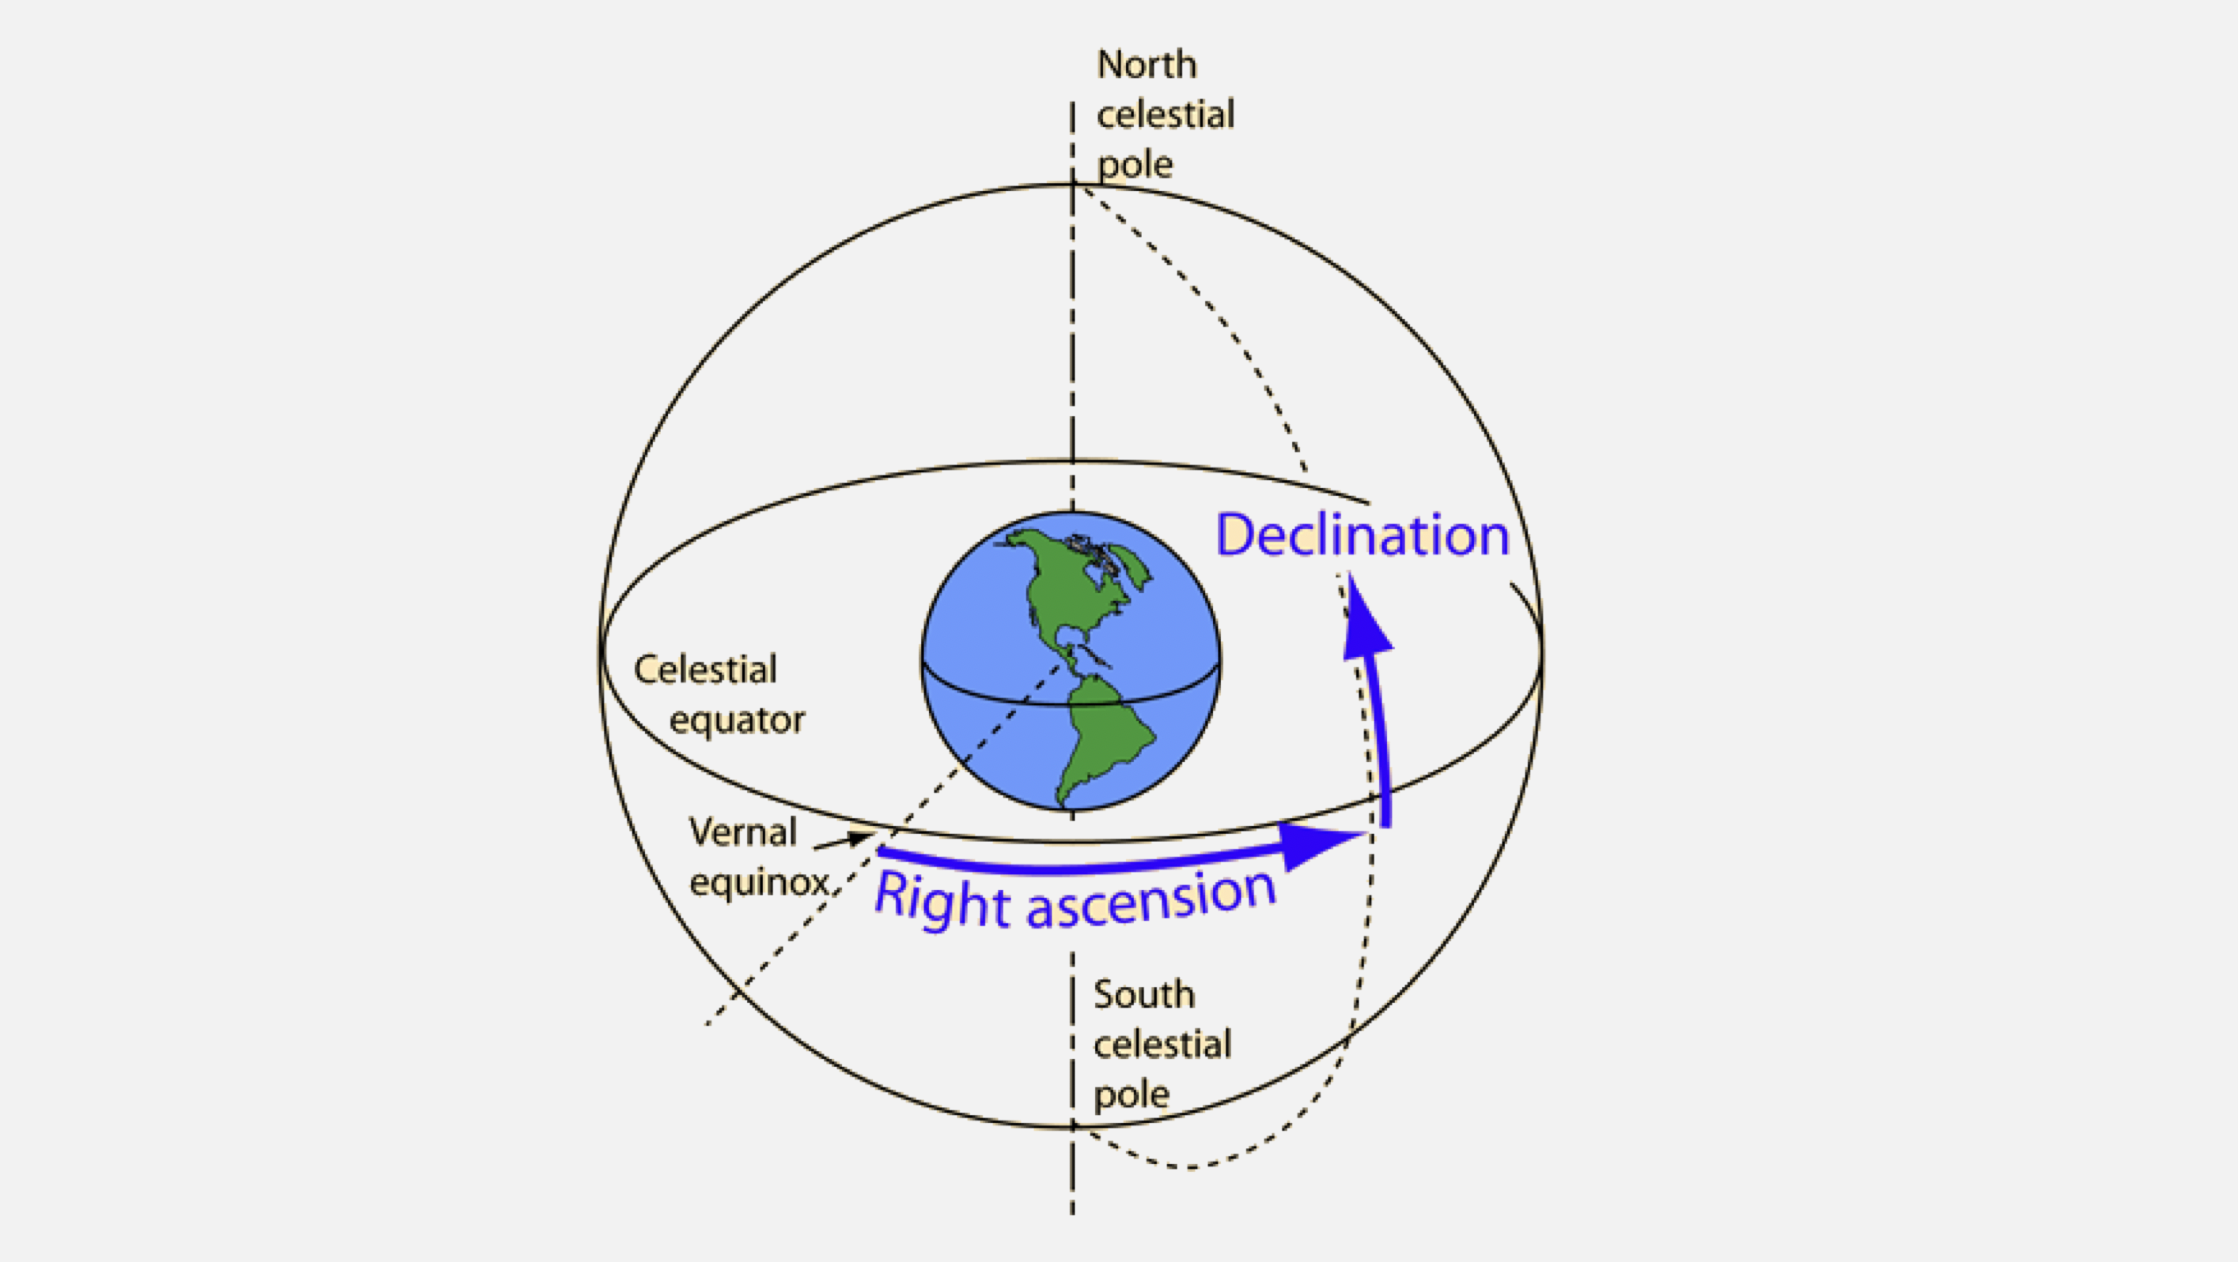

Sources:
- Image: http://hyperphysics.phy-astr.gsu.edu/hbase/eclip.html
- Definitions:https://skyandtelescope.org/astronomy-resources/right-ascension-declination-celestial-coordinates/

####Filters:

A photomectric system is a set of optical filters with known sensitivity to specific wave lengths of the electromagnetic spectrum. When each filter is used, it is able to measure the intensity of light being emited in the filter's range. The data contains measurements from 5 different filters.
- u: UV filter
- g: green filter
- r: red filter
- i: near infrared filter
- z: inframred filter

Source: https://en.wikipedia.org/wiki/Photometric_system

####Redshift:

'Red shift' occurs when a wavelength of the light is stretched, so the light is seen as 'shifted' towards the red part of the spectrum, similar to the doppler effect. As objects move away from us through space (due to teh expansion of the universe), the shift in the wavelenght can be measured and the relative motion of the object can be determined.


"The red shift of a distant galaxy or quasar is easily measured by comparing its spectrum with a reference laboratory spectrum. Atomic emission and absorption lines occur at well-known wavelengths. By measuring the location of these lines in astronomical spectra, astronomers can determine the red shift of the receding sources."

Source: https://www.esa.int/Science_Exploration/Space_Science/What_is_red_shift




## Import Packages

In [2]:
# scikeras does not come installed in Google Collab. Install it here.
! pip install scikeras[tensorflow]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 86.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 46.8 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: keras
    Foun

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
# import statsmodels.api as sm
import json

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelBinarizer
from sklearn.metrics import f1_score, mean_squared_error, r2_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense
from keras.models import Sequential
from keras import regularizers

from scikeras.wrappers import KerasClassifier


# from surprise import Reader, Dataset
# from surprise.model_selection import cross_validate, GridSearchCV
# from surprise.prediction_algorithms import SVD, KNNWithMeans, KNNBasic, KNNBaseline
# from surprise.model_selection import train_test_split
# from surprise import accuracy

In [4]:
# Ignore TensorFlow Warnings
# https://stackoverflow.com/questions/40426502/is-there-a-way-to-suppress-the-messages-tensorflow-prints/40426709

import warnings
# https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)
import tensorflow as tf
tf.get_logger().setLevel('INFO')
tf.autograph.set_verbosity(0)
import logging
tf.get_logger().setLevel(logging.ERROR)

## Import Data

Import the data from the drive

In [5]:
# import the star classification data set from it's location on MyDrive
# replace this
data = pd.read_csv('drive/MyDrive/Flatiron/Capstone/data/star_classification.csv')

### Explore Data

Display the first 5 rows to see the columns present and the types of values occuring in those columns
- 17 numerical columns
- 1 categorical column

In [ ]:
# investigate first 5 rows
data.head()

Show the number of non-null values in each column to get a feel for the amount of data that could be missing.
- There are no null columns present.

In [ ]:
# investigate column non-null counts - no nulls
data.info()

Display that stats of each column to see if there are any values that stand out as likely outliers. These could indicate non-sensical numerical values used to fill in missing data.
- there are 3 columns with minimum values at -9999.0, whic are at a much lower number than other similar columns, and are a out of range of the range given through the mean and standard deviation of the column. These are likely missing values replaced with -9999.0
- This also appears to be the only number below 0 for these columns.

In [ ]:
# investigate the descriptive statistics of each column
data.describe()

## Data Cleaning

Remove the values with values below 0. This results in only 1 row being excluded from the analysis.

In [6]:
# -9999.0 (the minimum for u, g, and z) is an outlier, likely used as a place holder for missing values.
# Remove rows with these values (only 1 row)
data = data[data['u'] > 0]
data = data[data['g'] > 0]
data = data[data['z'] > 0]
len(data)

99999

Count the number of occurances for each class in the class column (the only categorical column in the dataset)
- there is an inbalance within the class counts. The GALAXY class owns a little more than half of the rows, with the rest split between the STAR classes.

In [7]:
# get the counts for each class
data['class'].value_counts()

GALAXY    59445
STAR      21593
QSO       18961
Name: class, dtype: int64

Remove columns that are not relevant.
- remove:
  - run_ID: unique idnetifier for each run
  - obj_ID: unique identifier for each object
  - spec_obj_ID: unique identifer assigned based on class
  - MJD: date the observation was made
  - rerun_ID: specifies how the image was processed - same for each row

In [8]:
# separate the id column and target column
id_column = 'obj_ID'
target_column = 'class'

ids = data[id_column]

# remove unnecessary columns
drop_cols = ['obj_ID', 'run_ID', 'spec_obj_ID', 'MJD', 'rerun_ID']
relevant_columns = data.drop(columns=drop_cols)

# separate the class column from the feature columns
classes = relevant_columns[target_column]
feature_columns = relevant_columns.drop(columns=target_column, axis=1)

## Total Dataset Visualizations

### Create objects of data for each individual class

In [ ]:
galaxies = stars = relevant_columns[relevant_columns['class'] == 'GALAXY']
quasars = relevant_columns[relevant_columns['class'] == 'QSO']
stars = relevant_columns[relevant_columns['class'] == 'STAR']

### Relative quantities of classes

Visualize the distribution of classes within the dataset

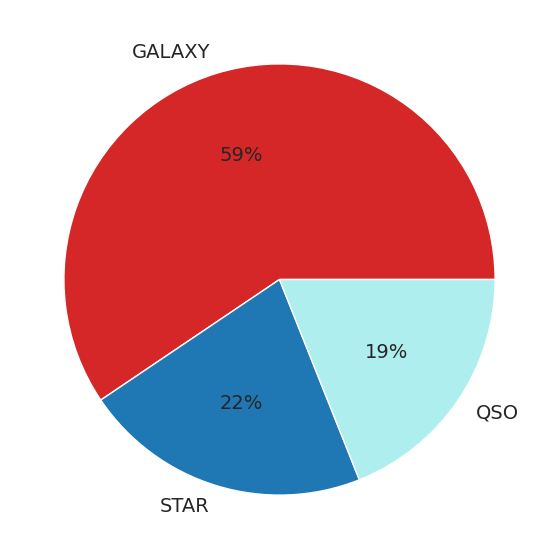

In [ ]:
# declaring data
values = list(relevant_columns['class'].value_counts().values)
keys = list(relevant_columns['class'].value_counts().keys())
colors = ['tab:red', 'tab:blue', 'paleturquoise']

# declaring exploding pie
# define Seaborn color palette to use
palette_color = sns.color_palette('dark')
sns.set_style("whitegrid")
plt.figure(figsize=(7,7))
plt.rc('font', size=14)
# plotting data on chart
plt.pie(values, labels=keys, colors=colors, autopct='%.0f%%')

# displaying chart
plt.show()

The majority of objects observed were galaxies, with the remaining observations split roughly evenly between star and QSO. This may lead to a class imbalace and can be addressed using synthetic oversampling

### Object location in the **sky**

Use the alpha and delta columns to map the location of each object in the sky
- alpha: right ascension angle (at J2000 epoch)
- delta: declination angle (at J2000 epoch)



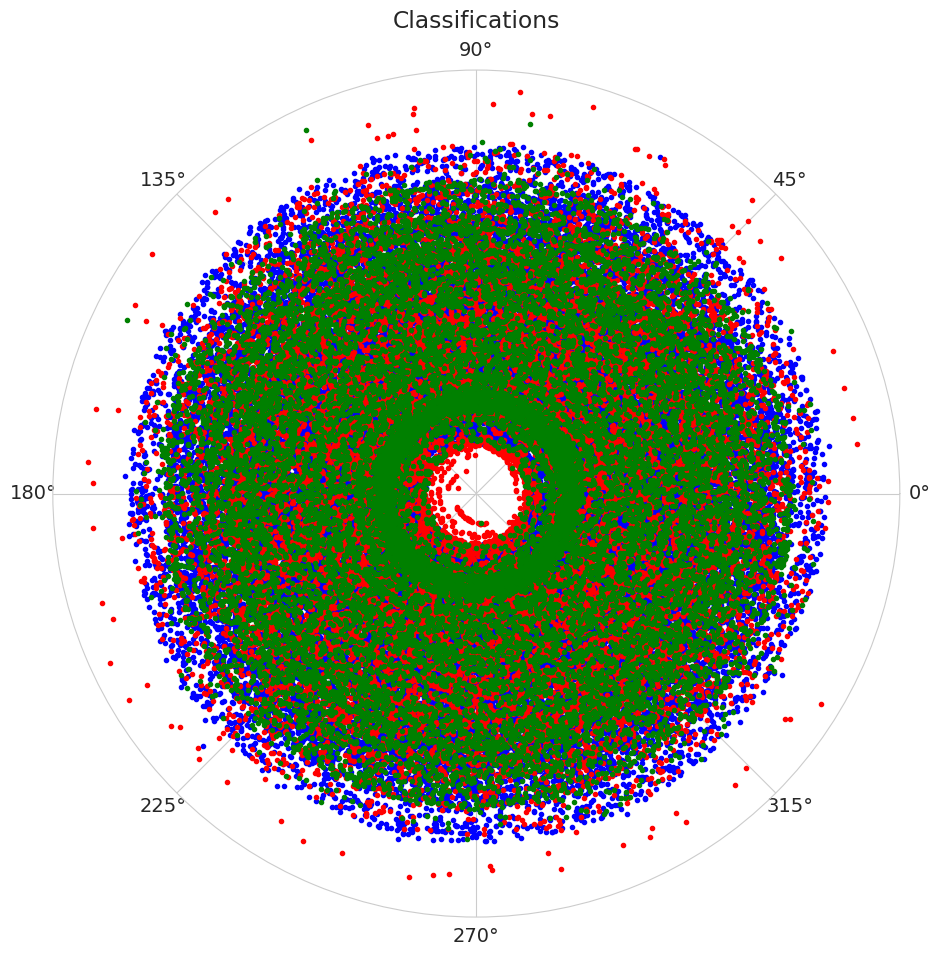

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(11,11))
ax.plot(galaxies.alpha.values, galaxies.delta.values, 'b.')
ax.plot(stars.alpha.values, stars.delta.values, 'r.')
ax.plot(quasars.alpha.values, quasars.delta.values, 'g.')
# ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("Classifications", va='bottom')
plt.show()

The sky is dense with objects, with density remaining fairly constent throughout the sky. Observations only start to thin out around the edges.

Color legend:
- blue: galaxies
- red: stars
- green: quasars

#### Plot the object locations for each class separately

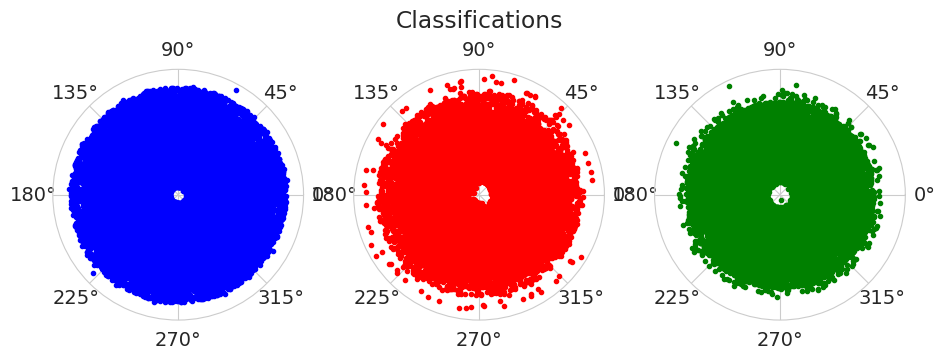

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

delta_stars = data[data['class'] == 'STAR'].delta.values
alpha_stars = data[data['class'] == 'STAR'].alpha.values

delta_galaxy = data[data['class'] == 'GALAXY'].delta.values
alpha_galaxy = data[data['class'] == 'GALAXY'].alpha.values

delta_qso = data[data['class'] == 'QSO'].delta.values
alpha_qso = data[data['class'] == 'QSO'].alpha.values

fig, ax = plt.subplots(1, 3, subplot_kw={'projection': 'polar'}, figsize=(11,11))
ax[0].plot(alpha_galaxy, delta_galaxy, 'b.')
ax[0].set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax[0].set_rlabel_position(-22.5)  # Move radial labels away from plotted line

ax[1].plot(alpha_stars, delta_stars, 'r.')
ax[1].set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax[1].set_rlabel_position(-22.5)  # Move radial labels away from plotted line

ax[2].plot(alpha_qso, delta_qso, 'g.')
ax[2].set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax[2].set_rlabel_position(-22.5)  # Move radial labels away from plotted line
# ax.grid(True)

ax[1].set_title("Classifications", va='bottom')
plt.show()

### Redshift

#### Plot the redshift for each object against it's declination angle.

- It doesn't indidate a correlation between the two variables, however it demonstrates the gradient of separation between classes as redshift increases.
- There appears to be clear upper limits for redshift for each class
- Some overlap between the classes in the lower redshift values.

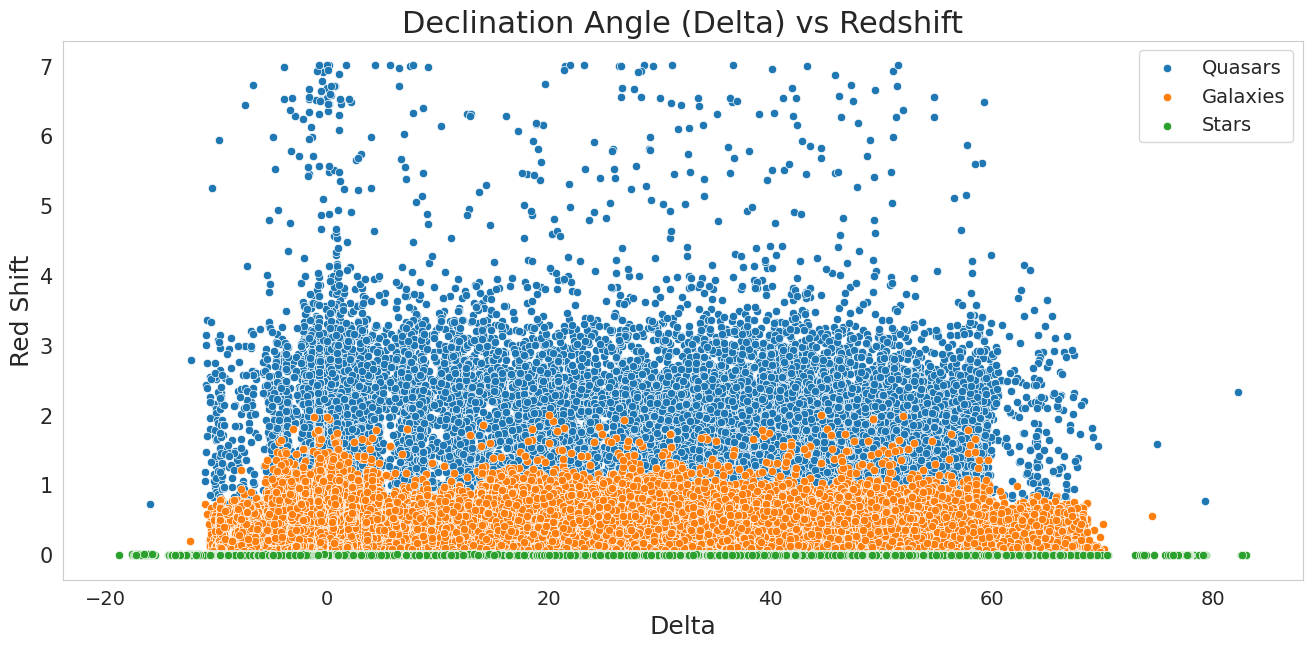

In [ ]:
plt.figure(figsize=(16,7))
sns.scatterplot(data=quasars, x='delta', y='redshift', label='Quasars')
sns.scatterplot(data=galaxies, x='delta', y='redshift', label='Galaxies')
sns.scatterplot(data=stars, x='delta', y='redshift', label='Stars')
plt.legend()
plt.yticks(fontsize=15)
plt.xlabel('Delta', fontsize=18)
plt.ylabel('Red Shift', fontsize=18)
plt.title('Declination Angle (Delta) vs Redshift', fontsize=22)
plt.grid()

# maybe plot standard deviation?
# feed this scatter plot into a large language model to see how they would describe the pattern

Quassars experience the most redshift, followed by galaxies. Stars show very little redshift, as the stars we can observe are in our own galaxy.

#### Plot the redshift for each object agains it's UV filter value


- Indidates a small correlation between the two variables.
- There again appears to be clear upper limits for redshift for each class
- Some overlap between the classes in the lower redshift values.

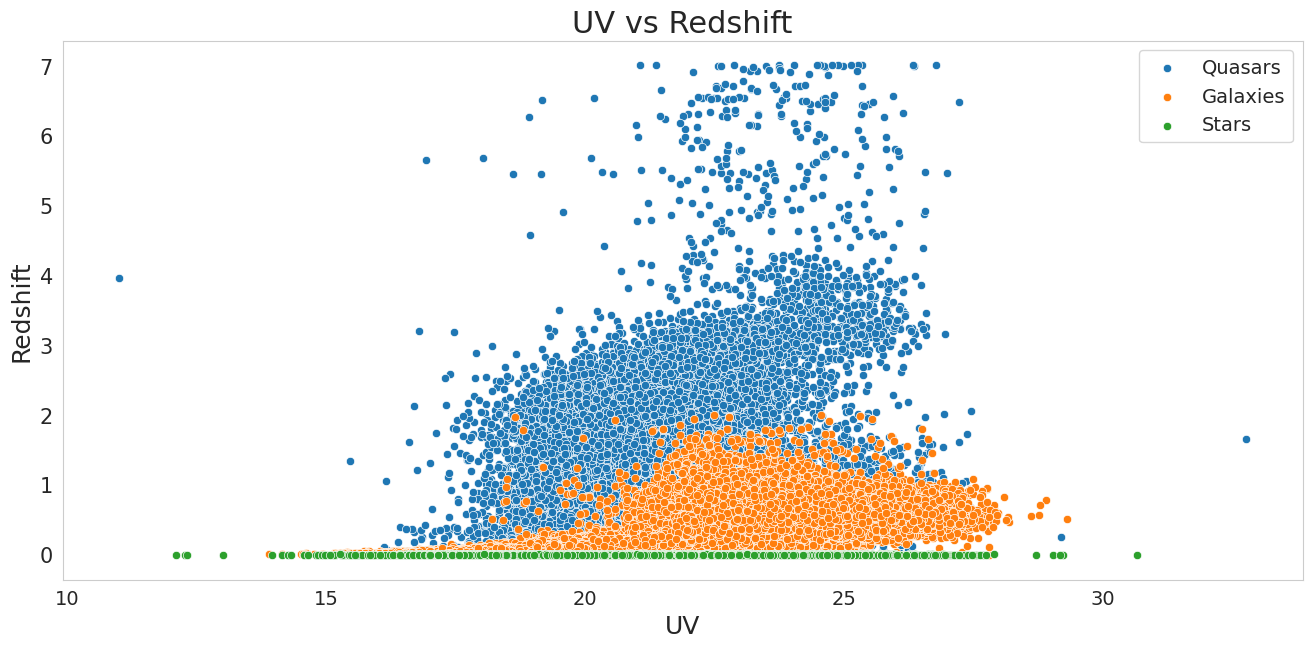

In [ ]:
plt.figure(figsize=(16,7))
sns.scatterplot(data=quasars, x='u', y='redshift', label='Quasars')
sns.scatterplot(data=galaxies, x='u', y='redshift', label='Galaxies')
sns.scatterplot(data=stars, x='u', y='redshift', label='Stars')
plt.legend()
plt.yticks(fontsize=15)
plt.xlabel('UV', fontsize=18)
plt.ylabel('Redshift', fontsize=18)
plt.title('UV vs Redshift', fontsize=22)
plt.grid()

# Modeling

## Prep data

#### Normalize the data to a standard scale

#### Split the data into 4 different train and test data sets
1. Full data set split into test / train
2. Smaller (half size) data set split into test / train to make development faster
3. Full data set resampled to deal with the unequal class distribution
4. Smaller data set resampled to deal with the unequal class distribution

In [9]:
# 1. Full trian and test dataset
X = feature_columns
y = classes
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [10]:
# 2. Smaller train and test dataset for development
X_half, _, y_half, _ = train_test_split(X, y, test_size=0.5, random_state=SEED)
X_train_dev, X_test_dev, y_train_dev, y_test_dev = train_test_split(X_half, y_half, test_size=0.3, random_state=SEED)

Resample the data set and small dataset

In [11]:
# 3. Resampled full trian and test dataset
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [12]:
# 4. Resampled smaller train and test dataset for development
smote = SMOTE()
X_train_resampled_dev, y_train_resampled_dev = smote.fit_resample(X_train_dev, y_train_dev)

Scale the Data

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# scaler = StandardScaler()
# X_train_dev_scaled = scaler.fit_transform(X_train_dev)
# X_test_dev_scaled = scaler.fit_transform(X_test_dev)

scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)

# scaler = StandardScaler()
# X_train_resampled_dev_scaled = scaler.fit_transform(X_train_resampled_dev)

Select the data to use to train the models

In [14]:
# select the data set to use
X_train = X_train_resampled_scaled
X_test = X_test_scaled
y_train = y_train_resampled
y_test = y_test

## Metric Selection and Functions



The success of the model will lie in it's ability to accurately assign a class to an object. While neither false positives or false negatives are desirable, neither outweighs the other. A metric that accounts for both equally should be used as the primary success metric.

### Accuracy:
takes into account both false positives and false negatives by dividing the number of correctly identified observations by the total number of observations

### Function to generate a confusion matrix given the true and predicted y values

In [15]:
def generate_confusion_matrix(y_test, y_hat):
  """
  Function to create and dispaly a confusin matrix

  args:
    - y_test: true values of y
    - y_hat: predicted values of y
  """
  cnf_matrix = confusion_matrix(y_test, y_hat)
  disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=['GALAXY', 'QSO', 'STAR'])
  disp.plot(cmap=plt.cm.Blues)
  plt.show()

### Function to convert encoded results back into class strings

In [16]:
def condense_results(y_results):
  y_classes = []
  for y in y_results:
    y = list(y)
    max_loc = y.index(max(y))
    if max_loc == 0:
      y_class = 'GALAXY'
    elif max_loc == 1:
      y_class = 'QSO'
    else:
      y_class = 'STAR'
    y_classes.append(y_class)
  return y_classes

## Base Model: Decision Tree

The inital model used to develop a baseline of performance is a simple decision tree.

In [24]:
# set the parameters for the initial decision tree
criterion='gini'
SEED=42

# intialize and fit the tree
clf_base = DecisionTreeClassifier(criterion=criterion, random_state=SEED)
clf_base.fit(X_train, y_train)

# predict
y_tree = clf_base.predict(X_test)

# classification report
final_report = classification_report(y_test, y_tree)
print(final_report)

              precision    recall  f1-score   support

      GALAXY       0.71      0.85      0.77     17816
         QSO       0.65      0.96      0.77      5742
        STAR       0.00      0.00      0.00      6442

    accuracy                           0.69     30000
   macro avg       0.45      0.60      0.52     30000
weighted avg       0.54      0.69      0.61     30000



Interpretation: The decision tree obtained 69% accuracy, indicating a wide margin for improvement. With a score of 0 for star identification, it is clear that a different model is needed to accuratelly classify the observed objects.

In [22]:
y_tree

array(['QSO', 'GALAXY', 'GALAXY', ..., 'GALAXY', 'QSO', 'QSO'],
      dtype=object)

#### Confusion Matrix

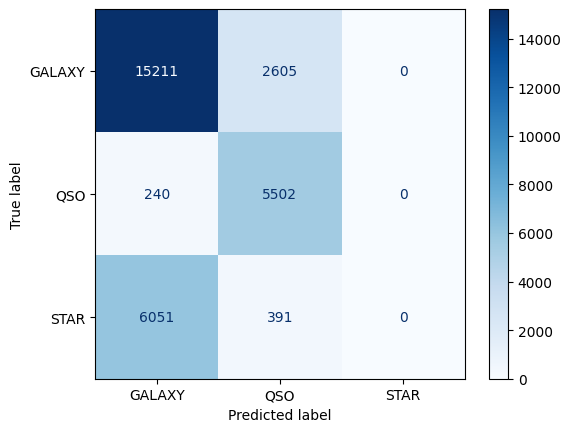

In [21]:
generate_confusion_matrix(y_test, y_tree)

Interpretation: Most stars were mistaken for galaxies, making that area the most ready for improvement. Additionally, many galaxies were misidentified as Quasars.

## Neural Net Prep

### Class prep
Encode the class column to separate it out into three numerical columns, one for each class.

In [17]:
# function to perform one hot encoding on the y results
def create_y_ohe(y, columns):
    """
    function to encode a given y data set
        Inputs:
            - y: dataframe to encode
            - columns: list of column names included in the encoding
        Outputs:
            - y_ohe_df: final encoded dataframe
    """
    # initialize the encoder
    ohe = OneHotEncoder()

    # create a y dataframe
    y_df = pd.DataFrame(y, columns=columns)

    # encode the dataframe
    y_ohe = ohe.fit_transform(y_df).toarray()

    # converte the encoded y back into a dataframe
    y_ohe_df = pd.DataFrame(y_ohe, columns=ohe.get_feature_names_out(y_df.columns))

    return y_ohe_df

Encode the train and test class columns

In [18]:
# change target class to be numerical
y_train_encoded = create_y_ohe(y_train.values, ['Class'])
y_test_encoded = create_y_ohe(y_test.values, ['Class'])

### Functions to Build and Run a Neural Net

#### Build a Neural Net

In [19]:
# define universal neural net and cross validation parameters
n_features_ = len(feature_columns.columns)
n_folds = 5

In [20]:
feature_columns.columns

Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'cam_col', 'field_ID',
       'redshift', 'plate', 'fiber_ID'],
      dtype='object')

In [21]:
def build_neural_net(n_layers, n_features, layer_activation='relu', output_activation='softmax',
                             loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'],
                             l2_reg=False):
  """
  function to build a neural net, provided certain parameters

  Args:
    - n_layers: the nubmer of hidden layers to add
    - n_features: the number of features in the input data
    - layer_activation: function to use to activate each layer
    - output_activation: function to activate the output layer
    - loss: loss function
    - optimizer: the optimizer
    - metrics: the metrics to output
    - l2_reg: boolean, whether or not to include L2 regularization

  Returns:
    - nn: neural net object
  """

  nn = Sequential()
  # one layer
  nn.add(Dense(n_features, activation='tanh', input_shape=(n_features,)))

  for layer in range(0, n_layers-1):

    if l2_reg:
      nn.add(Dense(6, kernel_regularizer=regularizers.l2(0.05), activation=layer_activation))
    else:
      nn.add(Dense(6, activation=layer_activation))

  # output layer
  nn.add(Dense(3, activation=output_activation))
  nn.compile(loss=loss, optimizer=optimizer, metrics=metrics)

  return nn

#### Run a Neural Net

Create a function that can build and run a neural net when given the input parameters to define the neural net.

In [22]:
def build_and_run_neural_net(n_layers, n_features, layer_activation='relu', output_activation='softmax',
                             loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'],
                             n_epochs=8, batch_size=21, validation_split=0.2):
  """
  build and run a neural net based on the parameters given

  Args:
    - n_layers: the number of layers
    - n_features: the number of features included in the dataset
    - layer_activation: the activation function to use for the layers
    - output_activation: the activation function used for the output layer
    - loss: the loss function used
    - optimizer: the optimizer used
    - metrics: the metrics to record performance of the neural net
    - n_epochs: the number of epochs to run the neural net through
    - batch_size: the number of data samples to include in each pass over of the data
    - validation_split: the fraction of samples to reserve for validation

  Returns:
    - nn: the built out nerual net object
    - nn_results: the results of the neural net
  """

  # call the build nerual net function
  nn = build_neural_net(n_layers, n_features, layer_activation=layer_activation,
                            output_activation=output_activation, loss=loss,
                            optimizer=optimizer, metrics=metrics,
                            l2_reg=False)

  # employ early stopping to fight overfitting
  early_stopping = [EarlyStopping(monitor='val_loss', patience=5),
                  ModelCheckpoint(filepath=f'best_model_nn_{n_layers}.h5', monitor='val_loss', save_best_only=True)]

  # get results
  results_nn = nn.fit(X_train, y_train_encoded, epochs=n_epochs, batch_size=batch_size,
                      validation_split=validation_split, callbacks=early_stopping)

  # evaluate
  results_test = nn.evaluate(X_test, y_test_encoded)

  return nn, results_nn

## Single Layer Neural Net

Create and run the simplest version of a neural net, a single layer neural net

In [28]:
# call the build and run nerual net function to run and fit the nerual net
nn_1, nn_1_results = build_and_run_neural_net(n_layers=1, n_features=n_features_,
                                              layer_activation='relu', n_epochs=5)

Epoch 1/5
4758/4758 [==============================] - 7s 1ms/step - loss: 0.4555 - acc: 0.8151 - val_loss: 0.6042 - val_acc: 0.6800
Epoch 2/5
4758/4758 [==============================] - 7s 2ms/step - loss: 0.2583 - acc: 0.9130 - val_loss: 0.3509 - val_acc: 0.9037
Epoch 3/5
4758/4758 [==============================] - 7s 2ms/step - loss: 0.2033 - acc: 0.9383 - val_loss: 0.2884 - val_acc: 0.9088
Epoch 4/5
4758/4758 [==============================] - 7s 1ms/step - loss: 0.1809 - acc: 0.9446 - val_loss: 0.1912 - val_acc: 0.9773
Epoch 5/5
938/938 [==============================] - 1s 1ms/step - loss: 0.2674 - acc: 0.9197


#### Plot the train and test loss as the epochs increase
The loss seems to flatten gradually, indicating a decrease in benefit for each epoch.

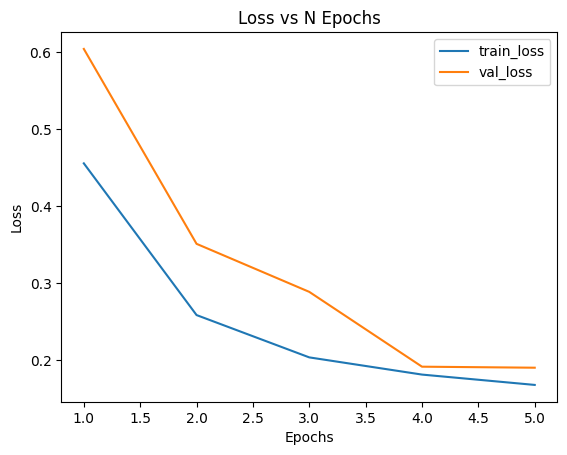

In [29]:
epochs = range(1, len(nn_1_results.history['loss'])+1)
loss = nn_1_results.history['loss']
val_loss = nn_1_results.history['val_loss']

plt.plot(epochs, loss, label='train_loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('Loss vs N Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Interpretation: Both the training and val loss decrease in a realtively similar pattern, with little fluctuation, making this (small) model appear stable.

Cross-Validate the Model to get an accuracy score

In [ ]:
# https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/

estimator = KerasClassifier(build_fn=nn_1, epochs=5, batch_size=21, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results_k_nn_1 = cross_val_score(estimator, X_train, y_train_encoded, cv=kfold)

In [35]:
print("Baseline: %.2f%% (%.2f%%)" % (results_k_nn_1.mean()*100, results_k_nn_1.std()*100))

Baseline: 96.37% (0.04%)


Predict the classes of the reserved test set, and create a classification report

In [32]:
# predict
y_nn_1 = nn_1.predict(X_test)

# condense the encoded results back into the categorical format
y_nn_1_classes = condense_results(y_nn_1)

# create a classification report
nn_1_report = classification_report(y_test, y_nn_1_classes)
print(nn_1_report)

938/938 [==============================] - 1s 886us/step
              precision    recall  f1-score   support

      GALAXY       0.97      0.90      0.93     17816
         QSO       0.79      0.95      0.86      5742
        STAR       0.94      0.95      0.94      6442

    accuracy                           0.92     30000
   macro avg       0.90      0.93      0.91     30000
weighted avg       0.93      0.92      0.92     30000



Interpretation: The single layer neural net performed much better than the decision tree, with an accuracy of 92%, and was able to identify stars, where the decision tree failed.



#### Confusion Matrix

generate a confusion matrix to investiagte false positives and false negatives

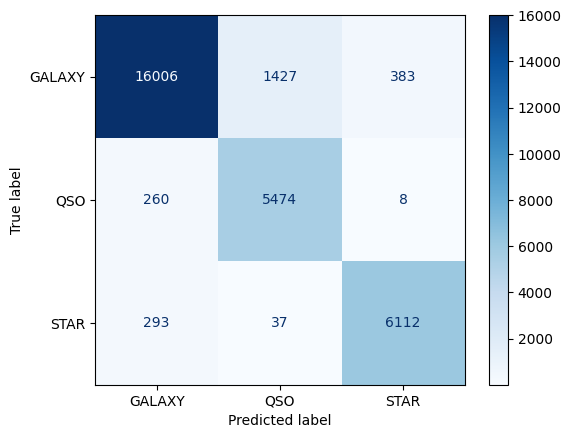

In [33]:
# generate a confusion matrix to investiagte false positives and false negatives
generate_confusion_matrix(y_test, y_nn_1_classes)

Interpretation: The single layer neural performed significanly better than the deicion tree, with the numbers of accurately predicted labels (blue diagonal squares) much higher in number.

## Three Layer Neural Net

Create and run another simple version of a neural net, a three layer neural net

In [36]:
# call the build and run nerual net function to run and fit the nerual net
nn_3, nn_3_results = build_and_run_neural_net(n_layers=3, n_features=n_features_,
                                              layer_activation='relu', n_epochs=5)

Epoch 1/5
4758/4758 [==============================] - 8s 2ms/step - loss: 0.4055 - acc: 0.8338 - val_loss: 0.2084 - val_acc: 0.9761
Epoch 2/5
4758/4758 [==============================] - 8s 2ms/step - loss: 0.1617 - acc: 0.9447 - val_loss: 0.0630 - val_acc: 0.9970
Epoch 3/5
4758/4758 [==============================] - 8s 2ms/step - loss: 0.1408 - acc: 0.9516 - val_loss: 0.0741 - val_acc: 0.9892
Epoch 4/5
4758/4758 [==============================] - 8s 2ms/step - loss: 0.1324 - acc: 0.9548 - val_loss: 0.0490 - val_acc: 0.9977
Epoch 5/5
938/938 [==============================] - 1s 1ms/step - loss: 0.2091 - acc: 0.9322


Cross-Validate the Model to get an accuracy score

In [37]:
early_stopping = [EarlyStopping(monitor='val_loss', patience=5),
                  ModelCheckpoint(filepath=f'best_model_nn_3.h5', monitor='val_loss', save_best_only=True)]
estimator = KerasClassifier(build_fn=nn_3, epochs=5, batch_size=21, verbose=0, callbacks=early_stopping)
kfold = KFold(n_splits=5, shuffle=True)
results_k_nn_3 = cross_val_score(estimator, X_train, y_train_encoded, cv=kfold)

In [38]:
print("Baseline: %.2f%% (%.2f%%)" % (results_k_nn_3.mean()*100, results_k_nn_3.std()*100))

Baseline: 96.68% (0.25%)


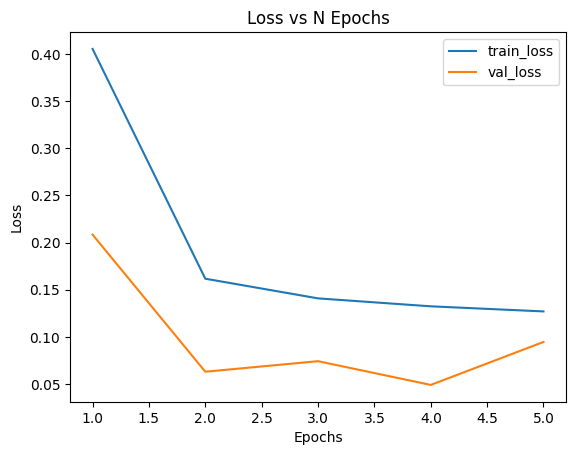

In [39]:
epochs = range(1, len(nn_3_results.history['loss'])+1)
loss = nn_3_results.history['loss']
val_loss = nn_3_results.history['val_loss']

plt.plot(epochs, loss, label='train_loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('Loss vs N Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Interpretation: The training loss is still able to level out smoothly, while the val loss fluctuates. The large peak in the middle reparesnts an epoch that was not divided as well. It the quicly retuned to it's normal levels. The val loss is lower than the training loss at a (mostly) consistent rate, showing that there is no significant overfitting.

In [40]:
# predict
y_nn_3 = nn_3.predict(X_test)
y_nn_3_classes = condense_results(y_nn_3)

nn_3_report = classification_report(y_test, y_nn_3_classes)
print(nn_3_report)

938/938 [==============================] - 1s 990us/step
              precision    recall  f1-score   support

      GALAXY       0.96      0.92      0.94     17816
         QSO       0.82      0.96      0.88      5742
        STAR       0.97      0.94      0.95      6442

    accuracy                           0.93     30000
   macro avg       0.92      0.94      0.93     30000
weighted avg       0.94      0.93      0.93     30000



In [41]:
print("Baseline: %.2f%% (%.2f%%)" % (results_k_nn_3.mean()*100, results_k_nn_3.std()*100))

Baseline: 96.68% (0.25%)


In [42]:
# predict
y_nn_3 = nn_3.predict(X_test)

# condense the encoded results back into the categorical format
y_nn_3_classes = condense_results(y_nn_3)


# create a classification report
nn_3_report = classification_report(y_test, y_nn_3_classes)
print(nn_3_report)

938/938 [==============================] - 1s 929us/step
              precision    recall  f1-score   support

      GALAXY       0.96      0.92      0.94     17816
         QSO       0.82      0.96      0.88      5742
        STAR       0.97      0.94      0.95      6442

    accuracy                           0.93     30000
   macro avg       0.92      0.94      0.93     30000
weighted avg       0.94      0.93      0.93     30000



Interpretation: The three layer neural net performed equal to the decision tree and single layer network, with an accuracy of 96%.

A grid search should be performed to determine if there is a neural network configuration that can obtain an accuracy score greater than 96%.

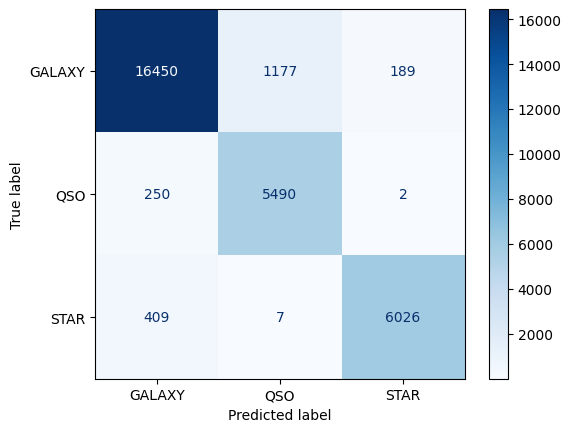

In [43]:
# generate a confusion matrix to compare false positives and false negatives
generate_confusion_matrix(y_test, y_nn_3_classes)

The three layer neural net performed similarly to the single layer neural network, with similar types of false positives and false negatives.

## Grid Search

Employ a grid search to loop through several possible parameters in order to find the set of parameters that results in the most accurate model.

In [ ]:
print(len(X_train))

124887
124887
99999


Create and run a grid search to identify the optimal paramters.

loop through several activations functions, number of layers, batch sizes, and epochs.
- batch size values were determined by finding factors of the total number of obersvations, 124887
  - total of observations after resampling

In [37]:
n_layers = [1, 2, 3, 5, 10, 13]
l2_reg = [True, False]
activation_functions = ['relu', 'tanh']
output_activation = 'softmax'
optimizer = 'sgd'
loss = 'categorical_crossentropy'

nn_param_grid = {
    'batch_size':[21, 57],
    'epochs':[15, 10, 5],
}

n_features = len(feature_columns)

for n in n_layers:
  results_list = []
  print(f'n layers = {n}')
  for af in activation_functions:
    print(f'  activation = {af}')
    for l2 in l2_reg:
      print(f'    l2 = {l2}')
      early_stopping = [EarlyStopping(monitor='val_loss', patience=5),
                        ModelCheckpoint(filepath=f'best_model_nn_{n_layers}.h5', save_format="h5", monitor='val_loss', save_best_only=True)]

      # build the nerual net
      nn = build_neural_net(n_layers=n, n_features=n_features_, layer_activation=af, l2_reg=l2,
                            optimizer=optimizer, output_activation=output_activation, loss=loss)
      # create the model
      model = KerasClassifier(model=nn, callbacks=early_stopping)

      # run the grid search
      gs=GridSearchCV(estimator=model, param_grid=nn_param_grid, cv=3, verbose=True)

      # fit the dataset to the GridSearchCV object.
      gs = gs.fit(X_train, y_train_encoded)

      # save the best parameters and accuracy
      best_params=gs.best_params_
      accuracy=gs.best_score_
      print(f'     best accuracy = {accuracy}')

      # save results
      results = {
          'n_layers': n,
          'activation_function': af,
          'l2_regularization': l2,
          'best_params': best_params,
          'accuracy': accuracy
      }
      results_list.append(results)

  # add results to the results dict
  results_dict = {
      'results': results_list
  }

  # save the results to the drive in bathces. group by number of layers
  with open(f'drive/MyDrive/Flatiron/Capstone/grid_results_{n}_final.json', 'w') as f:
    json.dump(results_dict, f)

n layers = 1
  activation = relu
    l2 = True


Fitting 3 folds for each of 6 candidates, totalling 18 fits


Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3986 - acc: 0.8474
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2185 - acc: 0.9245
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1752 - acc: 0.9417
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1527 - acc: 0.9501
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1386 - acc: 0.9557
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1288 - acc: 0.9590
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1216 - acc: 0.9617
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1161 - acc: 0.9634
Epoch 9/15
3965/3965 [==============================] - 4s 1ms/step - loss: 0.1116 - acc: 0.9650
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1077 - acc: 0.9664
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4576 - acc: 0.8119
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2410 - acc: 0.9245
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1879 - acc: 0.9427
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1615 - acc: 0.9517
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1453 - acc: 0.9573
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1342 - acc: 0.9607
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1262 - acc: 0.9632
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1199 - acc: 0.9648
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1149 - acc: 0.9663
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1109 - acc: 0.9676
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4722 - acc: 0.8103
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2851 - acc: 0.8968
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2229 - acc: 0.9328
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1932 - acc: 0.9427
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1754 - acc: 0.9484
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1641 - acc: 0.9523
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1560 - acc: 0.9543
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1501 - acc: 0.9563
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1456 - acc: 0.9576
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1420 - acc: 0.9586
Epoch 11/15
3965/3965 [======

Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3979 - acc: 0.8470
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2178 - acc: 0.9252
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1747 - acc: 0.9419
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1526 - acc: 0.9507
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1386 - acc: 0.9554
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1288 - acc: 0.9591
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1218 - acc: 0.9618
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1163 - acc: 0.9634
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1121 - acc: 0.9647
Epoch 10/10
1983/1983 [==============================] - 2s 925us/step


Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4573 - acc: 0.8146
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2409 - acc: 0.9245
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1881 - acc: 0.9426
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1615 - acc: 0.9519
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1455 - acc: 0.9570
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1344 - acc: 0.9606
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1265 - acc: 0.9626
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1209 - acc: 0.9645
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1160 - acc: 0.9658
Epoch 10/10
1983/1983 [==============================] - 2s 928us/step


Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4725 - acc: 0.8101
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2863 - acc: 0.8956
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2232 - acc: 0.9326
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1934 - acc: 0.9433
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1757 - acc: 0.9486
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1641 - acc: 0.9523
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1560 - acc: 0.9545
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1501 - acc: 0.9563
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1456 - acc: 0.9574
Epoch 10/10
1983/1983 [==============================] - 2s 934us/step


Epoch 1/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3982 - acc: 0.8471
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2186 - acc: 0.9253
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1753 - acc: 0.9413
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1530 - acc: 0.9502
Epoch 5/5
1983/1983 [==============================] - 2s 957us/step


Epoch 1/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4564 - acc: 0.8133
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2406 - acc: 0.9242
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1876 - acc: 0.9426
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1614 - acc: 0.9525
Epoch 5/5
1983/1983 [==============================] - 2s 980us/step


Epoch 1/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4713 - acc: 0.8110
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2859 - acc: 0.8968
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2237 - acc: 0.9320
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1938 - acc: 0.9431
Epoch 5/5
1983/1983 [==============================] - 2s 933us/step


Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5458 - acc: 0.7783
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3376 - acc: 0.8763
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2679 - acc: 0.9037
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2297 - acc: 0.9203
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2060 - acc: 0.9298
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1893 - acc: 0.9362
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1767 - acc: 0.9413
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1666 - acc: 0.9454
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1584 - acc: 0.9484
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1516 - acc: 0.9511
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6254 - acc: 0.7283
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3924 - acc: 0.8445
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3033 - acc: 0.8971
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2552 - acc: 0.9201
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2256 - acc: 0.9304
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2050 - acc: 0.9371
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1897 - acc: 0.9425
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1778 - acc: 0.9463
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1681 - acc: 0.9496
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1601 - acc: 0.9525
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5932 - acc: 0.7547
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4268 - acc: 0.8310
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3563 - acc: 0.8623
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3035 - acc: 0.8842
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2677 - acc: 0.9078
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2431 - acc: 0.9252
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2252 - acc: 0.9336
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2115 - acc: 0.9381
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2006 - acc: 0.9420
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1916 - acc: 0.9447
Epoch 11/15
1461/1461 [======

Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5460 - acc: 0.7787
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3376 - acc: 0.8764
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2677 - acc: 0.9041
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2295 - acc: 0.9208
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2059 - acc: 0.9299
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1892 - acc: 0.9362
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1767 - acc: 0.9414
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1666 - acc: 0.9453
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1584 - acc: 0.9485
Epoch 10/10
731/731 [==============================] - 1s 947us/step


Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6250 - acc: 0.7258
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3922 - acc: 0.8447
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3034 - acc: 0.8976
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2551 - acc: 0.9200
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2255 - acc: 0.9301
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2051 - acc: 0.9372
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1898 - acc: 0.9425
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1777 - acc: 0.9466
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1680 - acc: 0.9499
Epoch 10/10
731/731 [==============================] - 1s 945us/step


Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5931 - acc: 0.7552
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4265 - acc: 0.8310
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3560 - acc: 0.8618
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3032 - acc: 0.8837
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2676 - acc: 0.9087
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2432 - acc: 0.9250
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2253 - acc: 0.9331
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2116 - acc: 0.9379
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2007 - acc: 0.9420
Epoch 10/10
731/731 [==============================] - 1s 965us/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5458 - acc: 0.7782
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3376 - acc: 0.8764
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2678 - acc: 0.9039
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2296 - acc: 0.9202
Epoch 5/5
731/731 [==============================] - 1s 953us/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6245 - acc: 0.7273
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3920 - acc: 0.8437
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3034 - acc: 0.8960
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2552 - acc: 0.9197
Epoch 5/5
731/731 [==============================] - 1s 960us/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5931 - acc: 0.7551
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4267 - acc: 0.8311
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3560 - acc: 0.8624
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3031 - acc: 0.8841
Epoch 5/5
731/731 [==============================] - 1s 961us/step


Epoch 1/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.4019 - acc: 0.8407
Epoch 2/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.2135 - acc: 0.9362
Epoch 3/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1705 - acc: 0.9505
Epoch 4/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1485 - acc: 0.9571
Epoch 5/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1358 - acc: 0.9608
Epoch 6/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1277 - acc: 0.9633
Epoch 7/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1221 - acc: 0.9646
Epoch 8/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1182 - acc: 0.9656
Epoch 9/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1147 - acc: 0.9661
Epoch 10/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1119 - acc: 0.9669
Epoch 11/15
5947/5947 [======

Fitting 3 folds for each of 6 candidates, totalling 18 fits


Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3636 - acc: 0.8674
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1991 - acc: 0.9315
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1637 - acc: 0.9456
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1459 - acc: 0.9524
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1340 - acc: 0.9570
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1253 - acc: 0.9603
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1188 - acc: 0.9622
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1136 - acc: 0.9639
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1096 - acc: 0.9653
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1062 - acc: 0.9664
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4108 - acc: 0.8468
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2173 - acc: 0.9310
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1765 - acc: 0.9463
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1558 - acc: 0.9529
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1421 - acc: 0.9576
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1324 - acc: 0.9607
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1251 - acc: 0.9628
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1196 - acc: 0.9643
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1152 - acc: 0.9656
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1114 - acc: 0.9667
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4378 - acc: 0.8306
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2589 - acc: 0.9162
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2146 - acc: 0.9359
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1928 - acc: 0.9436
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1786 - acc: 0.9467
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1688 - acc: 0.9493
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1612 - acc: 0.9520
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1555 - acc: 0.9529
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1507 - acc: 0.9546
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1467 - acc: 0.9560
Epoch 11/15
3965/3965 [======

Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3633 - acc: 0.8679
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1984 - acc: 0.9318
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1636 - acc: 0.9455
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1460 - acc: 0.9521
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1341 - acc: 0.9572
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1254 - acc: 0.9601
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1190 - acc: 0.9622
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1138 - acc: 0.9643
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1098 - acc: 0.9654
Epoch 10/10
1983/1983 [==============================] - 2s 944us/step


Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4098 - acc: 0.8465
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2168 - acc: 0.9313
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1765 - acc: 0.9463
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1557 - acc: 0.9531
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1422 - acc: 0.9576
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1326 - acc: 0.9607
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1253 - acc: 0.9628
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1195 - acc: 0.9645
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1152 - acc: 0.9655
Epoch 10/10
1983/1983 [==============================] - 2s 966us/step


Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4374 - acc: 0.8298
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2586 - acc: 0.9160
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2144 - acc: 0.9366
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1928 - acc: 0.9433
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1785 - acc: 0.9472
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1686 - acc: 0.9495
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1609 - acc: 0.9518
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1554 - acc: 0.9530
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1505 - acc: 0.9545
Epoch 10/10
1983/1983 [==============================] - 2s 930us/step


Epoch 1/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3631 - acc: 0.8679
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1987 - acc: 0.9319
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1635 - acc: 0.9452
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1458 - acc: 0.9526
Epoch 5/5
1983/1983 [==============================] - 2s 956us/step


Epoch 1/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4107 - acc: 0.8467
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2168 - acc: 0.9315
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1764 - acc: 0.9459
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1556 - acc: 0.9531
Epoch 5/5
1983/1983 [==============================] - 2s 976us/step


Epoch 1/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4368 - acc: 0.8291
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2582 - acc: 0.9163
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2138 - acc: 0.9363
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1919 - acc: 0.9438
Epoch 5/5
1983/1983 [==============================] - 2s 937us/step


Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5096 - acc: 0.8055
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3013 - acc: 0.8956
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2402 - acc: 0.9161
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2081 - acc: 0.9282
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1885 - acc: 0.9358
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1749 - acc: 0.9413
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1648 - acc: 0.9452
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1569 - acc: 0.9482
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1503 - acc: 0.9509
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1447 - acc: 0.9529
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5791 - acc: 0.7710
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3398 - acc: 0.8791
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2652 - acc: 0.9126
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2277 - acc: 0.9278
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2050 - acc: 0.9362
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1893 - acc: 0.9420
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1775 - acc: 0.9462
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1683 - acc: 0.9497
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1608 - acc: 0.9523
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1544 - acc: 0.9545
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5745 - acc: 0.7633
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3824 - acc: 0.8600
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3111 - acc: 0.8907
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2701 - acc: 0.9115
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2447 - acc: 0.9235
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2277 - acc: 0.9326
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2151 - acc: 0.9371
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2053 - acc: 0.9407
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1974 - acc: 0.9425
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1906 - acc: 0.9452
Epoch 11/15
1461/1461 [======

Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5096 - acc: 0.8056
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3010 - acc: 0.8963
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2399 - acc: 0.9161
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2080 - acc: 0.9285
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1883 - acc: 0.9358
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1749 - acc: 0.9412
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1648 - acc: 0.9451
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1568 - acc: 0.9482
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1502 - acc: 0.9510
Epoch 10/10
731/731 [==============================] - 1s 981us/step


Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5793 - acc: 0.7709
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3395 - acc: 0.8793
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2651 - acc: 0.9133
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2275 - acc: 0.9279
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2048 - acc: 0.9364
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1892 - acc: 0.9424
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1774 - acc: 0.9462
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1682 - acc: 0.9496
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1607 - acc: 0.9520
Epoch 10/10
731/731 [==============================] - 1s 956us/step


Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5742 - acc: 0.7628
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3824 - acc: 0.8600
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3112 - acc: 0.8905
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2701 - acc: 0.9117
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2448 - acc: 0.9239
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2277 - acc: 0.9314
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2153 - acc: 0.9372
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2056 - acc: 0.9403
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1975 - acc: 0.9429
Epoch 10/10
731/731 [==============================] - 1s 951us/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5091 - acc: 0.8061
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3008 - acc: 0.8963
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2398 - acc: 0.9165
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2080 - acc: 0.9281
Epoch 5/5
731/731 [==============================] - 1s 948us/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5789 - acc: 0.7699
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3392 - acc: 0.8791
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2649 - acc: 0.9126
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2275 - acc: 0.9277
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5746 - acc: 0.7627
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3828 - acc: 0.8600
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3115 - acc: 0.8903
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2702 - acc: 0.9113
Epoch 5/5
731/731 [==============================] - 1s 969us/step


Epoch 1/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.3627 - acc: 0.8650
Epoch 2/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1985 - acc: 0.9408
Epoch 3/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1657 - acc: 0.9508
Epoch 4/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1480 - acc: 0.9558
Epoch 5/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1369 - acc: 0.9590
Epoch 6/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1293 - acc: 0.9611
Epoch 7/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1237 - acc: 0.9627
Epoch 8/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1191 - acc: 0.9639
Epoch 9/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1156 - acc: 0.9651
Epoch 10/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1124 - acc: 0.9658
Epoch 11/15
5947/5947 [======

Fitting 3 folds for each of 6 candidates, totalling 18 fits


Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3703 - acc: 0.8636
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2053 - acc: 0.9302
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1699 - acc: 0.9433
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1524 - acc: 0.9497
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1398 - acc: 0.9547
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1293 - acc: 0.9580
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1212 - acc: 0.9614
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1154 - acc: 0.9632
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1111 - acc: 0.9647
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1076 - acc: 0.9658
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4224 - acc: 0.8389
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2246 - acc: 0.9296
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1830 - acc: 0.9435
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1613 - acc: 0.9516
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1464 - acc: 0.9558
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1359 - acc: 0.9597
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1283 - acc: 0.9618
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1223 - acc: 0.9633
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1178 - acc: 0.9647
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1139 - acc: 0.9659
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4458 - acc: 0.8371
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2675 - acc: 0.9133
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2155 - acc: 0.9368
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1906 - acc: 0.9438
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1759 - acc: 0.9475
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1661 - acc: 0.9502
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1587 - acc: 0.9521
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1532 - acc: 0.9535
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1490 - acc: 0.9544
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1456 - acc: 0.9558
Epoch 11/15
3965/3965 [======

Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3706 - acc: 0.8632
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2052 - acc: 0.9297
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1696 - acc: 0.9437
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1513 - acc: 0.9501
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1379 - acc: 0.9549
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1280 - acc: 0.9586
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1206 - acc: 0.9610
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1152 - acc: 0.9631
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1107 - acc: 0.9646
Epoch 10/10
1983/1983 [==============================] - 2s 941us/step


Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4213 - acc: 0.8392
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2246 - acc: 0.9295
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1832 - acc: 0.9442
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1620 - acc: 0.9511
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1470 - acc: 0.9561
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1361 - acc: 0.9593
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1283 - acc: 0.9618
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1222 - acc: 0.9635
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1174 - acc: 0.9648
Epoch 10/10
1983/1983 [==============================] - 2s 947us/step


Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4443 - acc: 0.8384
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2667 - acc: 0.9136
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2153 - acc: 0.9364
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1908 - acc: 0.9437
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1758 - acc: 0.9476
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1660 - acc: 0.9499
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1588 - acc: 0.9517
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1534 - acc: 0.9534
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1490 - acc: 0.9545
Epoch 10/10
1983/1983 [==============================] - 2s 934us/step


Epoch 1/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3704 - acc: 0.8633
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2053 - acc: 0.9300
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1698 - acc: 0.9435
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1519 - acc: 0.9499
Epoch 5/5
1983/1983 [==============================] - 2s 966us/step


Epoch 1/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4216 - acc: 0.8394
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2246 - acc: 0.9296
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1831 - acc: 0.9438
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1612 - acc: 0.9512
Epoch 5/5
1983/1983 [==============================] - 2s 937us/step


Epoch 1/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4452 - acc: 0.8379
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2673 - acc: 0.9136
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2154 - acc: 0.9372
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1909 - acc: 0.9436
Epoch 5/5
1983/1983 [==============================] - 2s 946us/step


Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5139 - acc: 0.8051
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3097 - acc: 0.8883
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2490 - acc: 0.9118
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2153 - acc: 0.9265
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1947 - acc: 0.9337
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1808 - acc: 0.9393
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1708 - acc: 0.9433
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1629 - acc: 0.9461
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1563 - acc: 0.9485
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1505 - acc: 0.9507
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5845 - acc: 0.7642
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3559 - acc: 0.8676
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2778 - acc: 0.9078
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2358 - acc: 0.9264
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2115 - acc: 0.9349
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1957 - acc: 0.9403
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1840 - acc: 0.9440
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1747 - acc: 0.9472
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1668 - acc: 0.9497
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1598 - acc: 0.9518
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5722 - acc: 0.7862
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3942 - acc: 0.8606
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3259 - acc: 0.8852
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2812 - acc: 0.9062
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2519 - acc: 0.9220
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2319 - acc: 0.9318
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2171 - acc: 0.9370
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2057 - acc: 0.9408
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1966 - acc: 0.9431
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1892 - acc: 0.9454
Epoch 11/15
1461/1461 [======

Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5142 - acc: 0.8049
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3095 - acc: 0.8883
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2487 - acc: 0.9130
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2151 - acc: 0.9260
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1945 - acc: 0.9343
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1808 - acc: 0.9391
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1707 - acc: 0.9430
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1629 - acc: 0.9457
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1563 - acc: 0.9485
Epoch 10/10
731/731 [==============================] - 1s 940us/step


Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5845 - acc: 0.7663
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3559 - acc: 0.8665
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2777 - acc: 0.9079
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2358 - acc: 0.9258
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2116 - acc: 0.9349
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1957 - acc: 0.9400
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1841 - acc: 0.9440
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1749 - acc: 0.9472
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1669 - acc: 0.9500
Epoch 10/10
731/731 [==============================] - 1s 941us/step


Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5721 - acc: 0.7866
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3946 - acc: 0.8598
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3263 - acc: 0.8847
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2816 - acc: 0.9064
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2520 - acc: 0.9219
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2320 - acc: 0.9315
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2172 - acc: 0.9368
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2058 - acc: 0.9406
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1967 - acc: 0.9432
Epoch 10/10
731/731 [==============================] - 1s 950us/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5144 - acc: 0.8054
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3094 - acc: 0.8884
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2488 - acc: 0.9123
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2151 - acc: 0.9261
Epoch 5/5
731/731 [==============================] - 1s 954us/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5843 - acc: 0.7648
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3555 - acc: 0.8672
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2776 - acc: 0.9072
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2358 - acc: 0.9259
Epoch 5/5
731/731 [==============================] - 1s 946us/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5721 - acc: 0.7864
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3944 - acc: 0.8598
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3261 - acc: 0.8845
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2814 - acc: 0.9056
Epoch 5/5
731/731 [==============================] - 1s 974us/step


Epoch 1/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.3733 - acc: 0.8626
Epoch 2/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.2054 - acc: 0.9386
Epoch 3/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1697 - acc: 0.9497
Epoch 4/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1500 - acc: 0.9551
Epoch 5/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1378 - acc: 0.9585
Epoch 6/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1297 - acc: 0.9607
Epoch 7/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1241 - acc: 0.9623
Epoch 8/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1197 - acc: 0.9637
Epoch 9/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1162 - acc: 0.9641
Epoch 10/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1133 - acc: 0.9652
Epoch 11/15
5947/5947 [======

Fitting 3 folds for each of 6 candidates, totalling 18 fits


Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3800 - acc: 0.8545
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2017 - acc: 0.9305
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1620 - acc: 0.9463
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1435 - acc: 0.9535
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1319 - acc: 0.9580
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1239 - acc: 0.9610
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1180 - acc: 0.9631
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1132 - acc: 0.9643
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1094 - acc: 0.9655
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1063 - acc: 0.9668
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4309 - acc: 0.8305
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2206 - acc: 0.9283
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1747 - acc: 0.9464
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1531 - acc: 0.9541
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1401 - acc: 0.9585
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1311 - acc: 0.9611
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1243 - acc: 0.9633
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1193 - acc: 0.9647
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1150 - acc: 0.9660
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1117 - acc: 0.9669
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4562 - acc: 0.8254
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2651 - acc: 0.9095
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2111 - acc: 0.9383
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1874 - acc: 0.9454
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1735 - acc: 0.9488
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1639 - acc: 0.9508
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1566 - acc: 0.9531
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1512 - acc: 0.9549
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1468 - acc: 0.9564
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1431 - acc: 0.9575
Epoch 11/15
3965/3965 [======

Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3797 - acc: 0.8539
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2013 - acc: 0.9310
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1619 - acc: 0.9463
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1434 - acc: 0.9538
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1318 - acc: 0.9583
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1238 - acc: 0.9608
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1178 - acc: 0.9630
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1132 - acc: 0.9642
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1094 - acc: 0.9659
Epoch 10/10
1983/1983 [==============================] - 2s 944us/step


Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4311 - acc: 0.8310
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2206 - acc: 0.9287
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1747 - acc: 0.9465
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1534 - acc: 0.9536
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1403 - acc: 0.9583
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1311 - acc: 0.9615
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1245 - acc: 0.9632
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1194 - acc: 0.9646
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1152 - acc: 0.9661
Epoch 10/10
1983/1983 [==============================] - 2s 945us/step


Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4564 - acc: 0.8238
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2664 - acc: 0.9082
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2118 - acc: 0.9384
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1877 - acc: 0.9449
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1735 - acc: 0.9488
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1635 - acc: 0.9509
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1565 - acc: 0.9531
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1510 - acc: 0.9546
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1468 - acc: 0.9558
Epoch 10/10
1983/1983 [==============================] - 2s 981us/step


Epoch 1/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3799 - acc: 0.8548
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2010 - acc: 0.9310
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1619 - acc: 0.9463
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1435 - acc: 0.9542
Epoch 5/5
1983/1983 [==============================] - 2s 938us/step


Epoch 1/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4313 - acc: 0.8315
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2207 - acc: 0.9290
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1745 - acc: 0.9465
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1531 - acc: 0.9544
Epoch 5/5
1983/1983 [==============================] - 2s 966us/step


Epoch 1/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4573 - acc: 0.8236
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2654 - acc: 0.9089
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2111 - acc: 0.9382
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1874 - acc: 0.9452
Epoch 5/5
1983/1983 [==============================] - 2s 955us/step


Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5423 - acc: 0.7834
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3054 - acc: 0.8889
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2475 - acc: 0.9121
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2121 - acc: 0.9268
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1892 - acc: 0.9358
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1739 - acc: 0.9418
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1629 - acc: 0.9462
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1545 - acc: 0.9495
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1478 - acc: 0.9530
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1422 - acc: 0.9545
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6143 - acc: 0.7426
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3513 - acc: 0.8700
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2777 - acc: 0.9048
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2331 - acc: 0.9244
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2059 - acc: 0.9352
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1883 - acc: 0.9422
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1756 - acc: 0.9465
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1658 - acc: 0.9499
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1580 - acc: 0.9531
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1517 - acc: 0.9551
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6148 - acc: 0.7506
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3861 - acc: 0.8613
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3259 - acc: 0.8785
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2813 - acc: 0.8976
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2494 - acc: 0.9217
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2279 - acc: 0.9333
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2130 - acc: 0.9386
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2020 - acc: 0.9419
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1933 - acc: 0.9442
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1864 - acc: 0.9465
Epoch 11/15
1461/1461 [======

Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5430 - acc: 0.7812
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3061 - acc: 0.8893
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2483 - acc: 0.9124
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2128 - acc: 0.9266
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1897 - acc: 0.9354
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1742 - acc: 0.9418
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1632 - acc: 0.9458
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1548 - acc: 0.9493
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1480 - acc: 0.9524
Epoch 10/10
731/731 [==============================] - 1s 974us/step


Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6130 - acc: 0.7420
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3510 - acc: 0.8706
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2774 - acc: 0.9055
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2329 - acc: 0.9247
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2056 - acc: 0.9352
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1880 - acc: 0.9423
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1753 - acc: 0.9470
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1656 - acc: 0.9504
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1578 - acc: 0.9534
Epoch 10/10
731/731 [==============================] - 1s 949us/step


Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6145 - acc: 0.7500
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3858 - acc: 0.8612
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3255 - acc: 0.8781
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2809 - acc: 0.8976
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2491 - acc: 0.9216
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2277 - acc: 0.9334
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2129 - acc: 0.9383
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2018 - acc: 0.9415
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1932 - acc: 0.9444
Epoch 10/10
731/731 [==============================] - 1s 936us/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5430 - acc: 0.7817
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3056 - acc: 0.8892
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2478 - acc: 0.9123
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2124 - acc: 0.9266
Epoch 5/5
731/731 [==============================] - 1s 954us/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6135 - acc: 0.7433
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3510 - acc: 0.8702
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2776 - acc: 0.9051
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2332 - acc: 0.9241
Epoch 5/5
731/731 [==============================] - 1s 2ms/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6139 - acc: 0.7501
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3858 - acc: 0.8621
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3257 - acc: 0.8787
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2814 - acc: 0.8971
Epoch 5/5
731/731 [==============================] - 1s 954us/step


Epoch 1/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.3785 - acc: 0.8558
Epoch 2/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1971 - acc: 0.9402
Epoch 3/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1622 - acc: 0.9513
Epoch 4/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1456 - acc: 0.9565
Epoch 5/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1355 - acc: 0.9590
Epoch 6/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1284 - acc: 0.9612
Epoch 7/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1232 - acc: 0.9628
Epoch 8/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1188 - acc: 0.9641
Epoch 9/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1153 - acc: 0.9650
Epoch 10/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1124 - acc: 0.9659
Epoch 11/15
5947/5947 [======

Fitting 3 folds for each of 6 candidates, totalling 18 fits


Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5604 - acc: 0.8120
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2799 - acc: 0.9257
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2291 - acc: 0.9413
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2056 - acc: 0.9480
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1905 - acc: 0.9517
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1796 - acc: 0.9548
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1714 - acc: 0.9572
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1645 - acc: 0.9588
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1591 - acc: 0.9602
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1541 - acc: 0.9613
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.6176 - acc: 0.7871
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3000 - acc: 0.9282
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2442 - acc: 0.9428
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2175 - acc: 0.9497
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2005 - acc: 0.9537
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1879 - acc: 0.9570
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1785 - acc: 0.9584
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1710 - acc: 0.9604
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1647 - acc: 0.9616
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1593 - acc: 0.9626
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.6135 - acc: 0.7770
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3770 - acc: 0.8841
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2941 - acc: 0.9272
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2599 - acc: 0.9375
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2393 - acc: 0.9429
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2253 - acc: 0.9464
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2147 - acc: 0.9487
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2065 - acc: 0.9504
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1998 - acc: 0.9519
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1943 - acc: 0.9527
Epoch 11/15
3965/3965 [======

Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5596 - acc: 0.8124
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2801 - acc: 0.9265
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2296 - acc: 0.9407
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2059 - acc: 0.9482
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1907 - acc: 0.9518
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1798 - acc: 0.9546
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1712 - acc: 0.9574
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1645 - acc: 0.9588
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1590 - acc: 0.9603
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.6209 - acc: 0.7859
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3007 - acc: 0.9283
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2442 - acc: 0.9429
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2174 - acc: 0.9491
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2002 - acc: 0.9539
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1880 - acc: 0.9563
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1787 - acc: 0.9587
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1711 - acc: 0.9603
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1650 - acc: 0.9613
Epoch 10/10
1983/1983 [==============================] - 2s 983us/step


Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.6145 - acc: 0.7776
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3776 - acc: 0.8833
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2941 - acc: 0.9267
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2595 - acc: 0.9373
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2394 - acc: 0.9430
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2251 - acc: 0.9461
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2147 - acc: 0.9489
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2065 - acc: 0.9500
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1996 - acc: 0.9514
Epoch 10/10
1983/1983 [==============================] - 2s 961us/step


Epoch 1/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5593 - acc: 0.8131
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2794 - acc: 0.9259
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2291 - acc: 0.9409
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2057 - acc: 0.9476
Epoch 5/5
1983/1983 [==============================] - 2s 963us/step


Epoch 1/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.6202 - acc: 0.7847
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3008 - acc: 0.9272
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2443 - acc: 0.9424
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2177 - acc: 0.9491
Epoch 5/5
1983/1983 [==============================] - 2s 977us/step


Epoch 1/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.6141 - acc: 0.7782
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3765 - acc: 0.8841
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2940 - acc: 0.9268
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2598 - acc: 0.9375
Epoch 5/5
1983/1983 [==============================] - 2s 974us/step


Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.7944 - acc: 0.7216
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4660 - acc: 0.8452
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3498 - acc: 0.9002
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2936 - acc: 0.9223
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2638 - acc: 0.9320
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2446 - acc: 0.9370
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2308 - acc: 0.9411
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2201 - acc: 0.9446
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2114 - acc: 0.9462
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2043 - acc: 0.9482
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.8781 - acc: 0.6818
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5261 - acc: 0.8122
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3800 - acc: 0.8985
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3163 - acc: 0.9243
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2830 - acc: 0.9339
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2614 - acc: 0.9389
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2458 - acc: 0.9429
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2338 - acc: 0.9459
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2241 - acc: 0.9484
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2158 - acc: 0.9506
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.7817 - acc: 0.7347
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5393 - acc: 0.7821
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4717 - acc: 0.8376
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4011 - acc: 0.8713
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3498 - acc: 0.8948
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3175 - acc: 0.9174
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2957 - acc: 0.9282
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2797 - acc: 0.9327
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2673 - acc: 0.9366
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2572 - acc: 0.9392
Epoch 11/15
1461/1461 [======

Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.7936 - acc: 0.7209
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4653 - acc: 0.8455
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3497 - acc: 0.9005
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2934 - acc: 0.9225
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2634 - acc: 0.9317
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2442 - acc: 0.9371
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2304 - acc: 0.9410
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2199 - acc: 0.9443
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2113 - acc: 0.9466
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.8768 - acc: 0.6843
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5255 - acc: 0.8126
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3796 - acc: 0.8993
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3161 - acc: 0.9244
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2828 - acc: 0.9334
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2613 - acc: 0.9391
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2459 - acc: 0.9427
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2337 - acc: 0.9460
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2240 - acc: 0.9482
Epoch 10/10
731/731 [==============================] - 1s 987us/step


Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.7815 - acc: 0.7350
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5398 - acc: 0.7828
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4730 - acc: 0.8369
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4023 - acc: 0.8715
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3506 - acc: 0.8948
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3182 - acc: 0.9175
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2961 - acc: 0.9270
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2801 - acc: 0.9330
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2677 - acc: 0.9362
Epoch 10/10
731/731 [==============================] - 1s 997us/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.7946 - acc: 0.7198
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4657 - acc: 0.8457
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3497 - acc: 0.9002
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2936 - acc: 0.9224
Epoch 5/5
731/731 [==============================] - 1s 980us/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.8782 - acc: 0.6819
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5251 - acc: 0.8133
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3800 - acc: 0.8980
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3164 - acc: 0.9242
Epoch 5/5
731/731 [==============================] - 1s 970us/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.7810 - acc: 0.7350
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5395 - acc: 0.7823
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4727 - acc: 0.8378
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4023 - acc: 0.8710
Epoch 5/5
731/731 [==============================] - 1s 2ms/step


Epoch 1/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.5315 - acc: 0.8251
Epoch 2/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.2705 - acc: 0.9361
Epoch 3/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.2267 - acc: 0.9470
Epoch 4/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.2045 - acc: 0.9517
Epoch 5/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1904 - acc: 0.9549
Epoch 6/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1802 - acc: 0.9570
Epoch 7/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1723 - acc: 0.9585
Epoch 8/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1657 - acc: 0.9603
Epoch 9/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1604 - acc: 0.9611
Epoch 10/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1560 - acc: 0.9623
Epoch 11/15
5947/5947 [======

Fitting 3 folds for each of 6 candidates, totalling 18 fits


Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4039 - acc: 0.8368
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1480 - acc: 0.9529
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1160 - acc: 0.9629
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1029 - acc: 0.9670
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0961 - acc: 0.9690
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0916 - acc: 0.9702
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0895 - acc: 0.9707
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0881 - acc: 0.9709
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0864 - acc: 0.9718
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0845 - acc: 0.9725
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4521 - acc: 0.8125
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1530 - acc: 0.9529
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1186 - acc: 0.9630
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1065 - acc: 0.9669
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1003 - acc: 0.9684
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0965 - acc: 0.9698
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0935 - acc: 0.9705
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0916 - acc: 0.9711
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0898 - acc: 0.9718
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0875 - acc: 0.9725
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4918 - acc: 0.7945
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2014 - acc: 0.9351
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1553 - acc: 0.9507
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1397 - acc: 0.9561
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1330 - acc: 0.9577
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1285 - acc: 0.9593
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1256 - acc: 0.9598
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1236 - acc: 0.9606
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1222 - acc: 0.9607
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1218 - acc: 0.9610
Epoch 11/15
3965/3965 [======

Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4027 - acc: 0.8381
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1479 - acc: 0.9524
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1154 - acc: 0.9632
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1020 - acc: 0.9672
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0959 - acc: 0.9690
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0927 - acc: 0.9699
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0894 - acc: 0.9710
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0877 - acc: 0.9713
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0853 - acc: 0.9719
Epoch 10/10
1983/1983 [==============================] - 2s 965us/step


Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4484 - acc: 0.8160
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1528 - acc: 0.9529
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1180 - acc: 0.9638
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1066 - acc: 0.9665
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0996 - acc: 0.9690
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0967 - acc: 0.9698
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0936 - acc: 0.9707
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0915 - acc: 0.9713
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0899 - acc: 0.9717
Epoch 10/10
1983/1983 [==============================] - 2s 967us/step


Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4885 - acc: 0.7965
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2028 - acc: 0.9351
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1566 - acc: 0.9509
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1409 - acc: 0.9556
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1332 - acc: 0.9576
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1292 - acc: 0.9589
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1261 - acc: 0.9599
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1233 - acc: 0.9610
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1222 - acc: 0.9611
Epoch 10/10
1983/1983 [==============================] - 2s 974us/step


Epoch 1/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4056 - acc: 0.8360
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1482 - acc: 0.9522
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1159 - acc: 0.9633
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1027 - acc: 0.9673
Epoch 5/5
1983/1983 [==============================] - 2s 967us/step


Epoch 1/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4531 - acc: 0.8124
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1542 - acc: 0.9527
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1188 - acc: 0.9632
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1064 - acc: 0.9666
Epoch 5/5
1983/1983 [==============================] - 2s 980us/step


Epoch 1/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4876 - acc: 0.7977
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2009 - acc: 0.9365
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1547 - acc: 0.9515
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1398 - acc: 0.9560
Epoch 5/5
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6148 - acc: 0.7388
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3302 - acc: 0.8718
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1978 - acc: 0.9329
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1552 - acc: 0.9500
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1352 - acc: 0.9577
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1226 - acc: 0.9617
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1137 - acc: 0.9643
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1074 - acc: 0.9664
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1022 - acc: 0.9680
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.0986 - acc: 0.9684
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.7156 - acc: 0.6726
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3553 - acc: 0.8696
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2038 - acc: 0.9365
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1608 - acc: 0.9518
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1383 - acc: 0.9589
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1242 - acc: 0.9632
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1152 - acc: 0.9656
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1089 - acc: 0.9672
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1041 - acc: 0.9685
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1005 - acc: 0.9695
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6731 - acc: 0.7270
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4470 - acc: 0.7911
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2906 - acc: 0.8955
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2163 - acc: 0.9319
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1851 - acc: 0.9439
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1668 - acc: 0.9499
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1544 - acc: 0.9541
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1461 - acc: 0.9562
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1398 - acc: 0.9583
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1353 - acc: 0.9592
Epoch 11/15
1461/1461 [======

Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6149 - acc: 0.7393
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3301 - acc: 0.8709
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1977 - acc: 0.9322
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1550 - acc: 0.9505
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1351 - acc: 0.9570
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1227 - acc: 0.9614
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1139 - acc: 0.9645
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1074 - acc: 0.9665
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1026 - acc: 0.9678
Epoch 10/10
731/731 [==============================] - 1s 976us/step


Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.7159 - acc: 0.6721
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3558 - acc: 0.8693
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2039 - acc: 0.9365
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1608 - acc: 0.9519
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1383 - acc: 0.9589
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1245 - acc: 0.9632
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1154 - acc: 0.9657
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1087 - acc: 0.9673
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1039 - acc: 0.9686
Epoch 10/10
731/731 [==============================] - 1s 995us/step


Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6729 - acc: 0.7264
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4493 - acc: 0.7906
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2948 - acc: 0.8928
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2169 - acc: 0.9319
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1855 - acc: 0.9439
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1669 - acc: 0.9500
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1546 - acc: 0.9540
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1461 - acc: 0.9560
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1401 - acc: 0.9580
Epoch 10/10
731/731 [==============================] - 1s 979us/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6140 - acc: 0.7386
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3296 - acc: 0.8717
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1983 - acc: 0.9318
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1552 - acc: 0.9498
Epoch 5/5
731/731 [==============================] - 1s 983us/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.7134 - acc: 0.6747
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3483 - acc: 0.8725
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2020 - acc: 0.9372
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1599 - acc: 0.9521
Epoch 5/5
731/731 [==============================] - 1s 970us/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6712 - acc: 0.7260
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4452 - acc: 0.7917
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2885 - acc: 0.8976
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2154 - acc: 0.9324
Epoch 5/5
731/731 [==============================] - 1s 973us/step


Epoch 1/15
2191/2191 [==============================] - 3s 1ms/step - loss: 0.6189 - acc: 0.6983
Epoch 2/15
2191/2191 [==============================] - 3s 1ms/step - loss: 0.2526 - acc: 0.9194
Epoch 3/15
2191/2191 [==============================] - 3s 1ms/step - loss: 0.1698 - acc: 0.9502
Epoch 4/15
2191/2191 [==============================] - 3s 1ms/step - loss: 0.1410 - acc: 0.9580
Epoch 5/15
2191/2191 [==============================] - 3s 1ms/step - loss: 0.1262 - acc: 0.9623
Epoch 6/15
2191/2191 [==============================] - 3s 1ms/step - loss: 0.1175 - acc: 0.9643
Epoch 7/15
2191/2191 [==============================] - 3s 1ms/step - loss: 0.1122 - acc: 0.9658
Epoch 8/15
2191/2191 [==============================] - 3s 1ms/step - loss: 0.1081 - acc: 0.9668
Epoch 9/15
2191/2191 [==============================] - 3s 1ms/step - loss: 0.1054 - acc: 0.9676
Epoch 10/15
2191/2191 [==============================] - 3s 1ms/step - loss: 0.1031 - acc: 0.9682
Epoch 11/15
2191/2191 [======

Fitting 3 folds for each of 6 candidates, totalling 18 fits


Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5074 - acc: 0.8511
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2779 - acc: 0.9275
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2301 - acc: 0.9414
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2053 - acc: 0.9484
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1892 - acc: 0.9537
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1776 - acc: 0.9567
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1687 - acc: 0.9587
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1618 - acc: 0.9610
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1561 - acc: 0.9625
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1511 - acc: 0.9635
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5610 - acc: 0.8323
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2974 - acc: 0.9291
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2434 - acc: 0.9439
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2161 - acc: 0.9506
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1983 - acc: 0.9555
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1858 - acc: 0.9585
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1762 - acc: 0.9607
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1687 - acc: 0.9620
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1628 - acc: 0.9632
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1577 - acc: 0.9645
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5854 - acc: 0.7977
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3521 - acc: 0.9005
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2870 - acc: 0.9300
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2549 - acc: 0.9386
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2350 - acc: 0.9438
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2209 - acc: 0.9470
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2105 - acc: 0.9490
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2022 - acc: 0.9509
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1958 - acc: 0.9523
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1901 - acc: 0.9537
Epoch 11/15
3965/3965 [======

Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5053 - acc: 0.8512
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2776 - acc: 0.9282
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2297 - acc: 0.9416
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2052 - acc: 0.9487
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1892 - acc: 0.9537
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1774 - acc: 0.9565
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1687 - acc: 0.9588
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1618 - acc: 0.9611
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1560 - acc: 0.9622
Epoch 10/10
1983/1983 [==============================] - 2s 975us/step


Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5596 - acc: 0.8342
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2972 - acc: 0.9292
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2432 - acc: 0.9441
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2157 - acc: 0.9510
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1983 - acc: 0.9550
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1856 - acc: 0.9583
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1763 - acc: 0.9602
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1689 - acc: 0.9623
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1627 - acc: 0.9633
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5850 - acc: 0.7974
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3519 - acc: 0.9013
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2866 - acc: 0.9301
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2546 - acc: 0.9389
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2348 - acc: 0.9436
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2207 - acc: 0.9466
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2102 - acc: 0.9491
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2019 - acc: 0.9509
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1953 - acc: 0.9523
Epoch 10/10
1983/1983 [==============================] - 2s 961us/step


Epoch 1/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5057 - acc: 0.8519
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2775 - acc: 0.9276
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2298 - acc: 0.9419
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2052 - acc: 0.9488
Epoch 5/5
1983/1983 [==============================] - 2s 981us/step


Epoch 1/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5606 - acc: 0.8333
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2976 - acc: 0.9285
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2434 - acc: 0.9437
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2161 - acc: 0.9510
Epoch 5/5
1983/1983 [==============================] - 2s 970us/step


Epoch 1/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5840 - acc: 0.7978
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3506 - acc: 0.9015
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2862 - acc: 0.9301
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2544 - acc: 0.9387
Epoch 5/5
1983/1983 [==============================] - 2s 968us/step


Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.7120 - acc: 0.7805
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4157 - acc: 0.8842
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3321 - acc: 0.9105
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2902 - acc: 0.9237
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2641 - acc: 0.9319
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2456 - acc: 0.9371
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2317 - acc: 0.9417
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2205 - acc: 0.9448
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2114 - acc: 0.9473
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2037 - acc: 0.9495
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.7949 - acc: 0.7447
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4604 - acc: 0.8706
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3597 - acc: 0.9096
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3114 - acc: 0.9252
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2817 - acc: 0.9344
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2606 - acc: 0.9401
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2448 - acc: 0.9444
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2325 - acc: 0.9474
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2226 - acc: 0.9500
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2140 - acc: 0.9522
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.7672 - acc: 0.7379
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5094 - acc: 0.8097
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4274 - acc: 0.8663
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3700 - acc: 0.8923
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3333 - acc: 0.9111
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3078 - acc: 0.9227
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2889 - acc: 0.9312
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2744 - acc: 0.9353
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2625 - acc: 0.9384
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2527 - acc: 0.9408
Epoch 11/15
1461/1461 [======

Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.7136 - acc: 0.7794
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4159 - acc: 0.8842
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3322 - acc: 0.9104
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2902 - acc: 0.9239
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2641 - acc: 0.9321
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2457 - acc: 0.9376
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2317 - acc: 0.9415
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2205 - acc: 0.9448
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2115 - acc: 0.9475
Epoch 10/10
731/731 [==============================] - 1s 985us/step


Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.7945 - acc: 0.7441
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4594 - acc: 0.8713
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3593 - acc: 0.9097
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3113 - acc: 0.9256
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2815 - acc: 0.9342
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2606 - acc: 0.9400
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2447 - acc: 0.9443
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2324 - acc: 0.9475
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2223 - acc: 0.9498
Epoch 10/10
731/731 [==============================] - 1s 1000us/step


Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.7666 - acc: 0.7387
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5087 - acc: 0.8108
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4264 - acc: 0.8665
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3694 - acc: 0.8921
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3328 - acc: 0.9107
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3075 - acc: 0.9229
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2888 - acc: 0.9304
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2741 - acc: 0.9352
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2624 - acc: 0.9382
Epoch 10/10
731/731 [==============================] - 1s 980us/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.7121 - acc: 0.7794
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4156 - acc: 0.8846
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3320 - acc: 0.9108
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2901 - acc: 0.9239
Epoch 5/5
731/731 [==============================] - 1s 986us/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.7944 - acc: 0.7444
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4599 - acc: 0.8709
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3597 - acc: 0.9088
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3115 - acc: 0.9252
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.7671 - acc: 0.7382
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5091 - acc: 0.8105
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4270 - acc: 0.8657
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3699 - acc: 0.8921
Epoch 5/5
731/731 [==============================] - 1s 974us/step


Epoch 1/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.4903 - acc: 0.8551
Epoch 2/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.2682 - acc: 0.9377
Epoch 3/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.2237 - acc: 0.9485
Epoch 4/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.2010 - acc: 0.9537
Epoch 5/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1864 - acc: 0.9570
Epoch 6/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1764 - acc: 0.9590
Epoch 7/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1686 - acc: 0.9607
Epoch 8/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1626 - acc: 0.9617
Epoch 9/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1578 - acc: 0.9627
Epoch 10/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1536 - acc: 0.9637
Epoch 11/15
5947/5947 [======

Fitting 3 folds for each of 6 candidates, totalling 18 fits


Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3550 - acc: 0.8678
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1558 - acc: 0.9516
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1239 - acc: 0.9615
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1102 - acc: 0.9652
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1031 - acc: 0.9666
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0971 - acc: 0.9687
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0940 - acc: 0.9691
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0912 - acc: 0.9701
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0893 - acc: 0.9703
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0878 - acc: 0.9705
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3936 - acc: 0.8512
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1634 - acc: 0.9514
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1271 - acc: 0.9622
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1127 - acc: 0.9656
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1051 - acc: 0.9678
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1001 - acc: 0.9693
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0981 - acc: 0.9694
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0951 - acc: 0.9704
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0934 - acc: 0.9709
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0917 - acc: 0.9714
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4268 - acc: 0.8341
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2146 - acc: 0.9329
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1694 - acc: 0.9476
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1512 - acc: 0.9522
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1419 - acc: 0.9549
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1357 - acc: 0.9565
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1318 - acc: 0.9579
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1282 - acc: 0.9595
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1267 - acc: 0.9595
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1242 - acc: 0.9604
Epoch 11/15
3965/3965 [======

Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3542 - acc: 0.8697
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1558 - acc: 0.9514
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1240 - acc: 0.9613
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1100 - acc: 0.9653
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1023 - acc: 0.9673
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0975 - acc: 0.9685
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0938 - acc: 0.9690
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0912 - acc: 0.9700
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0889 - acc: 0.9707
Epoch 10/10
1983/1983 [==============================] - 2s 1000us/step


Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3906 - acc: 0.8529
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1619 - acc: 0.9522
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1270 - acc: 0.9615
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1123 - acc: 0.9653
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1048 - acc: 0.9675
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1007 - acc: 0.9687
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0982 - acc: 0.9692
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0953 - acc: 0.9702
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0934 - acc: 0.9710
Epoch 10/10
1983/1983 [==============================] - 2s 970us/step


Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4269 - acc: 0.8351
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2141 - acc: 0.9331
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1692 - acc: 0.9475
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1513 - acc: 0.9520
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1419 - acc: 0.9549
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1358 - acc: 0.9571
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1316 - acc: 0.9584
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1297 - acc: 0.9583
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1260 - acc: 0.9594
Epoch 10/10
1983/1983 [==============================] - 2s 987us/step


Epoch 1/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3552 - acc: 0.8696
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1567 - acc: 0.9515
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1241 - acc: 0.9614
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1102 - acc: 0.9649
Epoch 5/5
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3906 - acc: 0.8528
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1639 - acc: 0.9518
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1275 - acc: 0.9618
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1132 - acc: 0.9656
Epoch 5/5
1983/1983 [==============================] - 2s 991us/step


Epoch 1/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4260 - acc: 0.8357
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2136 - acc: 0.9328
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1693 - acc: 0.9475
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1511 - acc: 0.9524
Epoch 5/5
1983/1983 [==============================] - 2s 979us/step


Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5183 - acc: 0.7917
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2926 - acc: 0.9012
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2001 - acc: 0.9371
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1627 - acc: 0.9507
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1431 - acc: 0.9561
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1305 - acc: 0.9602
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1216 - acc: 0.9625
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1149 - acc: 0.9644
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1098 - acc: 0.9660
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1059 - acc: 0.9669
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5890 - acc: 0.7524
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3136 - acc: 0.8955
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2108 - acc: 0.9372
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1699 - acc: 0.9514
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1480 - acc: 0.9578
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1335 - acc: 0.9618
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1233 - acc: 0.9642
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1155 - acc: 0.9663
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1099 - acc: 0.9676
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1055 - acc: 0.9687
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5575 - acc: 0.7741
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3896 - acc: 0.8521
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2805 - acc: 0.9049
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2253 - acc: 0.9306
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1967 - acc: 0.9416
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1789 - acc: 0.9476
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1663 - acc: 0.9510
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1563 - acc: 0.9538
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1493 - acc: 0.9557
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1436 - acc: 0.9570
Epoch 11/15
1461/1461 [======

Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5184 - acc: 0.7922
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2934 - acc: 0.9005
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2004 - acc: 0.9371
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1631 - acc: 0.9503
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1432 - acc: 0.9562
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1308 - acc: 0.9601
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1219 - acc: 0.9625
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1151 - acc: 0.9645
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1099 - acc: 0.9658
Epoch 10/10
731/731 [==============================] - 1s 993us/step


Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5877 - acc: 0.7537
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3133 - acc: 0.8957
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2107 - acc: 0.9372
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1700 - acc: 0.9516
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1480 - acc: 0.9573
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1339 - acc: 0.9615
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1234 - acc: 0.9640
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1155 - acc: 0.9664
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1098 - acc: 0.9679
Epoch 10/10
731/731 [==============================] - 1s 990us/step


Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5563 - acc: 0.7745
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3900 - acc: 0.8529
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2808 - acc: 0.9045
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2254 - acc: 0.9309
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1968 - acc: 0.9413
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1786 - acc: 0.9472
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1664 - acc: 0.9511
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1566 - acc: 0.9536
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1497 - acc: 0.9552
Epoch 10/10
731/731 [==============================] - 1s 964us/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5186 - acc: 0.7914
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2936 - acc: 0.9004
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2009 - acc: 0.9368
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1633 - acc: 0.9501
Epoch 5/5
731/731 [==============================] - 1s 997us/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5892 - acc: 0.7541
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3143 - acc: 0.8957
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2113 - acc: 0.9371
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1704 - acc: 0.9511
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5565 - acc: 0.7753
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3888 - acc: 0.8523
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2798 - acc: 0.9053
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2250 - acc: 0.9304
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.3336 - acc: 0.8758
Epoch 2/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1488 - acc: 0.9552
Epoch 3/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1240 - acc: 0.9613
Epoch 4/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1155 - acc: 0.9637
Epoch 5/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1094 - acc: 0.9656
Epoch 6/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1066 - acc: 0.9665
Epoch 7/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1040 - acc: 0.9670
Epoch 8/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1015 - acc: 0.9679
Epoch 9/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.1000 - acc: 0.9681
Epoch 10/15
5947/5947 [==============================] - 7s 1ms/step - loss: 0.0986 - acc: 0.9690
Epoch 11/15
5947/5947 [======

Fitting 3 folds for each of 6 candidates, totalling 18 fits


Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.8361 - acc: 0.7151
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4640 - acc: 0.8367
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3591 - acc: 0.9095
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3092 - acc: 0.9279
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2783 - acc: 0.9393
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2567 - acc: 0.9476
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2409 - acc: 0.9523
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2295 - acc: 0.9553
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2206 - acc: 0.9575
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2131 - acc: 0.9591
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.9257 - acc: 0.6027
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5170 - acc: 0.8451
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3790 - acc: 0.9191
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3279 - acc: 0.9325
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2963 - acc: 0.9416
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2724 - acc: 0.9495
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2551 - acc: 0.9538
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2422 - acc: 0.9564
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2320 - acc: 0.9586
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2244 - acc: 0.9600
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.8230 - acc: 0.7338
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5834 - acc: 0.7784
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5646 - acc: 0.7809
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5549 - acc: 0.7825
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5476 - acc: 0.7835
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5417 - acc: 0.7842
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5361 - acc: 0.7848
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5310 - acc: 0.7852
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5264 - acc: 0.7855
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5222 - acc: 0.7868
Epoch 11/15
3965/3965 [======

Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.8349 - acc: 0.7140
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4747 - acc: 0.8268
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3680 - acc: 0.9042
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3122 - acc: 0.9269
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2790 - acc: 0.9403
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2568 - acc: 0.9475
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2412 - acc: 0.9525
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2297 - acc: 0.9550
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2208 - acc: 0.9572
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.9245 - acc: 0.6042
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5194 - acc: 0.8424
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3806 - acc: 0.9178
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3286 - acc: 0.9316
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2953 - acc: 0.9416
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2712 - acc: 0.9497
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2536 - acc: 0.9541
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2412 - acc: 0.9566
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2312 - acc: 0.9588
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.8203 - acc: 0.7333
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5828 - acc: 0.7788
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5637 - acc: 0.7813
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5540 - acc: 0.7828
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5468 - acc: 0.7834
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5407 - acc: 0.7844
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5349 - acc: 0.7848
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5296 - acc: 0.7853
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5251 - acc: 0.7859
Epoch 10/10
1983/1983 [==============================] - 2s 982us/step


Epoch 1/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.8390 - acc: 0.7124
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4694 - acc: 0.8323
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3630 - acc: 0.9070
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3118 - acc: 0.9265
Epoch 5/5
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.9204 - acc: 0.6042
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5121 - acc: 0.8528
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3763 - acc: 0.9224
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3265 - acc: 0.9350
Epoch 5/5
1983/1983 [==============================] - 2s 994us/step


Epoch 1/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.8210 - acc: 0.7332
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5827 - acc: 0.7790
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5638 - acc: 0.7814
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.5542 - acc: 0.7825
Epoch 5/5
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 1.1830 - acc: 0.6061
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6809 - acc: 0.7752
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5591 - acc: 0.7819
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4969 - acc: 0.8020
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4406 - acc: 0.8612
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3964 - acc: 0.8917
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3651 - acc: 0.9080
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3418 - acc: 0.9164
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3231 - acc: 0.9232
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3076 - acc: 0.9289
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 1.2283 - acc: 0.4718
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.7933 - acc: 0.6755
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6624 - acc: 0.7058
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5609 - acc: 0.8220
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4680 - acc: 0.8932
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4131 - acc: 0.9136
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3794 - acc: 0.9227
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3560 - acc: 0.9292
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3383 - acc: 0.9330
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3236 - acc: 0.9372
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 1.1101 - acc: 0.6611
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6819 - acc: 0.7718
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6087 - acc: 0.7771
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5877 - acc: 0.7784
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5768 - acc: 0.7795
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5693 - acc: 0.7806
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5641 - acc: 0.7813
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5600 - acc: 0.7820
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5564 - acc: 0.7823
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5533 - acc: 0.7828
Epoch 11/15
1461/1461 [======

Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 1.1841 - acc: 0.6034
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6765 - acc: 0.7746
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5591 - acc: 0.7819
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5011 - acc: 0.7970
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4485 - acc: 0.8509
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4041 - acc: 0.8867
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3709 - acc: 0.9039
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3456 - acc: 0.9152
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3254 - acc: 0.9225
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 1.2284 - acc: 0.4689
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.8002 - acc: 0.6755
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6680 - acc: 0.6991
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5687 - acc: 0.8061
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4721 - acc: 0.8900
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4171 - acc: 0.9107
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3833 - acc: 0.9194
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3593 - acc: 0.9257
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3404 - acc: 0.9298
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 1.1097 - acc: 0.6645
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6810 - acc: 0.7722
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6084 - acc: 0.7768
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5875 - acc: 0.7782
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5766 - acc: 0.7796
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5693 - acc: 0.7806
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5641 - acc: 0.7811
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5599 - acc: 0.7819
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5565 - acc: 0.7824
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 1.1819 - acc: 0.6072
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6796 - acc: 0.7752
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5583 - acc: 0.7820
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4958 - acc: 0.8030
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 1.2278 - acc: 0.4700
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.7935 - acc: 0.6754
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6620 - acc: 0.7043
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5595 - acc: 0.8231
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 1.1092 - acc: 0.6633
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6829 - acc: 0.7717
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6095 - acc: 0.7766
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5882 - acc: 0.7783
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.8209 - acc: 0.6337
Epoch 2/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.4775 - acc: 0.8796
Epoch 3/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.3488 - acc: 0.9255
Epoch 4/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.3030 - acc: 0.9374
Epoch 5/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.2739 - acc: 0.9451
Epoch 6/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.2533 - acc: 0.9512
Epoch 7/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.2384 - acc: 0.9550
Epoch 8/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.2278 - acc: 0.9573
Epoch 9/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.2195 - acc: 0.9589
Epoch 10/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.2130 - acc: 0.9599
Epoch 11/15
5947/5947 [======

Fitting 3 folds for each of 6 candidates, totalling 18 fits


Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3064 - acc: 0.8896
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1278 - acc: 0.9581
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1092 - acc: 0.9635
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1012 - acc: 0.9670
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0971 - acc: 0.9681
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0934 - acc: 0.9693
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0914 - acc: 0.9707
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0891 - acc: 0.9708
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0889 - acc: 0.9710
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0861 - acc: 0.9721
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3351 - acc: 0.8760
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1371 - acc: 0.9535
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1172 - acc: 0.9618
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1065 - acc: 0.9661
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1029 - acc: 0.9670
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0997 - acc: 0.9686
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0961 - acc: 0.9696
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0938 - acc: 0.9708
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0930 - acc: 0.9709
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0912 - acc: 0.9714
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.3704 - acc: 0.8591
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1705 - acc: 0.9432
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1487 - acc: 0.9504
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1407 - acc: 0.9536
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1354 - acc: 0.9556
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1324 - acc: 0.9565
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1291 - acc: 0.9579
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1269 - acc: 0.9592
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1232 - acc: 0.9604
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1230 - acc: 0.9602
Epoch 11/15
3965/3965 [======

Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3080 - acc: 0.8890
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1289 - acc: 0.9574
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1090 - acc: 0.9636
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1015 - acc: 0.9667
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0959 - acc: 0.9685
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0941 - acc: 0.9693
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0909 - acc: 0.9701
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0892 - acc: 0.9713
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0882 - acc: 0.9717
Epoch 10/10
1983/1983 [==============================] - 2s 975us/step


Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3340 - acc: 0.8775
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1388 - acc: 0.9532
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1177 - acc: 0.9613
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1094 - acc: 0.9647
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1044 - acc: 0.9660
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1009 - acc: 0.9676
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0980 - acc: 0.9689
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0947 - acc: 0.9702
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0934 - acc: 0.9703
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3735 - acc: 0.8579
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1702 - acc: 0.9427
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1481 - acc: 0.9511
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1408 - acc: 0.9533
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1351 - acc: 0.9553
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1326 - acc: 0.9569
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1298 - acc: 0.9579
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1273 - acc: 0.9583
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1255 - acc: 0.9593
Epoch 10/10
1983/1983 [==============================] - 2s 987us/step


Epoch 1/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.3060 - acc: 0.8892
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1272 - acc: 0.9577
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1097 - acc: 0.9634
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1015 - acc: 0.9669
Epoch 5/5
1983/1983 [==============================] - 2s 988us/step


Epoch 1/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3337 - acc: 0.8761
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1379 - acc: 0.9539
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1181 - acc: 0.9611
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1083 - acc: 0.9648
Epoch 5/5
1983/1983 [==============================] - 2s 984us/step


Epoch 1/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.3711 - acc: 0.8599
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1707 - acc: 0.9425
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1490 - acc: 0.9506
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1415 - acc: 0.9531
Epoch 5/5
1983/1983 [==============================] - 2s 991us/step


Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5110 - acc: 0.8072
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2023 - acc: 0.9317
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1515 - acc: 0.9506
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1255 - acc: 0.9600
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1117 - acc: 0.9642
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1043 - acc: 0.9665
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1003 - acc: 0.9676
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.0973 - acc: 0.9688
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.0938 - acc: 0.9695
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.0923 - acc: 0.9703
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5566 - acc: 0.7832
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2172 - acc: 0.9289
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1610 - acc: 0.9471
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1339 - acc: 0.9570
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1185 - acc: 0.9626
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1118 - acc: 0.9636
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1062 - acc: 0.9662
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1030 - acc: 0.9671
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1019 - acc: 0.9677
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.0990 - acc: 0.9682
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5885 - acc: 0.7620
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2653 - acc: 0.9101
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1992 - acc: 0.9341
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1706 - acc: 0.9440
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1539 - acc: 0.9499
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1447 - acc: 0.9534
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1393 - acc: 0.9551
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1352 - acc: 0.9563
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1322 - acc: 0.9577
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1312 - acc: 0.9574
Epoch 11/15
1461/1461 [======

Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5131 - acc: 0.8069
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2028 - acc: 0.9323
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1520 - acc: 0.9503
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1261 - acc: 0.9601
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1125 - acc: 0.9635
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1049 - acc: 0.9662
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1003 - acc: 0.9678
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.0977 - acc: 0.9684
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.0945 - acc: 0.9691
Epoch 10/10
731/731 [==============================] - 1s 989us/step


Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5558 - acc: 0.7855
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2174 - acc: 0.9285
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1610 - acc: 0.9471
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1333 - acc: 0.9575
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1188 - acc: 0.9622
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1111 - acc: 0.9641
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1078 - acc: 0.9652
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1030 - acc: 0.9672
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1022 - acc: 0.9673
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5891 - acc: 0.7618
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2653 - acc: 0.9104
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1992 - acc: 0.9345
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1701 - acc: 0.9444
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1539 - acc: 0.9502
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1441 - acc: 0.9534
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1390 - acc: 0.9553
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1350 - acc: 0.9568
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1323 - acc: 0.9574
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5101 - acc: 0.8082
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2020 - acc: 0.9325
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1521 - acc: 0.9507
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1261 - acc: 0.9596
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5574 - acc: 0.7806
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2169 - acc: 0.9288
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1605 - acc: 0.9472
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1329 - acc: 0.9576
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5883 - acc: 0.7610
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2653 - acc: 0.9108
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1995 - acc: 0.9344
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1709 - acc: 0.9435
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.2829 - acc: 0.8963
Epoch 2/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.1329 - acc: 0.9559
Epoch 3/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.1204 - acc: 0.9609
Epoch 4/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.1137 - acc: 0.9633
Epoch 5/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.1093 - acc: 0.9649
Epoch 6/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.1060 - acc: 0.9661
Epoch 7/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.1040 - acc: 0.9666
Epoch 8/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.1022 - acc: 0.9673
Epoch 9/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.1000 - acc: 0.9678
Epoch 10/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.0988 - acc: 0.9687
Epoch 11/15
5947/5947 [======

Fitting 3 folds for each of 6 candidates, totalling 18 fits


Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.6282 - acc: 0.8152
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3846 - acc: 0.9162
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3223 - acc: 0.9378
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2879 - acc: 0.9466
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2650 - acc: 0.9525
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2484 - acc: 0.9560
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2361 - acc: 0.9584
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2264 - acc: 0.9601
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2186 - acc: 0.9617
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2118 - acc: 0.9625
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.6861 - acc: 0.8171
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3927 - acc: 0.9298
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3286 - acc: 0.9450
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2943 - acc: 0.9522
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2721 - acc: 0.9557
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2564 - acc: 0.9585
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2445 - acc: 0.9600
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2351 - acc: 0.9614
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2268 - acc: 0.9621
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2204 - acc: 0.9633
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.7092 - acc: 0.7669
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4735 - acc: 0.8762
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3812 - acc: 0.9265
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3374 - acc: 0.9400
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3111 - acc: 0.9450
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2931 - acc: 0.9474
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2800 - acc: 0.9488
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2697 - acc: 0.9507
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2614 - acc: 0.9513
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2543 - acc: 0.9523
Epoch 11/15
3965/3965 [======

Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.6286 - acc: 0.8145
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3849 - acc: 0.9163
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3218 - acc: 0.9373
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2872 - acc: 0.9467
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2641 - acc: 0.9526
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2476 - acc: 0.9560
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2355 - acc: 0.9588
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2257 - acc: 0.9603
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2181 - acc: 0.9615
Epoch 10/10
1983/1983 [==============================] - 2s 995us/step


Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.6875 - acc: 0.8163
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3934 - acc: 0.9299
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3287 - acc: 0.9451
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2943 - acc: 0.9523
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2721 - acc: 0.9561
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2564 - acc: 0.9587
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2445 - acc: 0.9601
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2347 - acc: 0.9612
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2267 - acc: 0.9627
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.7095 - acc: 0.7667
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4738 - acc: 0.8766
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3813 - acc: 0.9262
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3373 - acc: 0.9403
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3110 - acc: 0.9454
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2931 - acc: 0.9476
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2799 - acc: 0.9493
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2697 - acc: 0.9505
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2612 - acc: 0.9513
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.6285 - acc: 0.8158
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3846 - acc: 0.9167
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3218 - acc: 0.9377
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2875 - acc: 0.9461
Epoch 5/5
1983/1983 [==============================] - 2s 984us/step


Epoch 1/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.6877 - acc: 0.8144
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3941 - acc: 0.9299
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3289 - acc: 0.9454
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2943 - acc: 0.9517
Epoch 5/5
1983/1983 [==============================] - 2s 998us/step


Epoch 1/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.7094 - acc: 0.7666
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4726 - acc: 0.8764
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3810 - acc: 0.9273
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3372 - acc: 0.9404
Epoch 5/5
1983/1983 [==============================] - 2s 995us/step


Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.8392 - acc: 0.7657
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5359 - acc: 0.8237
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4531 - acc: 0.8799
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4010 - acc: 0.9106
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3675 - acc: 0.9244
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3432 - acc: 0.9324
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3245 - acc: 0.9372
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3095 - acc: 0.9415
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2968 - acc: 0.9443
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2860 - acc: 0.9472
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.9342 - acc: 0.7251
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5877 - acc: 0.8448
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4669 - acc: 0.9080
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4103 - acc: 0.9269
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3752 - acc: 0.9359
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3501 - acc: 0.9415
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3310 - acc: 0.9460
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3158 - acc: 0.9484
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3032 - acc: 0.9516
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2926 - acc: 0.9535
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.9000 - acc: 0.7470
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6158 - acc: 0.7771
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5627 - acc: 0.7889
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4974 - acc: 0.8695
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4456 - acc: 0.8952
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4100 - acc: 0.9146
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3840 - acc: 0.9276
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3641 - acc: 0.9350
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3482 - acc: 0.9395
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3351 - acc: 0.9421
Epoch 11/15
1461/1461 [======

Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.8391 - acc: 0.7658
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5359 - acc: 0.8243
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4532 - acc: 0.8801
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4010 - acc: 0.9105
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3674 - acc: 0.9248
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3432 - acc: 0.9323
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3244 - acc: 0.9375
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3094 - acc: 0.9412
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2967 - acc: 0.9446
Epoch 10/10
731/731 [==============================] - 1s 996us/step


Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.9351 - acc: 0.7217
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5898 - acc: 0.8440
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4682 - acc: 0.9087
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4111 - acc: 0.9266
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3758 - acc: 0.9355
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3508 - acc: 0.9412
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3315 - acc: 0.9458
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3162 - acc: 0.9489
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3035 - acc: 0.9510
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.9004 - acc: 0.7467
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6158 - acc: 0.7769
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5622 - acc: 0.7899
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4971 - acc: 0.8698
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4456 - acc: 0.8953
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4100 - acc: 0.9138
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3840 - acc: 0.9274
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3641 - acc: 0.9351
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3482 - acc: 0.9391
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.8390 - acc: 0.7653
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5362 - acc: 0.8232
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4534 - acc: 0.8799
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4010 - acc: 0.9102
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.9343 - acc: 0.7230
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5883 - acc: 0.8439
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4672 - acc: 0.9089
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4104 - acc: 0.9269
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.9004 - acc: 0.7458
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6158 - acc: 0.7771
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5624 - acc: 0.7885
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4971 - acc: 0.8683
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.6113 - acc: 0.8461
Epoch 2/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.3573 - acc: 0.9393
Epoch 3/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.3015 - acc: 0.9503
Epoch 4/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.2724 - acc: 0.9544
Epoch 5/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.2541 - acc: 0.9568
Epoch 6/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.2410 - acc: 0.9584
Epoch 7/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.2308 - acc: 0.9592
Epoch 8/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.2227 - acc: 0.9606
Epoch 9/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.2163 - acc: 0.9616
Epoch 10/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.2106 - acc: 0.9618
Epoch 11/15
5947/5947 [======

Fitting 3 folds for each of 6 candidates, totalling 18 fits


Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2882 - acc: 0.8983
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1231 - acc: 0.9610
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1069 - acc: 0.9661
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0996 - acc: 0.9678
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0960 - acc: 0.9693
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0933 - acc: 0.9696
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0901 - acc: 0.9708
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0887 - acc: 0.9712
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0878 - acc: 0.9715
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0862 - acc: 0.9726
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.3157 - acc: 0.8847
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1310 - acc: 0.9597
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1124 - acc: 0.9654
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1058 - acc: 0.9671
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1018 - acc: 0.9680
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0999 - acc: 0.9686
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0967 - acc: 0.9699
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0951 - acc: 0.9703
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0933 - acc: 0.9713
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0910 - acc: 0.9717
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3508 - acc: 0.8726
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1655 - acc: 0.9477
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1455 - acc: 0.9541
Epoch 4/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1378 - acc: 0.9559
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1343 - acc: 0.9563
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1308 - acc: 0.9580
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1291 - acc: 0.9579
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1252 - acc: 0.9595
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1233 - acc: 0.9605
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1213 - acc: 0.9608
Epoch 11/15
3965/3965 [======

Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2867 - acc: 0.8976
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1230 - acc: 0.9617
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1066 - acc: 0.9658
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0997 - acc: 0.9681
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0970 - acc: 0.9682
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0928 - acc: 0.9698
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0910 - acc: 0.9703
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0895 - acc: 0.9710
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0877 - acc: 0.9717
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3187 - acc: 0.8828
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1314 - acc: 0.9595
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1130 - acc: 0.9646
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1070 - acc: 0.9663
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1019 - acc: 0.9680
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1004 - acc: 0.9688
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0973 - acc: 0.9696
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0948 - acc: 0.9705
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0937 - acc: 0.9709
Epoch 10/10
1983/1983 [==============================] - 2s 991us/step


Epoch 1/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3499 - acc: 0.8725
Epoch 2/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1643 - acc: 0.9483
Epoch 3/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1452 - acc: 0.9540
Epoch 4/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1385 - acc: 0.9554
Epoch 5/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1342 - acc: 0.9569
Epoch 6/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1311 - acc: 0.9577
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1288 - acc: 0.9586
Epoch 8/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1258 - acc: 0.9593
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1233 - acc: 0.9602
Epoch 10/10
1983/1983 [==============================] - 2s 989us/step


Epoch 1/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.2872 - acc: 0.8981
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1232 - acc: 0.9620
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1072 - acc: 0.9659
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0994 - acc: 0.9680
Epoch 5/5
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.3171 - acc: 0.8837
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1296 - acc: 0.9599
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1132 - acc: 0.9644
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1063 - acc: 0.9666
Epoch 5/5
1983/1983 [==============================] - 2s 995us/step


Epoch 1/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.3514 - acc: 0.8713
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1647 - acc: 0.9484
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1459 - acc: 0.9533
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1388 - acc: 0.9552
Epoch 5/5
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4651 - acc: 0.8233
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2021 - acc: 0.9366
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1438 - acc: 0.9570
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1208 - acc: 0.9644
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1094 - acc: 0.9671
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1025 - acc: 0.9686
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.0987 - acc: 0.9696
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.0950 - acc: 0.9708
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.0929 - acc: 0.9711
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.0921 - acc: 0.9713
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5248 - acc: 0.7894
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2145 - acc: 0.9349
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1467 - acc: 0.9579
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1237 - acc: 0.9641
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1141 - acc: 0.9662
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1070 - acc: 0.9681
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1036 - acc: 0.9684
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.0998 - acc: 0.9698
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.0987 - acc: 0.9696
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.0972 - acc: 0.9700
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5220 - acc: 0.7982
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2757 - acc: 0.9058
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1942 - acc: 0.9417
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1633 - acc: 0.9508
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1479 - acc: 0.9549
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1402 - acc: 0.9571
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1354 - acc: 0.9582
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1332 - acc: 0.9589
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1311 - acc: 0.9590
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1293 - acc: 0.9598
Epoch 11/15
1461/1461 [======

Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4662 - acc: 0.8226
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2019 - acc: 0.9368
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1434 - acc: 0.9573
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1208 - acc: 0.9643
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1098 - acc: 0.9669
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1024 - acc: 0.9689
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.0987 - acc: 0.9694
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.0955 - acc: 0.9702
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.0924 - acc: 0.9708
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5259 - acc: 0.7897
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2145 - acc: 0.9354
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1465 - acc: 0.9576
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1236 - acc: 0.9641
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1136 - acc: 0.9663
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1082 - acc: 0.9671
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1031 - acc: 0.9690
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1007 - acc: 0.9693
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.0990 - acc: 0.9697
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5225 - acc: 0.7967
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2770 - acc: 0.9045
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1947 - acc: 0.9411
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1631 - acc: 0.9509
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1484 - acc: 0.9551
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1405 - acc: 0.9572
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1354 - acc: 0.9583
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1331 - acc: 0.9586
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1314 - acc: 0.9590
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4657 - acc: 0.8220
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2024 - acc: 0.9368
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1437 - acc: 0.9574
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1209 - acc: 0.9642
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5254 - acc: 0.7879
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2149 - acc: 0.9355
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1470 - acc: 0.9581
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1244 - acc: 0.9637
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5226 - acc: 0.7967
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2765 - acc: 0.9046
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1948 - acc: 0.9411
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1634 - acc: 0.9509
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/15
2191/2191 [==============================] - 3s 1ms/step - loss: 0.4373 - acc: 0.8291
Epoch 2/15
2191/2191 [==============================] - 3s 1ms/step - loss: 0.1749 - acc: 0.9489
Epoch 3/15
2191/2191 [==============================] - 3s 1ms/step - loss: 0.1339 - acc: 0.9603
Epoch 4/15
2191/2191 [==============================] - 3s 1ms/step - loss: 0.1211 - acc: 0.9634
Epoch 5/15
2191/2191 [==============================] - 3s 1ms/step - loss: 0.1157 - acc: 0.9646
Epoch 6/15
2191/2191 [==============================] - 3s 1ms/step - loss: 0.1123 - acc: 0.9652
Epoch 7/15
2191/2191 [==============================] - 3s 1ms/step - loss: 0.1086 - acc: 0.9661
Epoch 8/15
2191/2191 [==============================] - 3s 1ms/step - loss: 0.1067 - acc: 0.9669
Epoch 9/15
2191/2191 [==============================] - 3s 1ms/step - loss: 0.1048 - acc: 0.9674
Epoch 10/15
2191/2191 [==============================] - 3s 1ms/step - loss: 0.1030 - acc: 0.9679
Epoch 11/15
2191/2191 [======

Fitting 3 folds for each of 6 candidates, totalling 18 fits


Epoch 1/15
3965/3965 [==============================] - 6s 1ms/step - loss: 1.2388 - acc: 0.4237
Epoch 2/15
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0563 - acc: 0.4046
Epoch 3/15
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0563 - acc: 0.4046
Epoch 4/15
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0563 - acc: 0.4044
Epoch 5/15
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0563 - acc: 0.4046
Epoch 6/15
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0563 - acc: 0.4043
Epoch 7/15
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0563 - acc: 0.4053
Epoch 8/15
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0563 - acc: 0.4039
Epoch 9/15
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0563 - acc: 0.4039
Epoch 10/15
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0563 - acc: 0.4045
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 6s 1ms/step - loss: 1.2631 - acc: 0.4234
Epoch 2/15
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0800 - acc: 0.4254
Epoch 3/15
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0800 - acc: 0.4254
Epoch 4/15
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0800 - acc: 0.4254
Epoch 5/15
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0799 - acc: 0.4254
Epoch 6/15
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0800 - acc: 0.4254
Epoch 7/15
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0800 - acc: 0.4254
Epoch 8/15
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0800 - acc: 0.4254
Epoch 9/15
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0800 - acc: 0.4254
Epoch 10/15
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0800 - acc: 0.4254
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 6s 1ms/step - loss: 1.2123 - acc: 0.4998
Epoch 2/15
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0216 - acc: 0.5000
Epoch 3/15
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0212 - acc: 0.5000
Epoch 4/15
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0212 - acc: 0.5000
Epoch 5/15
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0212 - acc: 0.5000
Epoch 6/15
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0211 - acc: 0.5000
Epoch 7/15
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0212 - acc: 0.5000
Epoch 8/15
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0211 - acc: 0.5000
Epoch 9/15
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0212 - acc: 0.5000
Epoch 10/15
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0212 - acc: 0.5000
Epoch 11/15
3965/3965 [======

Epoch 1/10
3965/3965 [==============================] - 6s 1ms/step - loss: 1.2388 - acc: 0.4227
Epoch 2/10
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0563 - acc: 0.4046
Epoch 3/10
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0563 - acc: 0.4047
Epoch 4/10
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0563 - acc: 0.4048
Epoch 5/10
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0563 - acc: 0.4047
Epoch 6/10
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0563 - acc: 0.4040
Epoch 7/10
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0562 - acc: 0.4066
Epoch 8/10
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0563 - acc: 0.4047
Epoch 9/10
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0563 - acc: 0.4044
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/10
3965/3965 [==============================] - 6s 1ms/step - loss: 1.2628 - acc: 0.4232
Epoch 2/10
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0800 - acc: 0.4254
Epoch 3/10
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0800 - acc: 0.4254
Epoch 4/10
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0800 - acc: 0.4254
Epoch 5/10
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0800 - acc: 0.4254
Epoch 6/10
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0800 - acc: 0.4254
Epoch 7/10
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0800 - acc: 0.4254
Epoch 8/10
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0800 - acc: 0.4254
Epoch 9/10
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0800 - acc: 0.4254
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/10
3965/3965 [==============================] - 6s 1ms/step - loss: 1.1275 - acc: 0.6051
Epoch 2/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.6862 - acc: 0.7758
Epoch 3/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.6501 - acc: 0.7787
Epoch 4/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.6339 - acc: 0.7799
Epoch 5/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.6237 - acc: 0.7810
Epoch 6/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.6162 - acc: 0.7814
Epoch 7/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.6102 - acc: 0.7818
Epoch 8/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.6049 - acc: 0.7826
Epoch 9/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.6000 - acc: 0.7827
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 6s 1ms/step - loss: 1.2389 - acc: 0.4220
Epoch 2/5
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0564 - acc: 0.4041
Epoch 3/5
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0563 - acc: 0.4035
Epoch 4/5
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0563 - acc: 0.4046
Epoch 5/5
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 6s 1ms/step - loss: 1.2632 - acc: 0.4230
Epoch 2/5
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0801 - acc: 0.4254
Epoch 3/5
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0800 - acc: 0.4254
Epoch 4/5
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0799 - acc: 0.4254
Epoch 5/5
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 6s 1ms/step - loss: 1.2138 - acc: 0.4997
Epoch 2/5
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0224 - acc: 0.5000
Epoch 3/5
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0212 - acc: 0.5000
Epoch 4/5
3965/3965 [==============================] - 6s 1ms/step - loss: 1.0212 - acc: 0.5000
Epoch 5/5
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 1.5244 - acc: 0.4515
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0824 - acc: 0.4054
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0576 - acc: 0.4050
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0563 - acc: 0.4054
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0562 - acc: 0.4054
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0562 - acc: 0.4054
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0562 - acc: 0.4054
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0562 - acc: 0.4054
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0562 - acc: 0.4054
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0562 - acc: 0.4053
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 1.5485 - acc: 0.4200
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 1.1065 - acc: 0.4254
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0813 - acc: 0.4254
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0800 - acc: 0.4254
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0799 - acc: 0.4254
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0799 - acc: 0.4254
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0799 - acc: 0.4254
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0799 - acc: 0.4254
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0799 - acc: 0.4254
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0799 - acc: 0.4254
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 3s 1ms/step - loss: 1.4928 - acc: 0.4992
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0062 - acc: 0.5950
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.7591 - acc: 0.7702
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6954 - acc: 0.7750
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6734 - acc: 0.7768
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6603 - acc: 0.7780
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6508 - acc: 0.7789
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6436 - acc: 0.7793
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6377 - acc: 0.7798
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6327 - acc: 0.7802
Epoch 11/15
1461/1461 [======

Epoch 1/10
1461/1461 [==============================] - 3s 1ms/step - loss: 1.5245 - acc: 0.4665
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0824 - acc: 0.4054
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0576 - acc: 0.4054
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0563 - acc: 0.4054
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0562 - acc: 0.4054
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0562 - acc: 0.4053
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0562 - acc: 0.4054
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0562 - acc: 0.4054
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0562 - acc: 0.4054
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 1.5486 - acc: 0.4201
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 1.1065 - acc: 0.4254
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0814 - acc: 0.4254
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0800 - acc: 0.4254
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0799 - acc: 0.4254
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0799 - acc: 0.4254
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0799 - acc: 0.4254
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0799 - acc: 0.4254
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0799 - acc: 0.4254
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 1.4935 - acc: 0.4994
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0363 - acc: 0.5471
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.7871 - acc: 0.7672
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.7011 - acc: 0.7743
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6763 - acc: 0.7765
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6621 - acc: 0.7777
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6522 - acc: 0.7784
Epoch 8/10
1461/1461 [==============================] - 2s 2ms/step - loss: 0.6446 - acc: 0.7793
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6386 - acc: 0.7797
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 1.5243 - acc: 0.4611
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0825 - acc: 0.4054
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0576 - acc: 0.4054
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0563 - acc: 0.4054
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.5484 - acc: 0.4201
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 1.1069 - acc: 0.4254
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0814 - acc: 0.4254
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0800 - acc: 0.4254
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 1.4936 - acc: 0.4995
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0620 - acc: 0.5000
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0314 - acc: 0.5000
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0223 - acc: 0.5000
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/15
2191/2191 [==============================] - 3s 1ms/step - loss: 1.4239 - acc: 0.3812
Epoch 2/15
2191/2191 [==============================] - 3s 1ms/step - loss: 1.1030 - acc: 0.3317
Epoch 3/15
2191/2191 [==============================] - 3s 1ms/step - loss: 1.0987 - acc: 0.3341
Epoch 4/15
2191/2191 [==============================] - 3s 1ms/step - loss: 1.0986 - acc: 0.3333
Epoch 5/15
2191/2191 [==============================] - 3s 1ms/step - loss: 1.0986 - acc: 0.3334
Epoch 6/15
2191/2191 [==============================] - 3s 1ms/step - loss: 1.0986 - acc: 0.3347
Epoch 7/15
2191/2191 [==============================] - 3s 1ms/step - loss: 1.0987 - acc: 0.3298
Epoch 8/15
2191/2191 [==============================] - 3s 1ms/step - loss: 1.0987 - acc: 0.3318
Epoch 9/15
2191/2191 [==============================] - 3s 1ms/step - loss: 1.0987 - acc: 0.3337
Epoch 10/15
2191/2191 [==============================] - 3s 1ms/step - loss: 1.0987 - acc: 0.3323
Epoch 11/15
2191/2191 [======

Fitting 3 folds for each of 6 candidates, totalling 18 fits


Epoch 1/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.5268 - acc: 0.7960
Epoch 2/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1605 - acc: 0.9509
Epoch 3/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1203 - acc: 0.9626
Epoch 4/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1089 - acc: 0.9658
Epoch 5/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1017 - acc: 0.9681
Epoch 6/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.0981 - acc: 0.9690
Epoch 7/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.0959 - acc: 0.9698
Epoch 8/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.0932 - acc: 0.9708
Epoch 9/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.0920 - acc: 0.9708
Epoch 10/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.0902 - acc: 0.9717
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.5551 - acc: 0.7455
Epoch 2/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1520 - acc: 0.9496
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1212 - acc: 0.9596
Epoch 4/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1118 - acc: 0.9642
Epoch 5/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1052 - acc: 0.9663
Epoch 6/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1013 - acc: 0.9677
Epoch 7/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1004 - acc: 0.9681
Epoch 8/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.0968 - acc: 0.9692
Epoch 9/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.0950 - acc: 0.9700
Epoch 10/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.0940 - acc: 0.9702
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.7214 - acc: 0.6746
Epoch 2/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1963 - acc: 0.9337
Epoch 3/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1576 - acc: 0.9478
Epoch 4/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1451 - acc: 0.9530
Epoch 5/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1379 - acc: 0.9558
Epoch 6/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1349 - acc: 0.9565
Epoch 7/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1314 - acc: 0.9582
Epoch 8/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1291 - acc: 0.9593
Epoch 9/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1264 - acc: 0.9597
Epoch 10/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1251 - acc: 0.9604
Epoch 11/15
3965/3965 [======

Epoch 1/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.5214 - acc: 0.7964
Epoch 2/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1596 - acc: 0.9513
Epoch 3/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1179 - acc: 0.9632
Epoch 4/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1077 - acc: 0.9663
Epoch 5/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1020 - acc: 0.9679
Epoch 6/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.0977 - acc: 0.9694
Epoch 7/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.0948 - acc: 0.9702
Epoch 8/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.0924 - acc: 0.9712
Epoch 9/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.0900 - acc: 0.9715
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.5833 - acc: 0.7312
Epoch 2/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1536 - acc: 0.9509
Epoch 3/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1208 - acc: 0.9609
Epoch 4/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1120 - acc: 0.9638
Epoch 5/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1066 - acc: 0.9659
Epoch 6/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1022 - acc: 0.9677
Epoch 7/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.0988 - acc: 0.9686
Epoch 8/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.0973 - acc: 0.9693
Epoch 9/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.0945 - acc: 0.9707
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.7155 - acc: 0.6756
Epoch 2/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1902 - acc: 0.9350
Epoch 3/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1559 - acc: 0.9487
Epoch 4/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1449 - acc: 0.9526
Epoch 5/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1392 - acc: 0.9548
Epoch 6/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1349 - acc: 0.9562
Epoch 7/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1322 - acc: 0.9574
Epoch 8/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1291 - acc: 0.9583
Epoch 9/10
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1262 - acc: 0.9603
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.5163 - acc: 0.7992
Epoch 2/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1534 - acc: 0.9525
Epoch 3/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1180 - acc: 0.9633
Epoch 4/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1080 - acc: 0.9661
Epoch 5/5
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.5659 - acc: 0.7398
Epoch 2/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1524 - acc: 0.9511
Epoch 3/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1206 - acc: 0.9615
Epoch 4/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1110 - acc: 0.9643
Epoch 5/5
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.6875 - acc: 0.6933
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1984 - acc: 0.9329
Epoch 3/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1567 - acc: 0.9483
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1451 - acc: 0.9528
Epoch 5/5
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.8813 - acc: 0.6623
Epoch 2/15
1461/1461 [==============================] - 2s 2ms/step - loss: 0.3641 - acc: 0.8475
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2250 - acc: 0.9269
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1632 - acc: 0.9524
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1325 - acc: 0.9618
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1174 - acc: 0.9655
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1103 - acc: 0.9668
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1059 - acc: 0.9675
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1025 - acc: 0.9680
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.0986 - acc: 0.9696
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.9679 - acc: 0.4868
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4438 - acc: 0.8468
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1832 - acc: 0.9436
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1446 - acc: 0.9546
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1288 - acc: 0.9597
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1143 - acc: 0.9635
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1114 - acc: 0.9648
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1067 - acc: 0.9667
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1046 - acc: 0.9670
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1018 - acc: 0.9687
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0189 - acc: 0.4962
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6238 - acc: 0.7579
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3522 - acc: 0.8567
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1837 - acc: 0.9403
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1584 - acc: 0.9484
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1490 - acc: 0.9522
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1456 - acc: 0.9528
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1371 - acc: 0.9563
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1352 - acc: 0.9567
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1331 - acc: 0.9576
Epoch 11/15
1461/1461 [======

Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.8772 - acc: 0.6655
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3570 - acc: 0.8508
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2203 - acc: 0.9301
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1594 - acc: 0.9534
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1313 - acc: 0.9619
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1170 - acc: 0.9656
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1085 - acc: 0.9672
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1051 - acc: 0.9678
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1023 - acc: 0.9689
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.9664 - acc: 0.4910
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4288 - acc: 0.8494
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1822 - acc: 0.9438
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1430 - acc: 0.9552
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1250 - acc: 0.9605
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1160 - acc: 0.9633
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1090 - acc: 0.9654
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1068 - acc: 0.9658
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1017 - acc: 0.9678
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0170 - acc: 0.5004
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6144 - acc: 0.7596
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3537 - acc: 0.8547
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1857 - acc: 0.9404
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1606 - acc: 0.9474
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1484 - acc: 0.9522
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1449 - acc: 0.9532
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1387 - acc: 0.9557
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1361 - acc: 0.9565
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.8778 - acc: 0.6628
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3683 - acc: 0.8468
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2256 - acc: 0.9268
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1647 - acc: 0.9516
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.9695 - acc: 0.4868
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4368 - acc: 0.8447
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1817 - acc: 0.9447
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1446 - acc: 0.9542
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 1.0164 - acc: 0.5008
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6136 - acc: 0.7608
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.3480 - acc: 0.8590
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1826 - acc: 0.9407
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/15
5947/5947 [==============================] - 9s 1ms/step - loss: 0.4750 - acc: 0.7855
Epoch 2/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.1428 - acc: 0.9535
Epoch 3/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.1242 - acc: 0.9601
Epoch 4/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.1168 - acc: 0.9629
Epoch 5/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.1129 - acc: 0.9641
Epoch 6/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.1075 - acc: 0.9658
Epoch 7/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.1041 - acc: 0.9668
Epoch 8/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.1013 - acc: 0.9675
Epoch 9/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.1001 - acc: 0.9680
Epoch 10/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.0981 - acc: 0.9690
Epoch 11/15
5947/5947 [======

Fitting 3 folds for each of 6 candidates, totalling 18 fits


Epoch 1/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.8477 - acc: 0.7855
Epoch 2/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.5210 - acc: 0.8938
Epoch 3/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.4561 - acc: 0.9234
Epoch 4/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.4158 - acc: 0.9386
Epoch 5/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.3892 - acc: 0.9463
Epoch 6/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.3701 - acc: 0.9505
Epoch 7/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.3553 - acc: 0.9538
Epoch 8/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.3437 - acc: 0.9559
Epoch 9/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.3340 - acc: 0.9577
Epoch 10/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.3256 - acc: 0.9588
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.9322 - acc: 0.7618
Epoch 2/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.5518 - acc: 0.9135
Epoch 3/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.4728 - acc: 0.9357
Epoch 4/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.4293 - acc: 0.9462
Epoch 5/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.4015 - acc: 0.9511
Epoch 6/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.3816 - acc: 0.9543
Epoch 7/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.3665 - acc: 0.9563
Epoch 8/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.3542 - acc: 0.9586
Epoch 9/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.3441 - acc: 0.9599
Epoch 10/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.3355 - acc: 0.9612
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.9877 - acc: 0.6950
Epoch 2/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.6798 - acc: 0.7781
Epoch 3/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.6501 - acc: 0.7794
Epoch 4/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.6324 - acc: 0.7802
Epoch 5/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.6049 - acc: 0.7875
Epoch 6/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.5212 - acc: 0.8983
Epoch 7/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.4690 - acc: 0.9220
Epoch 8/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.4362 - acc: 0.9337
Epoch 9/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.4140 - acc: 0.9402
Epoch 10/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.3973 - acc: 0.9439
Epoch 11/15
3965/3965 [======

Epoch 1/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.8478 - acc: 0.7848
Epoch 2/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.5209 - acc: 0.8943
Epoch 3/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.4564 - acc: 0.9234
Epoch 4/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.4157 - acc: 0.9387
Epoch 5/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.3891 - acc: 0.9463
Epoch 6/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.3700 - acc: 0.9510
Epoch 7/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.3552 - acc: 0.9539
Epoch 8/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.3436 - acc: 0.9557
Epoch 9/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.3337 - acc: 0.9577
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.9293 - acc: 0.7634
Epoch 2/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.5510 - acc: 0.9141
Epoch 3/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.4723 - acc: 0.9358
Epoch 4/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.4288 - acc: 0.9462
Epoch 5/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.4010 - acc: 0.9513
Epoch 6/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.3814 - acc: 0.9540
Epoch 7/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.3662 - acc: 0.9564
Epoch 8/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.3540 - acc: 0.9584
Epoch 9/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.3440 - acc: 0.9597
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.9831 - acc: 0.6994
Epoch 2/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.6791 - acc: 0.7780
Epoch 3/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.6494 - acc: 0.7797
Epoch 4/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.6310 - acc: 0.7804
Epoch 5/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.5926 - acc: 0.8068
Epoch 6/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.5092 - acc: 0.9042
Epoch 7/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.4630 - acc: 0.9242
Epoch 8/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.4333 - acc: 0.9343
Epoch 9/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.4122 - acc: 0.9404
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.8489 - acc: 0.7848
Epoch 2/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.5220 - acc: 0.8929
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.4574 - acc: 0.9226
Epoch 4/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.4168 - acc: 0.9381
Epoch 5/5
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.9308 - acc: 0.7623
Epoch 2/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.5517 - acc: 0.9128
Epoch 3/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.4731 - acc: 0.9353
Epoch 4/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.4293 - acc: 0.9462
Epoch 5/5
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.9981 - acc: 0.6852
Epoch 2/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.6806 - acc: 0.7777
Epoch 3/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.6496 - acc: 0.7794
Epoch 4/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.6275 - acc: 0.7799
Epoch 5/5
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/15
1461/1461 [==============================] - 3s 1ms/step - loss: 1.2079 - acc: 0.7136
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6743 - acc: 0.8034
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5849 - acc: 0.8573
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5375 - acc: 0.8859
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5059 - acc: 0.9025
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4811 - acc: 0.9130
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4598 - acc: 0.9227
Epoch 8/15
1461/1461 [==============================] - 2s 2ms/step - loss: 0.4420 - acc: 0.9303
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4267 - acc: 0.9360
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4140 - acc: 0.9407
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 1.3206 - acc: 0.6214
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.7480 - acc: 0.8157
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6271 - acc: 0.8892
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5706 - acc: 0.9097
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5316 - acc: 0.9222
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5002 - acc: 0.9311
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4755 - acc: 0.9376
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4560 - acc: 0.9416
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4400 - acc: 0.9454
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4267 - acc: 0.9478
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 3s 1ms/step - loss: 1.3722 - acc: 0.5600
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.7979 - acc: 0.7655
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.7150 - acc: 0.7760
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6878 - acc: 0.7777
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6715 - acc: 0.7785
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6600 - acc: 0.7791
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6510 - acc: 0.7795
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6434 - acc: 0.7798
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6364 - acc: 0.7803
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6294 - acc: 0.7802
Epoch 11/15
1461/1461 [======

Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 1.2085 - acc: 0.7130
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6733 - acc: 0.8050
Epoch 3/10
1461/1461 [==============================] - 2s 2ms/step - loss: 0.5840 - acc: 0.8585
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5368 - acc: 0.8876
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5054 - acc: 0.9019
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4808 - acc: 0.9134
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4596 - acc: 0.9225
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4415 - acc: 0.9308
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4265 - acc: 0.9362
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 1.3216 - acc: 0.6210
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.7473 - acc: 0.8169
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6267 - acc: 0.8899
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5701 - acc: 0.9104
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5310 - acc: 0.9222
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4996 - acc: 0.9316
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4751 - acc: 0.9382
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4559 - acc: 0.9421
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4402 - acc: 0.9458
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 1.3722 - acc: 0.5617
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.7975 - acc: 0.7660
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.7149 - acc: 0.7758
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6878 - acc: 0.7777
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6716 - acc: 0.7785
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6600 - acc: 0.7790
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6509 - acc: 0.7794
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6432 - acc: 0.7799
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6361 - acc: 0.7800
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 1.2084 - acc: 0.7125
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6732 - acc: 0.8054
Epoch 3/5
1461/1461 [==============================] - 2s 2ms/step - loss: 0.5840 - acc: 0.8579
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5370 - acc: 0.8870
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 3s 1ms/step - loss: 1.3219 - acc: 0.6208
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.7478 - acc: 0.8154
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6270 - acc: 0.8897
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5705 - acc: 0.9099
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 3s 1ms/step - loss: 1.3706 - acc: 0.5629
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.7969 - acc: 0.7666
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.7149 - acc: 0.7763
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6878 - acc: 0.7777
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/15
5947/5947 [==============================] - 9s 1ms/step - loss: 0.8332 - acc: 0.8025
Epoch 2/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.5070 - acc: 0.9282
Epoch 3/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.4362 - acc: 0.9437
Epoch 4/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.3998 - acc: 0.9498
Epoch 5/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.3763 - acc: 0.9532
Epoch 6/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.3595 - acc: 0.9553
Epoch 7/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.3463 - acc: 0.9577
Epoch 8/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.3357 - acc: 0.9590
Epoch 9/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.3271 - acc: 0.9599
Epoch 10/15
5947/5947 [==============================] - 8s 1ms/step - loss: 0.3195 - acc: 0.9608
Epoch 11/15
5947/5947 [======

Fitting 3 folds for each of 6 candidates, totalling 18 fits


Epoch 1/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.3412 - acc: 0.8744
Epoch 2/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1383 - acc: 0.9561
Epoch 3/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1199 - acc: 0.9607
Epoch 4/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1091 - acc: 0.9647
Epoch 5/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1031 - acc: 0.9665
Epoch 6/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.0990 - acc: 0.9675
Epoch 7/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.0963 - acc: 0.9691
Epoch 8/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.0928 - acc: 0.9700
Epoch 9/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.0902 - acc: 0.9709
Epoch 10/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.0884 - acc: 0.9713
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.3852 - acc: 0.8503
Epoch 2/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1479 - acc: 0.9539
Epoch 3/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1278 - acc: 0.9600
Epoch 4/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1157 - acc: 0.9640
Epoch 5/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1097 - acc: 0.9659
Epoch 6/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1063 - acc: 0.9666
Epoch 7/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1014 - acc: 0.9687
Epoch 8/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.0990 - acc: 0.9690
Epoch 9/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.0973 - acc: 0.9692
Epoch 10/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.0959 - acc: 0.9698
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.4515 - acc: 0.8177
Epoch 2/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1896 - acc: 0.9377
Epoch 3/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1622 - acc: 0.9464
Epoch 4/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1512 - acc: 0.9503
Epoch 5/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1427 - acc: 0.9533
Epoch 6/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1378 - acc: 0.9551
Epoch 7/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1338 - acc: 0.9567
Epoch 8/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1324 - acc: 0.9573
Epoch 9/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1300 - acc: 0.9578
Epoch 10/15
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1281 - acc: 0.9586
Epoch 11/15
3965/3965 [======

Epoch 1/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.3422 - acc: 0.8749
Epoch 2/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1381 - acc: 0.9562
Epoch 3/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1177 - acc: 0.9617
Epoch 4/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1094 - acc: 0.9647
Epoch 5/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1024 - acc: 0.9672
Epoch 6/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.0979 - acc: 0.9688
Epoch 7/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.0946 - acc: 0.9694
Epoch 8/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.0916 - acc: 0.9702
Epoch 9/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.0895 - acc: 0.9713
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.3785 - acc: 0.8541
Epoch 2/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1488 - acc: 0.9531
Epoch 3/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1276 - acc: 0.9605
Epoch 4/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1176 - acc: 0.9629
Epoch 5/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1105 - acc: 0.9656
Epoch 6/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1058 - acc: 0.9666
Epoch 7/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1024 - acc: 0.9679
Epoch 8/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.0995 - acc: 0.9690
Epoch 9/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.0970 - acc: 0.9695
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.4575 - acc: 0.8154
Epoch 2/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1928 - acc: 0.9361
Epoch 3/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1613 - acc: 0.9467
Epoch 4/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1507 - acc: 0.9506
Epoch 5/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1423 - acc: 0.9538
Epoch 6/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1379 - acc: 0.9547
Epoch 7/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1348 - acc: 0.9559
Epoch 8/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1323 - acc: 0.9570
Epoch 9/10
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1305 - acc: 0.9579
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.3400 - acc: 0.8757
Epoch 2/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1385 - acc: 0.9564
Epoch 3/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1192 - acc: 0.9617
Epoch 4/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1104 - acc: 0.9641
Epoch 5/5
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.3806 - acc: 0.8530
Epoch 2/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1484 - acc: 0.9527
Epoch 3/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1273 - acc: 0.9595
Epoch 4/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1174 - acc: 0.9629
Epoch 5/5
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.4503 - acc: 0.8191
Epoch 2/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1905 - acc: 0.9374
Epoch 3/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1621 - acc: 0.9466
Epoch 4/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1500 - acc: 0.9509
Epoch 5/5
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/15
1461/1461 [==============================] - 3s 1ms/step - loss: 0.5567 - acc: 0.7752
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2349 - acc: 0.9302
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1529 - acc: 0.9546
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1312 - acc: 0.9603
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1231 - acc: 0.9622
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1171 - acc: 0.9636
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1114 - acc: 0.9655
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1069 - acc: 0.9671
Epoch 9/15
1461/1461 [==============================] - 2s 2ms/step - loss: 0.1045 - acc: 0.9676
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1012 - acc: 0.9687
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6364 - acc: 0.7225
Epoch 2/15
1461/1461 [==============================] - 2s 2ms/step - loss: 0.2544 - acc: 0.9238
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1645 - acc: 0.9507
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1409 - acc: 0.9573
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1308 - acc: 0.9603
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1217 - acc: 0.9627
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1164 - acc: 0.9647
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1136 - acc: 0.9656
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1099 - acc: 0.9669
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1065 - acc: 0.9674
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6114 - acc: 0.7479
Epoch 2/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4174 - acc: 0.8257
Epoch 3/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2447 - acc: 0.9201
Epoch 4/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1817 - acc: 0.9432
Epoch 5/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1664 - acc: 0.9466
Epoch 6/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1546 - acc: 0.9506
Epoch 7/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1508 - acc: 0.9511
Epoch 8/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1435 - acc: 0.9542
Epoch 9/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1424 - acc: 0.9542
Epoch 10/15
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1382 - acc: 0.9553
Epoch 11/15
1461/1461 [======

Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5552 - acc: 0.7747
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2349 - acc: 0.9304
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1547 - acc: 0.9544
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1349 - acc: 0.9588
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1230 - acc: 0.9621
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1146 - acc: 0.9648
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1113 - acc: 0.9658
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1059 - acc: 0.9675
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1036 - acc: 0.9679
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6379 - acc: 0.7217
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2539 - acc: 0.9235
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1639 - acc: 0.9513
Epoch 4/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1408 - acc: 0.9572
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1280 - acc: 0.9609
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1223 - acc: 0.9620
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1161 - acc: 0.9643
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1131 - acc: 0.9649
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1103 - acc: 0.9659
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6094 - acc: 0.7480
Epoch 2/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4206 - acc: 0.8249
Epoch 3/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2463 - acc: 0.9188
Epoch 4/10
1461/1461 [==============================] - 2s 2ms/step - loss: 0.1837 - acc: 0.9427
Epoch 5/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1653 - acc: 0.9471
Epoch 6/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1563 - acc: 0.9488
Epoch 7/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1496 - acc: 0.9522
Epoch 8/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1448 - acc: 0.9532
Epoch 9/10
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1417 - acc: 0.9543
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.5553 - acc: 0.7756
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2353 - acc: 0.9296
Epoch 3/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1541 - acc: 0.9544
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1319 - acc: 0.9594
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6369 - acc: 0.7232
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.2545 - acc: 0.9236
Epoch 3/5
1461/1461 [==============================] - 2s 2ms/step - loss: 0.1661 - acc: 0.9502
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1381 - acc: 0.9587
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.6107 - acc: 0.7483
Epoch 2/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.4203 - acc: 0.8253
Epoch 3/5
1461/1461 [==============================] - 2s 2ms/step - loss: 0.2463 - acc: 0.9199
Epoch 4/5
1461/1461 [==============================] - 2s 1ms/step - loss: 0.1862 - acc: 0.9409
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
2191/2191 [==============================] - 4s 1ms/step - loss: 0.5325 - acc: 0.7706
Epoch 2/10
2191/2191 [==============================] - 3s 1ms/step - loss: 0.1952 - acc: 0.9422
Epoch 3/10
2191/2191 [==============================] - 3s 1ms/step - loss: 0.1524 - acc: 0.9533
Epoch 4/10
2191/2191 [==============================] - 3s 1ms/step - loss: 0.1378 - acc: 0.9570
Epoch 5/10
2191/2191 [==============================] - 3s 1ms/step - loss: 0.1281 - acc: 0.9600
Epoch 6/10
2191/2191 [==============================] - 3s 1ms/step - loss: 0.1237 - acc: 0.9617
Epoch 7/10
2191/2191 [==============================] - 3s 1ms/step - loss: 0.1177 - acc: 0.9635
Epoch 8/10
2191/2191 [==============================] - 3s 1ms/step - loss: 0.1144 - acc: 0.9648
Epoch 9/10
2191/2191 [==============================] - 3s 1ms/step - loss: 0.1127 - acc: 0.9646
Epoch 10/10
2191/2191 [==============================] - 3s 1ms/step - loss: 0.1089 - acc: 0.9662
     best accuracy = 0.966097

Fitting 3 folds for each of 6 candidates, totalling 18 fits


Epoch 1/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.4431 - acc: 0.4036
Epoch 2/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0564 - acc: 0.4039
Epoch 3/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0563 - acc: 0.4034
Epoch 4/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0563 - acc: 0.4037
Epoch 5/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0563 - acc: 0.4045
Epoch 6/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0563 - acc: 0.4036
Epoch 7/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0563 - acc: 0.4036
Epoch 8/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0563 - acc: 0.4054
Epoch 9/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0563 - acc: 0.4042
Epoch 10/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0563 - acc: 0.4043
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.4654 - acc: 0.4257
Epoch 2/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0801 - acc: 0.4254
Epoch 3/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0800 - acc: 0.4254
Epoch 4/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 5/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 6/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0800 - acc: 0.4254
Epoch 7/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0800 - acc: 0.4254
Epoch 8/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 9/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0800 - acc: 0.4254
Epoch 10/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0800 - acc: 0.4254
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.4080 - acc: 0.5004
Epoch 2/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0213 - acc: 0.5000
Epoch 3/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 4/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 5/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 6/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 7/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 8/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 9/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 10/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 11/15
3965/3965 [======

Epoch 1/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.4430 - acc: 0.4039
Epoch 2/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0563 - acc: 0.4032
Epoch 3/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0563 - acc: 0.4038
Epoch 4/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0562 - acc: 0.4042
Epoch 5/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0563 - acc: 0.4043
Epoch 6/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0562 - acc: 0.4043
Epoch 7/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0563 - acc: 0.4042
Epoch 8/10
3965/3965 [==============================] - 6s 2ms/step - loss: 1.0563 - acc: 0.4039
Epoch 9/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0562 - acc: 0.4047
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.4655 - acc: 0.4255
Epoch 2/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0801 - acc: 0.4254
Epoch 3/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0800 - acc: 0.4254
Epoch 4/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0800 - acc: 0.4254
Epoch 5/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0800 - acc: 0.4254
Epoch 6/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0800 - acc: 0.4254
Epoch 7/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0800 - acc: 0.4254
Epoch 8/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 9/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0800 - acc: 0.4254
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.4081 - acc: 0.5002
Epoch 2/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0213 - acc: 0.5000
Epoch 3/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 4/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 5/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 6/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 7/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 8/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 9/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.4433 - acc: 0.4045
Epoch 2/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0564 - acc: 0.4051
Epoch 3/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0563 - acc: 0.4040
Epoch 4/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0563 - acc: 0.4041
Epoch 5/5
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.4653 - acc: 0.4261
Epoch 2/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0801 - acc: 0.4254
Epoch 3/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0800 - acc: 0.4254
Epoch 4/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 5/5
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.4082 - acc: 0.5005
Epoch 2/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0213 - acc: 0.5000
Epoch 3/5
3965/3965 [==============================] - 6s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 4/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 5/5
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/15
1461/1461 [==============================] - 3s 2ms/step - loss: 2.0504 - acc: 0.4055
Epoch 2/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.1095 - acc: 0.4054
Epoch 3/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0591 - acc: 0.4054
Epoch 4/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0564 - acc: 0.4045
Epoch 5/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0562 - acc: 0.4052
Epoch 6/15
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0562 - acc: 0.4054
Epoch 7/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0562 - acc: 0.4054
Epoch 8/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0562 - acc: 0.4048
Epoch 9/15
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0562 - acc: 0.4051
Epoch 10/15
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0562 - acc: 0.4047
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 3s 2ms/step - loss: 2.0702 - acc: 0.4263
Epoch 2/15
1461/1461 [==============================] - 2s 2ms/step - loss: 1.1332 - acc: 0.4254
Epoch 3/15
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0828 - acc: 0.4254
Epoch 4/15
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0801 - acc: 0.4254
Epoch 5/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 6/15
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 7/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 8/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 9/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 10/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 3s 2ms/step - loss: 2.0179 - acc: 0.5015
Epoch 2/15
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0742 - acc: 0.5000
Epoch 3/15
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0239 - acc: 0.5000
Epoch 4/15
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 5/15
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 6/15
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 7/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 8/15
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 9/15
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 10/15
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 11/15
1461/1461 [======

Epoch 1/10
1461/1461 [==============================] - 3s 2ms/step - loss: 2.0502 - acc: 0.4056
Epoch 2/10
1461/1461 [==============================] - 2s 2ms/step - loss: 1.1095 - acc: 0.4053
Epoch 3/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0591 - acc: 0.4050
Epoch 4/10
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0564 - acc: 0.4051
Epoch 5/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0562 - acc: 0.4053
Epoch 6/10
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0562 - acc: 0.4054
Epoch 7/10
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0562 - acc: 0.4044
Epoch 8/10
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0562 - acc: 0.4054
Epoch 9/10
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0562 - acc: 0.4054
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
1461/1461 [==============================] - 3s 2ms/step - loss: 2.0704 - acc: 0.4260
Epoch 2/10
1461/1461 [==============================] - 2s 2ms/step - loss: 1.1332 - acc: 0.4254
Epoch 3/10
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0828 - acc: 0.4254
Epoch 4/10
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0801 - acc: 0.4254
Epoch 5/10
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 6/10
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 7/10
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 8/10
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 9/10
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
1461/1461 [==============================] - 3s 2ms/step - loss: 2.0180 - acc: 0.5014
Epoch 2/10
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0742 - acc: 0.5000
Epoch 3/10
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0239 - acc: 0.5000
Epoch 4/10
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 5/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 6/10
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 7/10
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 8/10
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 9/10
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 3s 2ms/step - loss: 2.0502 - acc: 0.4054
Epoch 2/5
1461/1461 [==============================] - 2s 2ms/step - loss: 1.1095 - acc: 0.4052
Epoch 3/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0591 - acc: 0.4054
Epoch 4/5
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0564 - acc: 0.4054
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 3s 2ms/step - loss: 2.0703 - acc: 0.4263
Epoch 2/5
1461/1461 [==============================] - 2s 2ms/step - loss: 1.1332 - acc: 0.4254
Epoch 3/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0828 - acc: 0.4254
Epoch 4/5
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0801 - acc: 0.4254
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 3s 2ms/step - loss: 2.0159 - acc: 0.5005
Epoch 2/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0743 - acc: 0.5000
Epoch 3/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0239 - acc: 0.5000
Epoch 4/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/15
5947/5947 [==============================] - 10s 2ms/step - loss: 1.3553 - acc: 0.3370
Epoch 2/15
5947/5947 [==============================] - 10s 2ms/step - loss: 1.0987 - acc: 0.3323
Epoch 3/15
5947/5947 [==============================] - 10s 2ms/step - loss: 1.0987 - acc: 0.3336
Epoch 4/15
5947/5947 [==============================] - 10s 2ms/step - loss: 1.0986 - acc: 0.3363
Epoch 5/15
5947/5947 [==============================] - 10s 2ms/step - loss: 1.0987 - acc: 0.3321
Epoch 6/15
5947/5947 [==============================] - 10s 2ms/step - loss: 1.0987 - acc: 0.3313
Epoch 7/15
5947/5947 [==============================] - 10s 2ms/step - loss: 1.0987 - acc: 0.3314
Epoch 8/15
5947/5947 [==============================] - 10s 2ms/step - loss: 1.0987 - acc: 0.3335
Epoch 9/15
5947/5947 [==============================] - 10s 2ms/step - loss: 1.0987 - acc: 0.3331
Epoch 10/15
5947/5947 [==============================] - 10s 2ms/step - loss: 1.0987 - acc: 0.3343
Epoch 11/15
5947/59

Fitting 3 folds for each of 6 candidates, totalling 18 fits


Epoch 1/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.8623 - acc: 0.5635
Epoch 2/15
3965/3965 [==============================] - 6s 2ms/step - loss: 0.4431 - acc: 0.8041
Epoch 3/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1553 - acc: 0.9487
Epoch 4/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1187 - acc: 0.9620
Epoch 5/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1066 - acc: 0.9657
Epoch 6/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1022 - acc: 0.9674
Epoch 7/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0972 - acc: 0.9686
Epoch 8/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0950 - acc: 0.9697
Epoch 9/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0933 - acc: 0.9711
Epoch 10/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0913 - acc: 0.9709
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.9848 - acc: 0.4934
Epoch 2/15
3965/3965 [==============================] - 6s 2ms/step - loss: 0.5710 - acc: 0.7086
Epoch 3/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.4041 - acc: 0.8631
Epoch 4/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.2382 - acc: 0.9348
Epoch 5/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1830 - acc: 0.9466
Epoch 6/15
3965/3965 [==============================] - 6s 2ms/step - loss: 0.1686 - acc: 0.9474
Epoch 7/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1712 - acc: 0.9468
Epoch 8/15
3965/3965 [==============================] - 6s 2ms/step - loss: 0.1597 - acc: 0.9514
Epoch 9/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1394 - acc: 0.9582
Epoch 10/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1319 - acc: 0.9597
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.7291 - acc: 0.6755
Epoch 2/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.4963 - acc: 0.7860
Epoch 3/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.4254 - acc: 0.8358
Epoch 4/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.2759 - acc: 0.9137
Epoch 5/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.2272 - acc: 0.9268
Epoch 6/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.2211 - acc: 0.9276
Epoch 7/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.2281 - acc: 0.9231
Epoch 8/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.2285 - acc: 0.9213
Epoch 9/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.2173 - acc: 0.9268
Epoch 10/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1580 - acc: 0.9510
Epoch 11/15
3965/3965 [======

Epoch 1/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.8147 - acc: 0.5726
Epoch 2/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1822 - acc: 0.9391
Epoch 3/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1231 - acc: 0.9601
Epoch 4/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1099 - acc: 0.9649
Epoch 5/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1040 - acc: 0.9669
Epoch 6/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1001 - acc: 0.9679
Epoch 7/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0967 - acc: 0.9694
Epoch 8/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0942 - acc: 0.9701
Epoch 9/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0924 - acc: 0.9707
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0399 - acc: 0.4599
Epoch 2/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.5859 - acc: 0.7023
Epoch 3/10
3965/3965 [==============================] - 6s 2ms/step - loss: 0.4084 - acc: 0.8502
Epoch 4/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.2336 - acc: 0.9337
Epoch 5/10
3965/3965 [==============================] - 6s 2ms/step - loss: 0.1897 - acc: 0.9430
Epoch 6/10
3965/3965 [==============================] - 6s 2ms/step - loss: 0.1629 - acc: 0.9497
Epoch 7/10
3965/3965 [==============================] - 6s 2ms/step - loss: 0.1316 - acc: 0.9594
Epoch 8/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1130 - acc: 0.9648
Epoch 9/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1036 - acc: 0.9673
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.7725 - acc: 0.6508
Epoch 2/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.4980 - acc: 0.7853
Epoch 3/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.4290 - acc: 0.8346
Epoch 4/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.2825 - acc: 0.9113
Epoch 5/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.2239 - acc: 0.9306
Epoch 6/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.2161 - acc: 0.9297
Epoch 7/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.2046 - acc: 0.9326
Epoch 8/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1538 - acc: 0.9509
Epoch 9/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1439 - acc: 0.9542
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.8246 - acc: 0.6097
Epoch 2/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.4961 - acc: 0.7686
Epoch 3/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.2689 - acc: 0.9031
Epoch 4/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1539 - acc: 0.9493
Epoch 5/5
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0434 - acc: 0.4597
Epoch 2/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.6600 - acc: 0.6757
Epoch 3/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.5324 - acc: 0.7657
Epoch 4/5
3965/3965 [==============================] - 6s 2ms/step - loss: 0.3769 - acc: 0.8986
Epoch 5/5
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.7442 - acc: 0.6655
Epoch 2/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.4986 - acc: 0.7857
Epoch 3/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.4359 - acc: 0.8248
Epoch 4/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.2895 - acc: 0.9079
Epoch 5/5
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0423 - acc: 0.4361
Epoch 2/15
1461/1461 [==============================] - 2s 2ms/step - loss: 0.8455 - acc: 0.5931
Epoch 3/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.5525 - acc: 0.7552
Epoch 4/15
1461/1461 [==============================] - 2s 2ms/step - loss: 0.4596 - acc: 0.7966
Epoch 5/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.3013 - acc: 0.8938
Epoch 6/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1783 - acc: 0.9410
Epoch 7/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1455 - acc: 0.9516
Epoch 8/15
1461/1461 [==============================] - 2s 2ms/step - loss: 0.1262 - acc: 0.9596
Epoch 9/15
1461/1461 [==============================] - 2s 2ms/step - loss: 0.1154 - acc: 0.9635
Epoch 10/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1117 - acc: 0.9647
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0767 - acc: 0.4252
Epoch 2/15
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0488 - acc: 0.4641
Epoch 3/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.9538 - acc: 0.5052
Epoch 4/15
1461/1461 [==============================] - 2s 2ms/step - loss: 0.6927 - acc: 0.6919
Epoch 5/15
1461/1461 [==============================] - 2s 2ms/step - loss: 0.6026 - acc: 0.6954
Epoch 6/15
1461/1461 [==============================] - 2s 2ms/step - loss: 0.5780 - acc: 0.7052
Epoch 7/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.5518 - acc: 0.7435
Epoch 8/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.4916 - acc: 0.8166
Epoch 9/15
1461/1461 [==============================] - 2s 2ms/step - loss: 0.4093 - acc: 0.8799
Epoch 10/15
1461/1461 [==============================] - 2s 2ms/step - loss: 0.3478 - acc: 0.9156
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0166 - acc: 0.5000
Epoch 2/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.6942 - acc: 0.7138
Epoch 3/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.5137 - acc: 0.7843
Epoch 4/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.5020 - acc: 0.7856
Epoch 5/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.4897 - acc: 0.7863
Epoch 6/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.4713 - acc: 0.7905
Epoch 7/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.4365 - acc: 0.8337
Epoch 8/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.3732 - acc: 0.8725
Epoch 9/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.2965 - acc: 0.9093
Epoch 10/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.2460 - acc: 0.9271
Epoch 11/15
1461/1461 [======

Epoch 1/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0400 - acc: 0.4631
Epoch 2/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.8168 - acc: 0.6517
Epoch 3/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.5381 - acc: 0.7594
Epoch 4/10
1461/1461 [==============================] - 2s 2ms/step - loss: 0.4351 - acc: 0.8107
Epoch 5/10
1461/1461 [==============================] - 2s 2ms/step - loss: 0.2457 - acc: 0.9181
Epoch 6/10
1461/1461 [==============================] - 2s 2ms/step - loss: 0.1636 - acc: 0.9457
Epoch 7/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1395 - acc: 0.9545
Epoch 8/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1218 - acc: 0.9613
Epoch 9/10
1461/1461 [==============================] - 2s 2ms/step - loss: 0.1132 - acc: 0.9648
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0745 - acc: 0.4273
Epoch 2/10
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0327 - acc: 0.4774
Epoch 3/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.7751 - acc: 0.6164
Epoch 4/10
1461/1461 [==============================] - 2s 2ms/step - loss: 0.5770 - acc: 0.7029
Epoch 5/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.5466 - acc: 0.7441
Epoch 6/10
1461/1461 [==============================] - 2s 2ms/step - loss: 0.4764 - acc: 0.8152
Epoch 7/10
1461/1461 [==============================] - 2s 2ms/step - loss: 0.3621 - acc: 0.8905
Epoch 8/10
1461/1461 [==============================] - 2s 2ms/step - loss: 0.2805 - acc: 0.9269
Epoch 9/10
1461/1461 [==============================] - 2s 2ms/step - loss: 0.2286 - acc: 0.9404
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0116 - acc: 0.5040
Epoch 2/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.6268 - acc: 0.7522
Epoch 3/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.5113 - acc: 0.7847
Epoch 4/10
1461/1461 [==============================] - 2s 2ms/step - loss: 0.5016 - acc: 0.7859
Epoch 5/10
1461/1461 [==============================] - 2s 2ms/step - loss: 0.4891 - acc: 0.7866
Epoch 6/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.4699 - acc: 0.7901
Epoch 7/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.4329 - acc: 0.8353
Epoch 8/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.3673 - acc: 0.8750
Epoch 9/10
1461/1461 [==============================] - 2s 2ms/step - loss: 0.2915 - acc: 0.9106
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0372 - acc: 0.4390
Epoch 2/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.7976 - acc: 0.6399
Epoch 3/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.4871 - acc: 0.7787
Epoch 4/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.2019 - acc: 0.9356
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0748 - acc: 0.4259
Epoch 2/5
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0298 - acc: 0.4773
Epoch 3/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.7118 - acc: 0.6447
Epoch 4/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.5740 - acc: 0.6995
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0171 - acc: 0.5000
Epoch 2/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.6951 - acc: 0.7119
Epoch 3/5
1461/1461 [==============================] - 2s 2ms/step - loss: 0.5135 - acc: 0.7842
Epoch 4/5
1461/1461 [==============================] - 2s 2ms/step - loss: 0.5026 - acc: 0.7860
Epoch 5/5
731/731 [==============================] - 2s 1ms/step


Epoch 1/10
5947/5947 [==============================] - 10s 2ms/step - loss: 0.8056 - acc: 0.6090
Epoch 2/10
5947/5947 [==============================] - 10s 2ms/step - loss: 0.4534 - acc: 0.8080
Epoch 3/10
5947/5947 [==============================] - 10s 2ms/step - loss: 0.2120 - acc: 0.9294
Epoch 4/10
5947/5947 [==============================] - 10s 2ms/step - loss: 0.1450 - acc: 0.9514
Epoch 5/10
5947/5947 [==============================] - 10s 2ms/step - loss: 0.1285 - acc: 0.9587
Epoch 6/10
5947/5947 [==============================] - 10s 2ms/step - loss: 0.1191 - acc: 0.9616
Epoch 7/10
5947/5947 [==============================] - 10s 2ms/step - loss: 0.1141 - acc: 0.9638
Epoch 8/10
5947/5947 [==============================] - 10s 2ms/step - loss: 0.1102 - acc: 0.9649
Epoch 9/10
5947/5947 [==============================] - 10s 2ms/step - loss: 0.1076 - acc: 0.9655
Epoch 10/10
5947/5947 [==============================] - 10s 2ms/step - loss: 0.1055 - acc: 0.9662
     best accuracy 

Fitting 3 folds for each of 6 candidates, totalling 18 fits


Epoch 1/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.2570 - acc: 0.8081
Epoch 2/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.7978 - acc: 0.8906
Epoch 3/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.7348 - acc: 0.9206
Epoch 4/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.6930 - acc: 0.9360
Epoch 5/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.6633 - acc: 0.9453
Epoch 6/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.6417 - acc: 0.9496
Epoch 7/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.6246 - acc: 0.9531
Epoch 8/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.6108 - acc: 0.9552
Epoch 9/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.5996 - acc: 0.9571
Epoch 10/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.5895 - acc: 0.9580
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.3187 - acc: 0.8187
Epoch 2/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.8286 - acc: 0.9178
Epoch 3/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.7547 - acc: 0.9350
Epoch 4/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.7081 - acc: 0.9455
Epoch 5/15
3965/3965 [==============================] - 6s 2ms/step - loss: 0.6768 - acc: 0.9507
Epoch 6/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.6540 - acc: 0.9543
Epoch 7/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.6369 - acc: 0.9569
Epoch 8/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.6231 - acc: 0.9585
Epoch 9/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.6112 - acc: 0.9596
Epoch 10/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.6006 - acc: 0.9612
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.3946 - acc: 0.4989
Epoch 2/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0214 - acc: 0.5000
Epoch 3/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 4/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 5/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 6/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 7/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 8/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 9/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 10/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 11/15
3965/3965 [======

Epoch 1/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.2576 - acc: 0.8053
Epoch 2/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.7984 - acc: 0.8902
Epoch 3/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.7350 - acc: 0.9211
Epoch 4/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.6927 - acc: 0.9364
Epoch 5/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.6630 - acc: 0.9451
Epoch 6/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.6407 - acc: 0.9500
Epoch 7/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.6238 - acc: 0.9539
Epoch 8/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.6105 - acc: 0.9553
Epoch 9/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.5993 - acc: 0.9570
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.3157 - acc: 0.8221
Epoch 2/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.8276 - acc: 0.9187
Epoch 3/10
3965/3965 [==============================] - 6s 2ms/step - loss: 0.7544 - acc: 0.9348
Epoch 4/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.7077 - acc: 0.9452
Epoch 5/10
3965/3965 [==============================] - 6s 2ms/step - loss: 0.6763 - acc: 0.9508
Epoch 6/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.6541 - acc: 0.9550
Epoch 7/10
3965/3965 [==============================] - 6s 2ms/step - loss: 0.6369 - acc: 0.9566
Epoch 8/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.6233 - acc: 0.9579
Epoch 9/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.6110 - acc: 0.9601
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.3945 - acc: 0.4987
Epoch 2/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0213 - acc: 0.5000
Epoch 3/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 4/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 5/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 6/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 7/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 8/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 9/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.2572 - acc: 0.8069
Epoch 2/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.7987 - acc: 0.8907
Epoch 3/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.7353 - acc: 0.9204
Epoch 4/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.6934 - acc: 0.9358
Epoch 5/5
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.3204 - acc: 0.8183
Epoch 2/5
3965/3965 [==============================] - 6s 2ms/step - loss: 0.8285 - acc: 0.9185
Epoch 3/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.7546 - acc: 0.9352
Epoch 4/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.7074 - acc: 0.9451
Epoch 5/5
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.3948 - acc: 0.4989
Epoch 2/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0213 - acc: 0.5000
Epoch 3/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 4/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 5/5
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.8405 - acc: 0.7628
Epoch 2/15
1461/1461 [==============================] - 2s 2ms/step - loss: 0.9525 - acc: 0.8202
Epoch 3/15
1461/1461 [==============================] - 2s 2ms/step - loss: 0.8554 - acc: 0.8597
Epoch 4/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.8120 - acc: 0.8856
Epoch 5/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.7814 - acc: 0.9015
Epoch 6/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.7570 - acc: 0.9133
Epoch 7/15
1461/1461 [==============================] - 2s 2ms/step - loss: 0.7363 - acc: 0.9211
Epoch 8/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.7184 - acc: 0.9292
Epoch 9/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.7028 - acc: 0.9348
Epoch 10/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.6887 - acc: 0.9399
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.9256 - acc: 0.7197
Epoch 2/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0049 - acc: 0.8692
Epoch 3/15
1461/1461 [==============================] - 2s 2ms/step - loss: 0.8931 - acc: 0.9050
Epoch 4/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.8431 - acc: 0.9189
Epoch 5/15
1461/1461 [==============================] - 2s 2ms/step - loss: 0.8074 - acc: 0.9266
Epoch 6/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.7791 - acc: 0.9330
Epoch 7/15
1461/1461 [==============================] - 2s 2ms/step - loss: 0.7551 - acc: 0.9382
Epoch 8/15
1461/1461 [==============================] - 2s 2ms/step - loss: 0.7346 - acc: 0.9429
Epoch 9/15
1461/1461 [==============================] - 2s 2ms/step - loss: 0.7176 - acc: 0.9465
Epoch 10/15
1461/1461 [==============================] - 2s 2ms/step - loss: 0.7027 - acc: 0.9494
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.9799 - acc: 0.4962
Epoch 2/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0737 - acc: 0.5000
Epoch 3/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0239 - acc: 0.5000
Epoch 4/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 5/15
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 6/15
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 7/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 8/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 9/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 10/15
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 11/15
1461/1461 [======

Epoch 1/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.8406 - acc: 0.7622
Epoch 2/10
1461/1461 [==============================] - 2s 2ms/step - loss: 0.9527 - acc: 0.8183
Epoch 3/10
1461/1461 [==============================] - 2s 2ms/step - loss: 0.8556 - acc: 0.8599
Epoch 4/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.8122 - acc: 0.8853
Epoch 5/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.7815 - acc: 0.9018
Epoch 6/10
1461/1461 [==============================] - 2s 2ms/step - loss: 0.7570 - acc: 0.9125
Epoch 7/10
1461/1461 [==============================] - 2s 2ms/step - loss: 0.7364 - acc: 0.9214
Epoch 8/10
1461/1461 [==============================] - 2s 2ms/step - loss: 0.7185 - acc: 0.9288
Epoch 9/10
1461/1461 [==============================] - 2s 2ms/step - loss: 0.7028 - acc: 0.9343
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.9209 - acc: 0.7238
Epoch 2/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0034 - acc: 0.8709
Epoch 3/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.8923 - acc: 0.9054
Epoch 4/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.8426 - acc: 0.9192
Epoch 5/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.8073 - acc: 0.9264
Epoch 6/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.7787 - acc: 0.9335
Epoch 7/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.7553 - acc: 0.9381
Epoch 8/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.7350 - acc: 0.9423
Epoch 9/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.7176 - acc: 0.9463
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.9802 - acc: 0.4964
Epoch 2/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0738 - acc: 0.5000
Epoch 3/10
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0239 - acc: 0.5000
Epoch 4/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 5/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 6/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 7/10
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 8/10
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 9/10
1461/1461 [==============================] - 2s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.8397 - acc: 0.7639
Epoch 2/5
1461/1461 [==============================] - 2s 2ms/step - loss: 0.9525 - acc: 0.8193
Epoch 3/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.8555 - acc: 0.8597
Epoch 4/5
1461/1461 [==============================] - 2s 2ms/step - loss: 0.8121 - acc: 0.8851
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.9181 - acc: 0.7258
Epoch 2/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0030 - acc: 0.8706
Epoch 3/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.8919 - acc: 0.9053
Epoch 4/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.8423 - acc: 0.9191
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.9800 - acc: 0.4962
Epoch 2/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0738 - acc: 0.5000
Epoch 3/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0239 - acc: 0.5000
Epoch 4/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
5947/5947 [==============================] - 10s 2ms/step - loss: 1.1902 - acc: 0.8392
Epoch 2/10
5947/5947 [==============================] - 10s 2ms/step - loss: 0.7849 - acc: 0.9306
Epoch 3/10
5947/5947 [==============================] - 10s 2ms/step - loss: 0.7112 - acc: 0.9447
Epoch 4/10
5947/5947 [==============================] - 10s 2ms/step - loss: 0.6715 - acc: 0.9510
Epoch 5/10
5947/5947 [==============================] - 10s 2ms/step - loss: 0.6452 - acc: 0.9535
Epoch 6/10
5947/5947 [==============================] - 10s 2ms/step - loss: 0.6259 - acc: 0.9561
Epoch 7/10
5947/5947 [==============================] - 10s 2ms/step - loss: 0.6112 - acc: 0.9574
Epoch 8/10
5947/5947 [==============================] - 10s 2ms/step - loss: 0.5989 - acc: 0.9589
Epoch 9/10
5947/5947 [==============================] - 10s 2ms/step - loss: 0.5888 - acc: 0.9593
Epoch 10/10
5947/5947 [==============================] - 10s 2ms/step - loss: 0.5800 - acc: 0.9604
     best accuracy 

Fitting 3 folds for each of 6 candidates, totalling 18 fits


Epoch 1/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.3677 - acc: 0.8576
Epoch 2/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1503 - acc: 0.9520
Epoch 3/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1242 - acc: 0.9610
Epoch 4/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1116 - acc: 0.9647
Epoch 5/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1060 - acc: 0.9667
Epoch 6/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1012 - acc: 0.9685
Epoch 7/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0986 - acc: 0.9690
Epoch 8/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0963 - acc: 0.9696
Epoch 9/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0929 - acc: 0.9706
Epoch 10/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0923 - acc: 0.9704
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.4016 - acc: 0.8386
Epoch 2/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1606 - acc: 0.9500
Epoch 3/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1298 - acc: 0.9601
Epoch 4/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1199 - acc: 0.9637
Epoch 5/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1131 - acc: 0.9658
Epoch 6/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1074 - acc: 0.9675
Epoch 7/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1044 - acc: 0.9681
Epoch 8/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1008 - acc: 0.9696
Epoch 9/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1002 - acc: 0.9698
Epoch 10/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0968 - acc: 0.9706
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.5935 - acc: 0.7541
Epoch 2/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.2120 - acc: 0.9271
Epoch 3/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1636 - acc: 0.9458
Epoch 4/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1490 - acc: 0.9516
Epoch 5/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1420 - acc: 0.9544
Epoch 6/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1365 - acc: 0.9567
Epoch 7/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1324 - acc: 0.9577
Epoch 8/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1288 - acc: 0.9593
Epoch 9/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1265 - acc: 0.9598
Epoch 10/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1243 - acc: 0.9610
Epoch 11/15
3965/3965 [======

Epoch 1/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.3684 - acc: 0.8573
Epoch 2/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1513 - acc: 0.9521
Epoch 3/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1257 - acc: 0.9600
Epoch 4/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1118 - acc: 0.9649
Epoch 5/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1046 - acc: 0.9669
Epoch 6/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1018 - acc: 0.9682
Epoch 7/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0973 - acc: 0.9691
Epoch 8/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0956 - acc: 0.9701
Epoch 9/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0930 - acc: 0.9706
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.4017 - acc: 0.8389
Epoch 2/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1621 - acc: 0.9493
Epoch 3/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1313 - acc: 0.9599
Epoch 4/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1198 - acc: 0.9630
Epoch 5/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1123 - acc: 0.9660
Epoch 6/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1091 - acc: 0.9670
Epoch 7/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1038 - acc: 0.9680
Epoch 8/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1021 - acc: 0.9688
Epoch 9/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0981 - acc: 0.9705
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.5987 - acc: 0.7532
Epoch 2/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.2158 - acc: 0.9250
Epoch 3/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1631 - acc: 0.9465
Epoch 4/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1490 - acc: 0.9517
Epoch 5/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1413 - acc: 0.9550
Epoch 6/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1353 - acc: 0.9567
Epoch 7/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1313 - acc: 0.9583
Epoch 8/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1284 - acc: 0.9592
Epoch 9/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1257 - acc: 0.9602
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.3655 - acc: 0.8599
Epoch 2/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1514 - acc: 0.9519
Epoch 3/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1240 - acc: 0.9606
Epoch 4/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1115 - acc: 0.9647
Epoch 5/5
1983/1983 [==============================] - 3s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.4079 - acc: 0.8351
Epoch 2/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1610 - acc: 0.9490
Epoch 3/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1315 - acc: 0.9588
Epoch 4/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1173 - acc: 0.9644
Epoch 5/5
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.5863 - acc: 0.7612
Epoch 2/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.2142 - acc: 0.9260
Epoch 3/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1627 - acc: 0.9463
Epoch 4/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1487 - acc: 0.9520
Epoch 5/5
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.6240 - acc: 0.7314
Epoch 2/15
1461/1461 [==============================] - 2s 2ms/step - loss: 0.2230 - acc: 0.9327
Epoch 3/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1646 - acc: 0.9490
Epoch 4/15
1461/1461 [==============================] - 2s 2ms/step - loss: 0.1443 - acc: 0.9560
Epoch 5/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1292 - acc: 0.9599
Epoch 6/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1202 - acc: 0.9629
Epoch 7/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1107 - acc: 0.9656
Epoch 8/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1082 - acc: 0.9660
Epoch 9/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1058 - acc: 0.9674
Epoch 10/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.0998 - acc: 0.9689
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.6887 - acc: 0.6915
Epoch 2/15
1461/1461 [==============================] - 2s 2ms/step - loss: 0.2376 - acc: 0.9266
Epoch 3/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1764 - acc: 0.9459
Epoch 4/15
1461/1461 [==============================] - 2s 2ms/step - loss: 0.1564 - acc: 0.9524
Epoch 5/15
1461/1461 [==============================] - 2s 2ms/step - loss: 0.1352 - acc: 0.9589
Epoch 6/15
1461/1461 [==============================] - 2s 2ms/step - loss: 0.1274 - acc: 0.9619
Epoch 7/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1218 - acc: 0.9635
Epoch 8/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1145 - acc: 0.9653
Epoch 9/15
1461/1461 [==============================] - 2s 2ms/step - loss: 0.1100 - acc: 0.9672
Epoch 10/15
1461/1461 [==============================] - 2s 2ms/step - loss: 0.1052 - acc: 0.9685
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.7904 - acc: 0.6579
Epoch 2/15
1461/1461 [==============================] - 2s 2ms/step - loss: 0.5001 - acc: 0.8063
Epoch 3/15
1461/1461 [==============================] - 2s 2ms/step - loss: 0.3578 - acc: 0.8669
Epoch 4/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1994 - acc: 0.9347
Epoch 5/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1716 - acc: 0.9435
Epoch 6/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1552 - acc: 0.9497
Epoch 7/15
1461/1461 [==============================] - 2s 2ms/step - loss: 0.1474 - acc: 0.9525
Epoch 8/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1417 - acc: 0.9549
Epoch 9/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1367 - acc: 0.9567
Epoch 10/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1339 - acc: 0.9579
Epoch 11/15
1461/1461 [======

Epoch 1/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.6182 - acc: 0.7366
Epoch 2/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.2202 - acc: 0.9335
Epoch 3/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1642 - acc: 0.9492
Epoch 4/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1423 - acc: 0.9566
Epoch 5/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1310 - acc: 0.9598
Epoch 6/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1207 - acc: 0.9630
Epoch 7/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1113 - acc: 0.9663
Epoch 8/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1090 - acc: 0.9665
Epoch 9/10
1461/1461 [==============================] - 2s 2ms/step - loss: 0.1034 - acc: 0.9677
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.6839 - acc: 0.6931
Epoch 2/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.2373 - acc: 0.9263
Epoch 3/10
1461/1461 [==============================] - 2s 2ms/step - loss: 0.1787 - acc: 0.9446
Epoch 4/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1521 - acc: 0.9543
Epoch 5/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1370 - acc: 0.9590
Epoch 6/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1261 - acc: 0.9623
Epoch 7/10
1461/1461 [==============================] - 2s 2ms/step - loss: 0.1173 - acc: 0.9647
Epoch 8/10
1461/1461 [==============================] - 2s 2ms/step - loss: 0.1136 - acc: 0.9662
Epoch 9/10
1461/1461 [==============================] - 2s 2ms/step - loss: 0.1113 - acc: 0.9666
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.7991 - acc: 0.6524
Epoch 2/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.4997 - acc: 0.8063
Epoch 3/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.3503 - acc: 0.8699
Epoch 4/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1973 - acc: 0.9347
Epoch 5/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1720 - acc: 0.9431
Epoch 6/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1556 - acc: 0.9504
Epoch 7/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1472 - acc: 0.9533
Epoch 8/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1419 - acc: 0.9543
Epoch 9/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1369 - acc: 0.9562
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.6214 - acc: 0.7335
Epoch 2/5
1461/1461 [==============================] - 2s 2ms/step - loss: 0.2206 - acc: 0.9334
Epoch 3/5
1461/1461 [==============================] - 2s 2ms/step - loss: 0.1671 - acc: 0.9486
Epoch 4/5
1461/1461 [==============================] - 2s 2ms/step - loss: 0.1444 - acc: 0.9563
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.6770 - acc: 0.6980
Epoch 2/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.2348 - acc: 0.9277
Epoch 3/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1787 - acc: 0.9439
Epoch 4/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1517 - acc: 0.9534
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.7972 - acc: 0.6530
Epoch 2/5
1461/1461 [==============================] - 2s 2ms/step - loss: 0.5031 - acc: 0.8043
Epoch 3/5
1461/1461 [==============================] - 2s 2ms/step - loss: 0.3769 - acc: 0.8594
Epoch 4/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.2062 - acc: 0.9324
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
5947/5947 [==============================] - 10s 2ms/step - loss: 0.3482 - acc: 0.8590
Epoch 2/10
5947/5947 [==============================] - 10s 2ms/step - loss: 0.1502 - acc: 0.9527
Epoch 3/10
5947/5947 [==============================] - 10s 2ms/step - loss: 0.1292 - acc: 0.9597
Epoch 4/10
5947/5947 [==============================] - 10s 2ms/step - loss: 0.1222 - acc: 0.9617
Epoch 5/10
5947/5947 [==============================] - 10s 2ms/step - loss: 0.1165 - acc: 0.9637
Epoch 6/10
5947/5947 [==============================] - 10s 2ms/step - loss: 0.1110 - acc: 0.9654
Epoch 7/10
5947/5947 [==============================] - 10s 2ms/step - loss: 0.1098 - acc: 0.9657
Epoch 8/10
5947/5947 [==============================] - 10s 2ms/step - loss: 0.1065 - acc: 0.9668
Epoch 9/10
5947/5947 [==============================] - 10s 2ms/step - loss: 0.1042 - acc: 0.9677
Epoch 10/10
5947/5947 [==============================] - 10s 2ms/step - loss: 0.1020 - acc: 0.9685
     best accuracy 

Fitting 3 folds for each of 6 candidates, totalling 18 fits


Epoch 1/15
3965/3965 [==============================] - 8s 2ms/step - loss: 1.5388 - acc: 0.4039
Epoch 2/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0564 - acc: 0.4047
Epoch 3/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0562 - acc: 0.4050
Epoch 4/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0562 - acc: 0.4050
Epoch 5/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0563 - acc: 0.4047
Epoch 6/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0562 - acc: 0.4038
Epoch 7/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0562 - acc: 0.4051
Epoch 8/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0562 - acc: 0.4045
Epoch 9/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0563 - acc: 0.4046
Epoch 10/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0563 - acc: 0.4045
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 8s 2ms/step - loss: 1.5613 - acc: 0.4254
Epoch 2/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0801 - acc: 0.4254
Epoch 3/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 4/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 5/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 6/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 7/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 8/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 9/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 10/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0800 - acc: 0.4254
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 8s 2ms/step - loss: 1.5050 - acc: 0.5000
Epoch 2/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 3/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 4/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 5/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 6/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 7/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 8/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 9/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 10/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 11/15
3965/3965 [======

Epoch 1/10
3965/3965 [==============================] - 8s 2ms/step - loss: 1.5389 - acc: 0.4052
Epoch 2/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0564 - acc: 0.4043
Epoch 3/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0562 - acc: 0.4044
Epoch 4/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0563 - acc: 0.4043
Epoch 5/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0562 - acc: 0.4042
Epoch 6/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0563 - acc: 0.4051
Epoch 7/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0562 - acc: 0.4033
Epoch 8/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0563 - acc: 0.4046
Epoch 9/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0563 - acc: 0.4042
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/10
3965/3965 [==============================] - 8s 2ms/step - loss: 1.5613 - acc: 0.4253
Epoch 2/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0801 - acc: 0.4254
Epoch 3/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0800 - acc: 0.4254
Epoch 4/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0800 - acc: 0.4254
Epoch 5/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 6/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 7/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0800 - acc: 0.4254
Epoch 8/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 9/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0800 - acc: 0.4254
Epoch 10/10
1983/1983 [==============================] - 3s 1ms/step


Epoch 1/10
3965/3965 [==============================] - 8s 2ms/step - loss: 1.5047 - acc: 0.5000
Epoch 2/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 3/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 4/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 5/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 6/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 7/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 8/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 9/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 10/10
1983/1983 [==============================] - 3s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 8s 2ms/step - loss: 1.5388 - acc: 0.4034
Epoch 2/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0564 - acc: 0.4051
Epoch 3/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0562 - acc: 0.4040
Epoch 4/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0562 - acc: 0.4031
Epoch 5/5
1983/1983 [==============================] - 3s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 8s 2ms/step - loss: 1.5614 - acc: 0.4253
Epoch 2/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0801 - acc: 0.4254
Epoch 3/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 4/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0800 - acc: 0.4254
Epoch 5/5
1983/1983 [==============================] - 3s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 8s 2ms/step - loss: 1.5053 - acc: 0.5000
Epoch 2/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 3/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 4/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 5/5
1983/1983 [==============================] - 3s 1ms/step


Epoch 1/15
1461/1461 [==============================] - 3s 2ms/step - loss: 2.2962 - acc: 0.4051
Epoch 2/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.1226 - acc: 0.4054
Epoch 3/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0598 - acc: 0.4054
Epoch 4/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0564 - acc: 0.4054
Epoch 5/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0562 - acc: 0.4054
Epoch 6/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0562 - acc: 0.4054
Epoch 7/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0562 - acc: 0.4053
Epoch 8/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0562 - acc: 0.4054
Epoch 9/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0562 - acc: 0.4048
Epoch 10/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0562 - acc: 0.4054
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 3s 2ms/step - loss: 2.3168 - acc: 0.4253
Epoch 2/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.1463 - acc: 0.4254
Epoch 3/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0835 - acc: 0.4254
Epoch 4/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0801 - acc: 0.4254
Epoch 5/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 6/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 7/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 8/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 9/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 10/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 3s 2ms/step - loss: 2.2646 - acc: 0.5000
Epoch 2/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0874 - acc: 0.5000
Epoch 3/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0246 - acc: 0.5000
Epoch 4/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 5/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 6/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 7/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 8/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 9/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 10/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 11/15
1461/1461 [======

Epoch 1/10
1461/1461 [==============================] - 3s 2ms/step - loss: 2.2964 - acc: 0.4040
Epoch 2/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.1226 - acc: 0.4054
Epoch 3/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0598 - acc: 0.4054
Epoch 4/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0564 - acc: 0.4054
Epoch 5/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0562 - acc: 0.4054
Epoch 6/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0562 - acc: 0.4054
Epoch 7/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0562 - acc: 0.4054
Epoch 8/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0562 - acc: 0.4050
Epoch 9/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0562 - acc: 0.4054
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
1461/1461 [==============================] - 4s 2ms/step - loss: 2.3168 - acc: 0.4252
Epoch 2/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.1463 - acc: 0.4254
Epoch 3/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0835 - acc: 0.4254
Epoch 4/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0801 - acc: 0.4254
Epoch 5/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 6/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 7/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 8/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 9/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
1461/1461 [==============================] - 3s 2ms/step - loss: 2.2646 - acc: 0.5000
Epoch 2/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0874 - acc: 0.5000
Epoch 3/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0246 - acc: 0.5000
Epoch 4/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 5/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 6/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 7/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 8/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 9/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 3s 2ms/step - loss: 2.2963 - acc: 0.4052
Epoch 2/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.1226 - acc: 0.4054
Epoch 3/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0598 - acc: 0.4054
Epoch 4/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0564 - acc: 0.4054
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 3s 2ms/step - loss: 2.3168 - acc: 0.4254
Epoch 2/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.1463 - acc: 0.4254
Epoch 3/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0835 - acc: 0.4254
Epoch 4/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0801 - acc: 0.4254
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 3s 2ms/step - loss: 2.2645 - acc: 0.5000
Epoch 2/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0874 - acc: 0.5000
Epoch 3/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0246 - acc: 0.5000
Epoch 4/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/15
5947/5947 [==============================] - 11s 2ms/step - loss: 1.4193 - acc: 0.3349
Epoch 2/15
5947/5947 [==============================] - 11s 2ms/step - loss: 1.0987 - acc: 0.3335
Epoch 3/15
5947/5947 [==============================] - 11s 2ms/step - loss: 1.0987 - acc: 0.3347
Epoch 4/15
5947/5947 [==============================] - 11s 2ms/step - loss: 1.0987 - acc: 0.3339
Epoch 5/15
5947/5947 [==============================] - 11s 2ms/step - loss: 1.0987 - acc: 0.3326
Epoch 6/15
5947/5947 [==============================] - 11s 2ms/step - loss: 1.0987 - acc: 0.3332
Epoch 7/15
5947/5947 [==============================] - 11s 2ms/step - loss: 1.0987 - acc: 0.3317
Epoch 8/15
5947/5947 [==============================] - 11s 2ms/step - loss: 1.0987 - acc: 0.3307
Epoch 9/15
5947/5947 [==============================] - 11s 2ms/step - loss: 1.0987 - acc: 0.3328
Epoch 10/15
5947/5947 [==============================] - 11s 2ms/step - loss: 1.0987 - acc: 0.3321
Epoch 11/15
5947/59

Fitting 3 folds for each of 6 candidates, totalling 18 fits


Epoch 1/15
3965/3965 [==============================] - 8s 2ms/step - loss: 0.8286 - acc: 0.6176
Epoch 2/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.2004 - acc: 0.9286
Epoch 3/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1393 - acc: 0.9543
Epoch 4/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1199 - acc: 0.9608
Epoch 5/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1095 - acc: 0.9648
Epoch 6/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1034 - acc: 0.9671
Epoch 7/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1015 - acc: 0.9677
Epoch 8/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0978 - acc: 0.9685
Epoch 9/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0948 - acc: 0.9692
Epoch 10/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0929 - acc: 0.9699
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 8s 2ms/step - loss: 1.0700 - acc: 0.4282
Epoch 2/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.3950 - acc: 0.8399
Epoch 3/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1667 - acc: 0.9452
Epoch 4/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1405 - acc: 0.9548
Epoch 5/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1254 - acc: 0.9607
Epoch 6/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1165 - acc: 0.9634
Epoch 7/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1108 - acc: 0.9656
Epoch 8/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1074 - acc: 0.9669
Epoch 9/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1051 - acc: 0.9673
Epoch 10/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1024 - acc: 0.9678
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 8s 2ms/step - loss: 1.0237 - acc: 0.4999
Epoch 2/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0206 - acc: 0.5000
Epoch 3/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.7646 - acc: 0.6484
Epoch 4/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.3415 - acc: 0.8663
Epoch 5/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1938 - acc: 0.9347
Epoch 6/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1644 - acc: 0.9464
Epoch 7/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1530 - acc: 0.9506
Epoch 8/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1453 - acc: 0.9529
Epoch 9/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1419 - acc: 0.9548
Epoch 10/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1373 - acc: 0.9561
Epoch 11/15
3965/3965 [======

Epoch 1/10
3965/3965 [==============================] - 8s 2ms/step - loss: 0.8366 - acc: 0.6212
Epoch 2/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.2013 - acc: 0.9278
Epoch 3/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1380 - acc: 0.9538
Epoch 4/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1203 - acc: 0.9605
Epoch 5/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1090 - acc: 0.9641
Epoch 6/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1040 - acc: 0.9661
Epoch 7/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1037 - acc: 0.9663
Epoch 8/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0974 - acc: 0.9680
Epoch 9/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0944 - acc: 0.9691
Epoch 10/10
1983/1983 [==============================] - 3s 1ms/step


Epoch 1/10
3965/3965 [==============================] - 8s 2ms/step - loss: 0.9754 - acc: 0.4918
Epoch 2/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.2972 - acc: 0.8772
Epoch 3/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1572 - acc: 0.9485
Epoch 4/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1318 - acc: 0.9584
Epoch 5/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1201 - acc: 0.9624
Epoch 6/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1112 - acc: 0.9647
Epoch 7/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1087 - acc: 0.9665
Epoch 8/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1038 - acc: 0.9679
Epoch 9/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0992 - acc: 0.9696
Epoch 10/10
1983/1983 [==============================] - 3s 1ms/step


Epoch 1/10
3965/3965 [==============================] - 8s 2ms/step - loss: 1.0237 - acc: 0.4999
Epoch 2/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0206 - acc: 0.5000
Epoch 3/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.7577 - acc: 0.6539
Epoch 4/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.3441 - acc: 0.8646
Epoch 5/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1942 - acc: 0.9350
Epoch 6/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1655 - acc: 0.9457
Epoch 7/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1526 - acc: 0.9514
Epoch 8/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1468 - acc: 0.9524
Epoch 9/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1408 - acc: 0.9550
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 8s 2ms/step - loss: 0.8435 - acc: 0.6000
Epoch 2/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1997 - acc: 0.9300
Epoch 3/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1376 - acc: 0.9548
Epoch 4/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1149 - acc: 0.9624
Epoch 5/5
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 8s 2ms/step - loss: 0.9273 - acc: 0.5270
Epoch 2/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.2165 - acc: 0.9248
Epoch 3/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1519 - acc: 0.9508
Epoch 4/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1302 - acc: 0.9588
Epoch 5/5
1983/1983 [==============================] - 3s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 8s 2ms/step - loss: 1.0228 - acc: 0.4999
Epoch 2/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.6829 - acc: 0.6947
Epoch 3/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.3554 - acc: 0.8698
Epoch 4/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.2412 - acc: 0.9232
Epoch 5/5
1983/1983 [==============================] - 3s 1ms/step


Epoch 1/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0573 - acc: 0.4250
Epoch 2/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.9027 - acc: 0.6719
Epoch 3/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.4291 - acc: 0.8096
Epoch 4/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1991 - acc: 0.9303
Epoch 5/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1592 - acc: 0.9459
Epoch 6/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1345 - acc: 0.9563
Epoch 7/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1245 - acc: 0.9597
Epoch 8/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1159 - acc: 0.9630
Epoch 9/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1080 - acc: 0.9660
Epoch 10/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1066 - acc: 0.9663
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0798 - acc: 0.4254
Epoch 2/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0529 - acc: 0.4381
Epoch 3/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.6607 - acc: 0.6779
Epoch 4/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.3119 - acc: 0.8762
Epoch 5/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1839 - acc: 0.9389
Epoch 6/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1618 - acc: 0.9479
Epoch 7/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1440 - acc: 0.9535
Epoch 8/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1320 - acc: 0.9581
Epoch 9/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1256 - acc: 0.9606
Epoch 10/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1204 - acc: 0.9625
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0272 - acc: 0.4998
Epoch 2/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0209 - acc: 0.5000
Epoch 3/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0206 - acc: 0.5000
Epoch 4/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0180 - acc: 0.5000
Epoch 5/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.7930 - acc: 0.6482
Epoch 6/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.5125 - acc: 0.7829
Epoch 7/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.4803 - acc: 0.7963
Epoch 8/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.3425 - acc: 0.8847
Epoch 9/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.2509 - acc: 0.9212
Epoch 10/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.2254 - acc: 0.9305
Epoch 11/15
1461/1461 [======

Epoch 1/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0573 - acc: 0.4153
Epoch 2/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.9059 - acc: 0.6792
Epoch 3/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.4234 - acc: 0.8123
Epoch 4/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1954 - acc: 0.9309
Epoch 5/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1550 - acc: 0.9479
Epoch 6/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1341 - acc: 0.9558
Epoch 7/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1217 - acc: 0.9597
Epoch 8/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1192 - acc: 0.9620
Epoch 9/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1133 - acc: 0.9635
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0769 - acc: 0.4254
Epoch 2/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.8494 - acc: 0.5921
Epoch 3/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.4265 - acc: 0.8030
Epoch 4/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.2006 - acc: 0.9323
Epoch 5/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1715 - acc: 0.9436
Epoch 6/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1529 - acc: 0.9506
Epoch 7/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1415 - acc: 0.9546
Epoch 8/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1315 - acc: 0.9591
Epoch 9/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1246 - acc: 0.9610
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0284 - acc: 0.4997
Epoch 2/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0209 - acc: 0.5000
Epoch 3/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0209 - acc: 0.5000
Epoch 4/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0208 - acc: 0.5000
Epoch 5/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0206 - acc: 0.5000
Epoch 6/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0190 - acc: 0.5000
Epoch 7/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.9312 - acc: 0.5628
Epoch 8/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.5296 - acc: 0.7795
Epoch 9/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.4942 - acc: 0.7840
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0572 - acc: 0.4216
Epoch 2/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.8765 - acc: 0.6810
Epoch 3/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.4022 - acc: 0.8234
Epoch 4/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1886 - acc: 0.9345
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 2/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0551 - acc: 0.4351
Epoch 3/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.6674 - acc: 0.6760
Epoch 4/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.3190 - acc: 0.8699
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0259 - acc: 0.4997
Epoch 2/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.9872 - acc: 0.5197
Epoch 3/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.5600 - acc: 0.7739
Epoch 4/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.4981 - acc: 0.7865
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
5947/5947 [==============================] - 11s 2ms/step - loss: 1.0972 - acc: 0.3803
Epoch 2/10
5947/5947 [==============================] - 11s 2ms/step - loss: 0.4281 - acc: 0.8044
Epoch 3/10
5947/5947 [==============================] - 11s 2ms/step - loss: 0.1593 - acc: 0.9477
Epoch 4/10
5947/5947 [==============================] - 11s 2ms/step - loss: 0.1313 - acc: 0.9582
Epoch 5/10
5947/5947 [==============================] - 11s 2ms/step - loss: 0.1226 - acc: 0.9608
Epoch 6/10
5947/5947 [==============================] - 11s 2ms/step - loss: 0.1167 - acc: 0.9636
Epoch 7/10
5947/5947 [==============================] - 11s 2ms/step - loss: 0.1127 - acc: 0.9649
Epoch 8/10
5947/5947 [==============================] - 11s 2ms/step - loss: 0.1096 - acc: 0.9658
Epoch 9/10
5947/5947 [==============================] - 11s 2ms/step - loss: 0.1075 - acc: 0.9666
Epoch 10/10
5947/5947 [==============================] - 11s 2ms/step - loss: 0.1052 - acc: 0.9674
     best accuracy 

Fitting 3 folds for each of 6 candidates, totalling 18 fits


Epoch 1/15
3965/3965 [==============================] - 8s 2ms/step - loss: 1.5679 - acc: 0.7448
Epoch 2/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0134 - acc: 0.8118
Epoch 3/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.9304 - acc: 0.8843
Epoch 4/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.8804 - acc: 0.9134
Epoch 5/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.8434 - acc: 0.9306
Epoch 6/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.8156 - acc: 0.9417
Epoch 7/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.7951 - acc: 0.9469
Epoch 8/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.7791 - acc: 0.9512
Epoch 9/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.7654 - acc: 0.9539
Epoch 10/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.7547 - acc: 0.9552
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 8s 2ms/step - loss: 1.5364 - acc: 0.4257
Epoch 2/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0802 - acc: 0.4254
Epoch 3/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0800 - acc: 0.4254
Epoch 4/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0800 - acc: 0.4254
Epoch 5/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0800 - acc: 0.4254
Epoch 6/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0800 - acc: 0.4254
Epoch 7/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0800 - acc: 0.4254
Epoch 8/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0800 - acc: 0.4254
Epoch 9/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0801 - acc: 0.4254
Epoch 10/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0800 - acc: 0.4254
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 8s 2ms/step - loss: 1.4772 - acc: 0.4998
Epoch 2/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0213 - acc: 0.5000
Epoch 3/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 4/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 5/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 6/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 7/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 8/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 9/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 10/15
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 11/15
3965/3965 [======

Epoch 1/10
3965/3965 [==============================] - 8s 2ms/step - loss: 1.5360 - acc: 0.4454
Epoch 2/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0565 - acc: 0.4030
Epoch 3/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0564 - acc: 0.4039
Epoch 4/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0564 - acc: 0.4028
Epoch 5/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0563 - acc: 0.4047
Epoch 6/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0564 - acc: 0.4020
Epoch 7/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0563 - acc: 0.4032
Epoch 8/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0564 - acc: 0.4036
Epoch 9/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0564 - acc: 0.4030
Epoch 10/10
1983/1983 [==============================] - 3s 1ms/step


Epoch 1/10
3965/3965 [==============================] - 8s 2ms/step - loss: 1.5382 - acc: 0.4256
Epoch 2/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0802 - acc: 0.4254
Epoch 3/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 4/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0800 - acc: 0.4254
Epoch 5/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0800 - acc: 0.4254
Epoch 6/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0800 - acc: 0.4254
Epoch 7/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0800 - acc: 0.4254
Epoch 8/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0800 - acc: 0.4254
Epoch 9/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0801 - acc: 0.4254
Epoch 10/10
1983/1983 [==============================] - 3s 1ms/step


Epoch 1/10
3965/3965 [==============================] - 8s 2ms/step - loss: 1.4775 - acc: 0.4997
Epoch 2/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0213 - acc: 0.5000
Epoch 3/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 4/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 5/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 6/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 7/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 8/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 9/10
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 10/10
1983/1983 [==============================] - 3s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 8s 2ms/step - loss: 1.5422 - acc: 0.4515
Epoch 2/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0566 - acc: 0.4038
Epoch 3/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0563 - acc: 0.4008
Epoch 4/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0564 - acc: 0.4013
Epoch 5/5
1983/1983 [==============================] - 3s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 8s 2ms/step - loss: 1.5375 - acc: 0.4260
Epoch 2/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0801 - acc: 0.4254
Epoch 3/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0800 - acc: 0.4254
Epoch 4/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0800 - acc: 0.4254
Epoch 5/5
1983/1983 [==============================] - 3s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 8s 2ms/step - loss: 1.4777 - acc: 0.4999
Epoch 2/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0213 - acc: 0.5000
Epoch 3/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 4/5
3965/3965 [==============================] - 7s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 5/5
1983/1983 [==============================] - 3s 1ms/step


Epoch 1/15
1461/1461 [==============================] - 3s 2ms/step - loss: 2.2836 - acc: 0.5353
Epoch 2/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.1314 - acc: 0.4051
Epoch 3/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0603 - acc: 0.4049
Epoch 4/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0564 - acc: 0.4044
Epoch 5/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0563 - acc: 0.4048
Epoch 6/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0562 - acc: 0.4053
Epoch 7/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0562 - acc: 0.4051
Epoch 8/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0562 - acc: 0.4049
Epoch 9/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0562 - acc: 0.4039
Epoch 10/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0562 - acc: 0.4039
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 3s 2ms/step - loss: 2.2540 - acc: 0.4266
Epoch 2/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.1442 - acc: 0.4254
Epoch 3/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0834 - acc: 0.4254
Epoch 4/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0801 - acc: 0.4254
Epoch 5/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 6/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 7/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 8/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 9/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 10/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 3s 2ms/step - loss: 2.1933 - acc: 0.5001
Epoch 2/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0845 - acc: 0.5000
Epoch 3/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0245 - acc: 0.5000
Epoch 4/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 5/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 6/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 7/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 8/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 9/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 10/15
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 11/15
1461/1461 [======

Epoch 1/10
1461/1461 [==============================] - 3s 2ms/step - loss: 2.2760 - acc: 0.5233
Epoch 2/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.1291 - acc: 0.4041
Epoch 3/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0601 - acc: 0.4044
Epoch 4/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0565 - acc: 0.4050
Epoch 5/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0562 - acc: 0.4039
Epoch 6/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0562 - acc: 0.4045
Epoch 7/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0562 - acc: 0.4049
Epoch 8/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0562 - acc: 0.4049
Epoch 9/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0562 - acc: 0.4038
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
1461/1461 [==============================] - 4s 2ms/step - loss: 2.2523 - acc: 0.4257
Epoch 2/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.1440 - acc: 0.4254
Epoch 3/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0834 - acc: 0.4254
Epoch 4/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0801 - acc: 0.4254
Epoch 5/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 6/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 7/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 8/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 9/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0799 - acc: 0.4254
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
1461/1461 [==============================] - 3s 2ms/step - loss: 2.1924 - acc: 0.4997
Epoch 2/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0845 - acc: 0.5000
Epoch 3/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0244 - acc: 0.5000
Epoch 4/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 5/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 6/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 7/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 8/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0210 - acc: 0.5000
Epoch 9/10
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0211 - acc: 0.5000
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 4s 2ms/step - loss: 2.2858 - acc: 0.5387
Epoch 2/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.1321 - acc: 0.4042
Epoch 3/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0603 - acc: 0.4043
Epoch 4/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0565 - acc: 0.4052
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 3s 2ms/step - loss: 2.2526 - acc: 0.4254
Epoch 2/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.1439 - acc: 0.4254
Epoch 3/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0833 - acc: 0.4254
Epoch 4/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0801 - acc: 0.4254
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 3s 2ms/step - loss: 2.1929 - acc: 0.4995
Epoch 2/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0845 - acc: 0.5000
Epoch 3/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0245 - acc: 0.5000
Epoch 4/5
1461/1461 [==============================] - 3s 2ms/step - loss: 1.0212 - acc: 0.5000
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/15
5947/5947 [==============================] - 11s 2ms/step - loss: 1.4064 - acc: 0.3477
Epoch 2/15
5947/5947 [==============================] - 11s 2ms/step - loss: 1.0987 - acc: 0.3338
Epoch 3/15
5947/5947 [==============================] - 11s 2ms/step - loss: 1.0988 - acc: 0.3301
Epoch 4/15
5947/5947 [==============================] - 11s 2ms/step - loss: 1.0988 - acc: 0.3328
Epoch 5/15
5947/5947 [==============================] - 11s 2ms/step - loss: 1.0988 - acc: 0.3311
Epoch 6/15
5947/5947 [==============================] - 11s 2ms/step - loss: 1.0987 - acc: 0.3350
Epoch 7/15
5947/5947 [==============================] - 11s 2ms/step - loss: 1.0988 - acc: 0.3342
Epoch 8/15
5947/5947 [==============================] - 11s 2ms/step - loss: 1.0988 - acc: 0.3303
Epoch 9/15
5947/5947 [==============================] - 11s 2ms/step - loss: 1.0988 - acc: 0.3349
Epoch 10/15
5947/5947 [==============================] - 11s 2ms/step - loss: 1.0988 - acc: 0.3345
Epoch 11/15
5947/59

Fitting 3 folds for each of 6 candidates, totalling 18 fits


Epoch 1/15
3965/3965 [==============================] - 8s 2ms/step - loss: 0.3448 - acc: 0.8714
Epoch 2/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1516 - acc: 0.9527
Epoch 3/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1226 - acc: 0.9614
Epoch 4/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1108 - acc: 0.9648
Epoch 5/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1050 - acc: 0.9667
Epoch 6/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1003 - acc: 0.9678
Epoch 7/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0955 - acc: 0.9692
Epoch 8/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0931 - acc: 0.9699
Epoch 9/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0911 - acc: 0.9706
Epoch 10/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0901 - acc: 0.9714
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 8s 2ms/step - loss: 0.4106 - acc: 0.8299
Epoch 2/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1641 - acc: 0.9486
Epoch 3/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1328 - acc: 0.9583
Epoch 4/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1183 - acc: 0.9634
Epoch 5/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1116 - acc: 0.9655
Epoch 6/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1061 - acc: 0.9669
Epoch 7/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1025 - acc: 0.9680
Epoch 8/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1003 - acc: 0.9689
Epoch 9/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0984 - acc: 0.9692
Epoch 10/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0970 - acc: 0.9699
Epoch 11/15
3965/3965 [======

Epoch 1/15
3965/3965 [==============================] - 8s 2ms/step - loss: 0.4663 - acc: 0.8113
Epoch 2/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.2081 - acc: 0.9328
Epoch 3/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1678 - acc: 0.9464
Epoch 4/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1549 - acc: 0.9505
Epoch 5/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1458 - acc: 0.9536
Epoch 6/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1396 - acc: 0.9551
Epoch 7/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1358 - acc: 0.9561
Epoch 8/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1336 - acc: 0.9571
Epoch 9/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1304 - acc: 0.9575
Epoch 10/15
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1269 - acc: 0.9592
Epoch 11/15
3965/3965 [======

Epoch 1/10
3965/3965 [==============================] - 8s 2ms/step - loss: 0.3483 - acc: 0.8695
Epoch 2/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1524 - acc: 0.9523
Epoch 3/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1224 - acc: 0.9618
Epoch 4/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1114 - acc: 0.9647
Epoch 5/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1042 - acc: 0.9672
Epoch 6/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0991 - acc: 0.9679
Epoch 7/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0955 - acc: 0.9696
Epoch 8/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0934 - acc: 0.9702
Epoch 9/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0917 - acc: 0.9703
Epoch 10/10
1983/1983 [==============================] - 2s 1ms/step


Epoch 1/10
3965/3965 [==============================] - 8s 2ms/step - loss: 0.4015 - acc: 0.8363
Epoch 2/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1649 - acc: 0.9487
Epoch 3/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1314 - acc: 0.9595
Epoch 4/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1187 - acc: 0.9630
Epoch 5/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1107 - acc: 0.9660
Epoch 6/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1062 - acc: 0.9665
Epoch 7/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1036 - acc: 0.9678
Epoch 8/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1006 - acc: 0.9689
Epoch 9/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.0982 - acc: 0.9693
Epoch 10/10
1983/1983 [==============================] - 3s 1ms/step


Epoch 1/10
3965/3965 [==============================] - 8s 2ms/step - loss: 0.4549 - acc: 0.8181
Epoch 2/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.2059 - acc: 0.9322
Epoch 3/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1678 - acc: 0.9461
Epoch 4/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1528 - acc: 0.9510
Epoch 5/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1463 - acc: 0.9528
Epoch 6/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1397 - acc: 0.9545
Epoch 7/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1355 - acc: 0.9561
Epoch 8/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1323 - acc: 0.9571
Epoch 9/10
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1303 - acc: 0.9575
Epoch 10/10
1983/1983 [==============================] - 3s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 8s 2ms/step - loss: 0.3451 - acc: 0.8712
Epoch 2/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1523 - acc: 0.9524
Epoch 3/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1220 - acc: 0.9615
Epoch 4/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1109 - acc: 0.9649
Epoch 5/5
1983/1983 [==============================] - 3s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 8s 2ms/step - loss: 0.4051 - acc: 0.8342
Epoch 2/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1639 - acc: 0.9491
Epoch 3/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1336 - acc: 0.9588
Epoch 4/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1192 - acc: 0.9628
Epoch 5/5
1983/1983 [==============================] - 3s 1ms/step


Epoch 1/5
3965/3965 [==============================] - 8s 2ms/step - loss: 0.4665 - acc: 0.8133
Epoch 2/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.2115 - acc: 0.9299
Epoch 3/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1684 - acc: 0.9453
Epoch 4/5
3965/3965 [==============================] - 7s 2ms/step - loss: 0.1532 - acc: 0.9506
Epoch 5/5
1983/1983 [==============================] - 3s 1ms/step


Epoch 1/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.5327 - acc: 0.7756
Epoch 2/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.2342 - acc: 0.9304
Epoch 3/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1714 - acc: 0.9475
Epoch 4/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1433 - acc: 0.9560
Epoch 5/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1273 - acc: 0.9608
Epoch 6/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1187 - acc: 0.9639
Epoch 7/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1122 - acc: 0.9653
Epoch 8/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1055 - acc: 0.9674
Epoch 9/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1030 - acc: 0.9686
Epoch 10/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1004 - acc: 0.9692
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.6313 - acc: 0.7029
Epoch 2/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.2666 - acc: 0.9188
Epoch 3/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1906 - acc: 0.9421
Epoch 4/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1568 - acc: 0.9528
Epoch 5/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1385 - acc: 0.9585
Epoch 6/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1277 - acc: 0.9614
Epoch 7/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1178 - acc: 0.9648
Epoch 8/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1146 - acc: 0.9650
Epoch 9/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1103 - acc: 0.9665
Epoch 10/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1058 - acc: 0.9685
Epoch 11/15
1461/1461 [======

Epoch 1/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.5983 - acc: 0.7559
Epoch 2/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.4265 - acc: 0.8241
Epoch 3/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.2414 - acc: 0.9209
Epoch 4/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1978 - acc: 0.9362
Epoch 5/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1767 - acc: 0.9437
Epoch 6/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1603 - acc: 0.9494
Epoch 7/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1524 - acc: 0.9520
Epoch 8/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1471 - acc: 0.9535
Epoch 9/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1415 - acc: 0.9555
Epoch 10/15
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1384 - acc: 0.9560
Epoch 11/15
1461/1461 [======

Epoch 1/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.5334 - acc: 0.7749
Epoch 2/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.2381 - acc: 0.9286
Epoch 3/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1739 - acc: 0.9468
Epoch 4/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1439 - acc: 0.9564
Epoch 5/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1311 - acc: 0.9596
Epoch 6/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1191 - acc: 0.9633
Epoch 7/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1104 - acc: 0.9664
Epoch 8/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1076 - acc: 0.9666
Epoch 9/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1019 - acc: 0.9688
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.6351 - acc: 0.7011
Epoch 2/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.2671 - acc: 0.9192
Epoch 3/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1939 - acc: 0.9410
Epoch 4/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1564 - acc: 0.9528
Epoch 5/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1407 - acc: 0.9576
Epoch 6/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1262 - acc: 0.9618
Epoch 7/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1187 - acc: 0.9641
Epoch 8/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1120 - acc: 0.9662
Epoch 9/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1106 - acc: 0.9667
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.6005 - acc: 0.7546
Epoch 2/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.4286 - acc: 0.8261
Epoch 3/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.2440 - acc: 0.9198
Epoch 4/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1990 - acc: 0.9367
Epoch 5/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1783 - acc: 0.9428
Epoch 6/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1613 - acc: 0.9501
Epoch 7/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1528 - acc: 0.9518
Epoch 8/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1466 - acc: 0.9531
Epoch 9/10
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1416 - acc: 0.9554
Epoch 10/10
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.5341 - acc: 0.7743
Epoch 2/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.2358 - acc: 0.9296
Epoch 3/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1765 - acc: 0.9450
Epoch 4/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1441 - acc: 0.9556
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.6343 - acc: 0.7004
Epoch 2/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.2696 - acc: 0.9184
Epoch 3/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1885 - acc: 0.9433
Epoch 4/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1597 - acc: 0.9519
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.5998 - acc: 0.7547
Epoch 2/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.4127 - acc: 0.8332
Epoch 3/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.2398 - acc: 0.9205
Epoch 4/5
1461/1461 [==============================] - 3s 2ms/step - loss: 0.1966 - acc: 0.9378
Epoch 5/5
731/731 [==============================] - 1s 1ms/step


Epoch 1/10
5947/5947 [==============================] - 11s 2ms/step - loss: 0.3411 - acc: 0.8587
Epoch 2/10
5947/5947 [==============================] - 11s 2ms/step - loss: 0.1510 - acc: 0.9529
Epoch 3/10
5947/5947 [==============================] - 11s 2ms/step - loss: 0.1289 - acc: 0.9593
Epoch 4/10
5947/5947 [==============================] - 11s 2ms/step - loss: 0.1198 - acc: 0.9613
Epoch 5/10
5947/5947 [==============================] - 11s 2ms/step - loss: 0.1149 - acc: 0.9634
Epoch 6/10
5947/5947 [==============================] - 11s 2ms/step - loss: 0.1109 - acc: 0.9645
Epoch 7/10
5947/5947 [==============================] - 11s 2ms/step - loss: 0.1079 - acc: 0.9656
Epoch 8/10
5947/5947 [==============================] - 11s 2ms/step - loss: 0.1054 - acc: 0.9667
Epoch 9/10
5947/5947 [==============================] - 11s 2ms/step - loss: 0.1038 - acc: 0.9670
Epoch 10/10
5947/5947 [==============================] - 11s 2ms/step - loss: 0.1022 - acc: 0.9677
     best accuracy 

## Investigate Grid Search Results

Download the grid search results from their location on the google drive. Combine the results and find the most accurate set of parameters.

In [24]:
import json

n_layers = [1, 2, 3, 5, 10, 13]
max_results = []
for n in n_layers:
    with open(f'drive/MyDrive/Flatiron/Capstone/grid_results/grid_results_{n}_final.json', 'r') as f:
        grid_results = json.load(f)
    for result in grid_results['results']:
        result['n_layers'] = n

    accuracies = list(map(lambda x: x['accuracy'], grid_results['results']))
    max_result = grid_results['results'][accuracies.index(max(accuracies))]
    max_results.append(max_result)

accuracies = list(map(lambda x: x['accuracy'], max_results))
final_max_result = max_results[accuracies.index(max(accuracies))]

In [25]:
n_layers = final_max_result['n_layers']
act_fcn = final_max_result['activation_function']
l2 = final_max_result['l2_regularization']
batch = final_max_result['best_params']['batch_size']
n_epochs = final_max_result['best_params']['epochs']
final_max_result

{'n_layers': 2,
 'activation_function': 'tanh',
 'l2_regularization': False,
 'best_params': {'batch_size': 21, 'epochs': 15},
 'accuracy': 0.9689719506433816}


# Final NN Model

Use the parameters identified through the grid search to create a final model.

In [26]:
# call the build and run nerual net function to run and fit the nerual net
final_nn, final_nn_results = build_and_run_neural_net(n_layers=n_layers, n_features=n_features_,
                                                      layer_activation=act_fcn, n_epochs=n_epochs,
                                                      batch_size=batch)

Epoch 1/15
4758/4758 [==============================] - 29s 6ms/step - loss: 0.3355 - acc: 0.8741 - val_loss: 0.2510 - val_acc: 0.9722
Epoch 2/15
4758/4758 [==============================] - 13s 3ms/step - loss: 0.1708 - acc: 0.9485 - val_loss: 0.1036 - val_acc: 0.9912
Epoch 3/15
4758/4758 [==============================] - 10s 2ms/step - loss: 0.1435 - acc: 0.9550 - val_loss: 0.1904 - val_acc: 0.9457
Epoch 4/15
4758/4758 [==============================] - 10s 2ms/step - loss: 0.1339 - acc: 0.9570 - val_loss: 0.0524 - val_acc: 0.9976
Epoch 5/15
4758/4758 [==============================] - 10s 2ms/step - loss: 0.1286 - acc: 0.9587 - val_loss: 0.0602 - val_acc: 0.9958
Epoch 6/15
4758/4758 [==============================] - 11s 2ms/step - loss: 0.1253 - acc: 0.9597 - val_loss: 0.0423 - val_acc: 0.9989
Epoch 7/15
4758/4758 [==============================] - 10s 2ms/step - loss: 0.1228 - acc: 0.9601 - val_loss: 0.1252 - val_acc: 0.9661
Epoch 8/15
4758/4758 [==============================] -

Cross-Validate the Model to get an accuracy score

In [29]:
early_stopping = [EarlyStopping(monitor='val_loss', patience=5),
                        ModelCheckpoint(filepath=f'best_model_nn_final.h5', save_format="h5", monitor='val_loss', save_best_only=True)]

estimator = KerasClassifier(build_fn=final_nn, epochs=n_epochs, batch_size=batch, callbacks=early_stopping, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results_k_nn_final = cross_val_score(estimator, X_train, y_train_encoded, cv=kfold)

In [30]:
print("Baseline: %.2f%% (%.2f%%)" % (results_k_nn_final.mean()*100, results_k_nn_final.std()*100))

Baseline: 97.28% (0.10%)


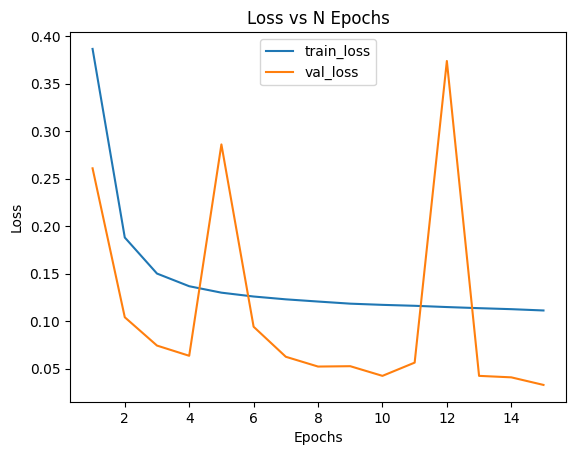

In [31]:
epochs = range(1, len(final_nn_results.history['loss'])+1)
loss = final_nn_results.history['loss']
val_loss = final_nn_results.history['val_loss']

plt.plot(epochs, loss, label='train_loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('Loss vs N Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Interpretation: The training loss is still able to level out smoothly, while the val loss fluctuates. The large peaks in the middle reparesnt two epochs that were not divided as well. The val loss is lower than the training loss at a (mostly) consistent rate, showing that there is no significant overfitting.


Predict the classes of the reserved test set, and create a classification report

In [27]:
# predict
y_final = final_nn.predict(X_test)

# condense the encoded results back into the categorical format
y_final_classes = condense_results(y_final)

# create a classification report
final_report = classification_report(y_test, y_final_classes)
print(final_report)

938/938 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

      GALAXY       0.97      0.90      0.94     17816
         QSO       0.78      0.96      0.86      5742
        STAR       0.97      0.96      0.97      6442

    accuracy                           0.93     30000
   macro avg       0.91      0.94      0.92     30000
weighted avg       0.94      0.93      0.93     30000



#### Confusion Matrix

generate a confusion matrix to investiagte false positives and false negatives

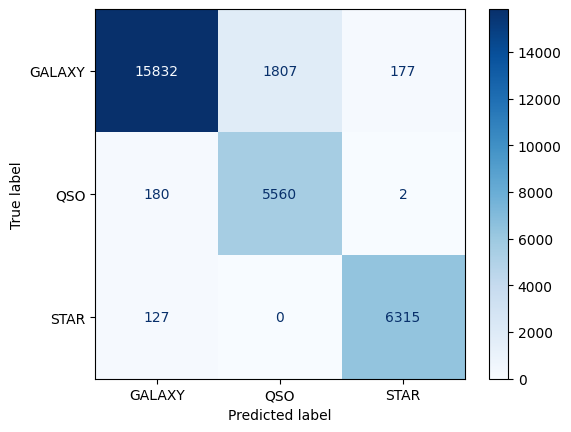

In [33]:
generate_confusion_matrix(y_test, y_final_classes)

We can see that the final model is better at distinguishing stars from quasars and galaxies than the single layer newural netowrk, and the expense of a few more galaxies being mis-identified as quasars.

### Feature Importance

Run a feature importance study using shap to determine which features had the largest effect on the classification results.

In [ ]:
# install and import the package
!pip install shap
import shap

In [ ]:
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP
explainer = shap.DeepExplainer(final_nn, X_test)
shap_values = explainer.shap_values(X_test)

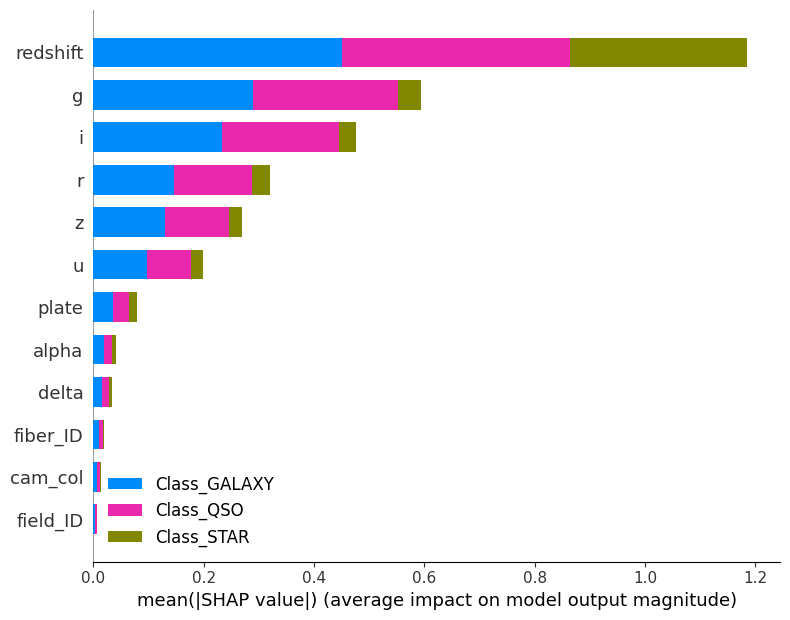

In [82]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=feature_columns.columns, class_names=y_train_encoded.columns)

The most important features appear to be measurements made on the objects themselves, rather than information about it's location and equipment used to observe it. The most important feature is redshift, followed by the five light filters. Galaxies and Quasars appear to rely more on light filters than stars, which reliec mostly on redshift.

# Conclusion

The final trained as a three layer neural network using normalized and resampled data and optimized using a grid search of parameters. Early Stopping was employed to mitigate overfitting.

Using this final model, we are able to accurately classify objects observed in the night sky with an accuracy of 97%.

# Fin